In [1]:
#=======================================
## DNN - Housing
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Set random seed.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

#----------------------------------------
# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#----------------------------------------
# Load the dataset.

dataset = np.loadtxt("Housing-Training-Data.txt")

print(dataset.shape)

index = [0, 5, 7, 12]

X = dataset[:, index]
Y = dataset[:, 13]


(506, 14)


In [3]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

Y_sample_mean = np.mean(Y, axis = 0)
print(np.round(Y_sample_mean, 4))

Y_sample_std = np.std(Y, axis = 0, ddof = 1)
print(np.round(Y_sample_std, 4))

standardize = lambda x:(x - np.mean(x, axis = 0))/np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)
Y_train = standardize(Y)

print(np.round(np.mean(X_train, axis = 0), 4))
print(np.round(np.std(X_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(Y_train, axis = 0), 4))
print(np.round(np.std(Y_train, axis = 0, ddof = 1), 4))



[ 3.6135  6.2846  3.795  12.6531]
[8.6015 0.7026 2.1057 7.1411]
22.5328
9.1971
[-0. -0. -0. -0.]
[1. 1. 1. 1.]
-0.0
1.0


In [4]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)



In [5]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [6]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 7, 7, 6, 1]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.2, 0.2, 0.2]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'relu', 'linear']


In [7]:
#----------------------------------------
# 10-fold cross validation

cv_mse = []
cv_mae = []

for k in range(fold_num):
    # Create the DNN_model.
    model = create_DNN_model(nodes, drop, kernel, act)
    # Compile the model.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], epochs = 1000, validation_split = 0.2, batch_size = 20, verbose = 1)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 1)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_mse.append(scores[0])
    cv_mae.append(scores[1])


Train on 364 samples, validate on 91 samples
Epoch 1/1000
364/364 [==============================] - 1s 3ms/step - loss: 0.9929 - mean_absolute_error: 0.7231 - val_loss: 1.1065 - val_mean_absolute_error: 0.7562
Epoch 2/1000
364/364 [==============================] - 0s 249us/step - loss: 0.9927 - mean_absolute_error: 0.7227 - val_loss: 1.1064 - val_mean_absolute_error: 0.7559
Epoch 3/1000
364/364 [==============================] - 0s 251us/step - loss: 0.9918 - mean_absolute_error: 0.7223 - val_loss: 1.1043 - val_mean_absolute_error: 0.7552
Epoch 4/1000
364/364 [==============================] - 0s 212us/step - loss: 0.9883 - mean_absolute_error: 0.7216 - val_loss: 1.0941 - val_mean_absolute_error: 0.7523
Epoch 5/1000
364/364 [==============================] - 0s 211us/step - loss: 0.9755 - mean_absolute_error: 0.7170 - val_loss: 1.0633 - val_mean_absolute_error: 0.7430
Epoch 6/1000
364/364 [==============================] - 0s 199us/step - loss: 0.9388 - mean_absolute_error: 0.7041 - 

364/364 [==============================] - 0s 188us/step - loss: 0.4042 - mean_absolute_error: 0.4427 - val_loss: 0.2332 - val_mean_absolute_error: 0.3662
Epoch 50/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3511 - mean_absolute_error: 0.3914 - val_loss: 0.2276 - val_mean_absolute_error: 0.3636
Epoch 51/1000
364/364 [==============================] - 0s 194us/step - loss: 0.4436 - mean_absolute_error: 0.4384 - val_loss: 0.2266 - val_mean_absolute_error: 0.3630
Epoch 52/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3637 - mean_absolute_error: 0.4155 - val_loss: 0.2191 - val_mean_absolute_error: 0.3592
Epoch 53/1000
364/364 [==============================] - 0s 218us/step - loss: 0.4395 - mean_absolute_error: 0.4546 - val_loss: 0.2142 - val_mean_absolute_error: 0.3563
Epoch 54/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3790 - mean_absolute_error: 0.4308 - val_loss: 0.2092 - val_mean_absolute_error: 0.3541


364/364 [==============================] - 0s 204us/step - loss: 0.3627 - mean_absolute_error: 0.4155 - val_loss: 0.1854 - val_mean_absolute_error: 0.3356
Epoch 98/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3218 - mean_absolute_error: 0.3881 - val_loss: 0.1825 - val_mean_absolute_error: 0.3337
Epoch 99/1000
364/364 [==============================] - 0s 179us/step - loss: 0.3785 - mean_absolute_error: 0.4190 - val_loss: 0.1812 - val_mean_absolute_error: 0.3327
Epoch 100/1000
364/364 [==============================] - 0s 235us/step - loss: 0.3601 - mean_absolute_error: 0.4141 - val_loss: 0.2003 - val_mean_absolute_error: 0.3404
Epoch 101/1000
364/364 [==============================] - 0s 215us/step - loss: 0.4033 - mean_absolute_error: 0.4396 - val_loss: 0.2006 - val_mean_absolute_error: 0.3408
Epoch 102/1000
364/364 [==============================] - 0s 226us/step - loss: 0.3652 - mean_absolute_error: 0.4023 - val_loss: 0.2037 - val_mean_absolute_error: 0.34

364/364 [==============================] - 0s 163us/step - loss: 0.3180 - mean_absolute_error: 0.3905 - val_loss: 0.1809 - val_mean_absolute_error: 0.3333
Epoch 146/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3715 - mean_absolute_error: 0.4272 - val_loss: 0.1765 - val_mean_absolute_error: 0.3308
Epoch 147/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3988 - mean_absolute_error: 0.4164 - val_loss: 0.1793 - val_mean_absolute_error: 0.3320
Epoch 148/1000
364/364 [==============================] - 0s 181us/step - loss: 0.3478 - mean_absolute_error: 0.4004 - val_loss: 0.1990 - val_mean_absolute_error: 0.3400
Epoch 149/1000
364/364 [==============================] - 0s 263us/step - loss: 0.3300 - mean_absolute_error: 0.3965 - val_loss: 0.1906 - val_mean_absolute_error: 0.3377
Epoch 150/1000
364/364 [==============================] - 0s 201us/step - loss: 0.3596 - mean_absolute_error: 0.4158 - val_loss: 0.1891 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 194us/step - loss: 0.3265 - mean_absolute_error: 0.3961 - val_loss: 0.1839 - val_mean_absolute_error: 0.3314
Epoch 194/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3524 - mean_absolute_error: 0.4023 - val_loss: 0.1794 - val_mean_absolute_error: 0.3283
Epoch 195/1000
364/364 [==============================] - 0s 288us/step - loss: 0.3582 - mean_absolute_error: 0.3965 - val_loss: 0.1902 - val_mean_absolute_error: 0.3316
Epoch 196/1000
364/364 [==============================] - 0s 380us/step - loss: 0.3245 - mean_absolute_error: 0.4054 - val_loss: 0.1811 - val_mean_absolute_error: 0.3272
Epoch 197/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3244 - mean_absolute_error: 0.3782 - val_loss: 0.1808 - val_mean_absolute_error: 0.3270
Epoch 198/1000
364/364 [==============================] - 0s 221us/step - loss: 0.3171 - mean_absolute_error: 0.3923 - val_loss: 0.1756 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 166us/step - loss: 0.3559 - mean_absolute_error: 0.4224 - val_loss: 0.1818 - val_mean_absolute_error: 0.3252
Epoch 242/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3461 - mean_absolute_error: 0.4000 - val_loss: 0.1858 - val_mean_absolute_error: 0.3271
Epoch 243/1000
364/364 [==============================] - 0s 193us/step - loss: 0.3568 - mean_absolute_error: 0.4158 - val_loss: 0.1828 - val_mean_absolute_error: 0.3271
Epoch 244/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3698 - mean_absolute_error: 0.4064 - val_loss: 0.1870 - val_mean_absolute_error: 0.3295
Epoch 245/1000
364/364 [==============================] - 0s 187us/step - loss: 0.3371 - mean_absolute_error: 0.4056 - val_loss: 0.2100 - val_mean_absolute_error: 0.3411
Epoch 246/1000
364/364 [==============================] - 0s 265us/step - loss: 0.3524 - mean_absolute_error: 0.4079 - val_loss: 0.1894 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 182us/step - loss: 0.3001 - mean_absolute_error: 0.3726 - val_loss: 0.1751 - val_mean_absolute_error: 0.3217
Epoch 290/1000
364/364 [==============================] - 0s 231us/step - loss: 0.3362 - mean_absolute_error: 0.3966 - val_loss: 0.1778 - val_mean_absolute_error: 0.3232
Epoch 291/1000
364/364 [==============================] - 0s 181us/step - loss: 0.3046 - mean_absolute_error: 0.3917 - val_loss: 0.1885 - val_mean_absolute_error: 0.3291
Epoch 292/1000
364/364 [==============================] - 0s 205us/step - loss: 0.2913 - mean_absolute_error: 0.3839 - val_loss: 0.1793 - val_mean_absolute_error: 0.3252
Epoch 293/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3429 - mean_absolute_error: 0.4080 - val_loss: 0.1748 - val_mean_absolute_error: 0.3239
Epoch 294/1000
364/364 [==============================] - 0s 175us/step - loss: 0.3515 - mean_absolute_error: 0.3955 - val_loss: 0.1800 - val_mean_absolute_error: 0.

Epoch 337/1000
364/364 [==============================] - 0s 170us/step - loss: 0.3564 - mean_absolute_error: 0.3883 - val_loss: 0.1940 - val_mean_absolute_error: 0.3317
Epoch 338/1000
364/364 [==============================] - 0s 186us/step - loss: 0.3500 - mean_absolute_error: 0.4024 - val_loss: 0.1871 - val_mean_absolute_error: 0.3291
Epoch 339/1000
364/364 [==============================] - 0s 171us/step - loss: 0.3176 - mean_absolute_error: 0.3909 - val_loss: 0.1824 - val_mean_absolute_error: 0.3266
Epoch 340/1000
364/364 [==============================] - 0s 147us/step - loss: 0.3440 - mean_absolute_error: 0.4125 - val_loss: 0.1759 - val_mean_absolute_error: 0.3243
Epoch 341/1000
364/364 [==============================] - 0s 185us/step - loss: 0.2985 - mean_absolute_error: 0.3884 - val_loss: 0.1853 - val_mean_absolute_error: 0.3273
Epoch 342/1000
364/364 [==============================] - 0s 162us/step - loss: 0.3706 - mean_absolute_error: 0.4181 - val_loss: 0.1793 - val_mean_abs

364/364 [==============================] - 0s 189us/step - loss: 0.3483 - mean_absolute_error: 0.4047 - val_loss: 0.1963 - val_mean_absolute_error: 0.3359
Epoch 386/1000
364/364 [==============================] - 0s 177us/step - loss: 0.3061 - mean_absolute_error: 0.3924 - val_loss: 0.1853 - val_mean_absolute_error: 0.3317
Epoch 387/1000
364/364 [==============================] - 0s 183us/step - loss: 0.3572 - mean_absolute_error: 0.4045 - val_loss: 0.1817 - val_mean_absolute_error: 0.3298
Epoch 388/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3078 - mean_absolute_error: 0.3961 - val_loss: 0.1823 - val_mean_absolute_error: 0.3292
Epoch 389/1000
364/364 [==============================] - 0s 219us/step - loss: 0.3239 - mean_absolute_error: 0.3960 - val_loss: 0.1784 - val_mean_absolute_error: 0.3278
Epoch 390/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3019 - mean_absolute_error: 0.3922 - val_loss: 0.1809 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 112us/step - loss: 0.3098 - mean_absolute_error: 0.3966 - val_loss: 0.2482 - val_mean_absolute_error: 0.3649
Epoch 434/1000
364/364 [==============================] - 0s 157us/step - loss: 0.3575 - mean_absolute_error: 0.4027 - val_loss: 0.2208 - val_mean_absolute_error: 0.3480
Epoch 435/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3030 - mean_absolute_error: 0.3879 - val_loss: 0.1961 - val_mean_absolute_error: 0.3360
Epoch 436/1000
364/364 [==============================] - 0s 235us/step - loss: 0.3078 - mean_absolute_error: 0.3989 - val_loss: 0.1888 - val_mean_absolute_error: 0.3327
Epoch 437/1000
364/364 [==============================] - 0s 242us/step - loss: 0.2868 - mean_absolute_error: 0.3770 - val_loss: 0.1854 - val_mean_absolute_error: 0.3318
Epoch 438/1000
364/364 [==============================] - 0s 241us/step - loss: 0.2992 - mean_absolute_error: 0.3829 - val_loss: 0.1855 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 187us/step - loss: 0.3534 - mean_absolute_error: 0.4029 - val_loss: 0.1954 - val_mean_absolute_error: 0.3313
Epoch 482/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3526 - mean_absolute_error: 0.4099 - val_loss: 0.1909 - val_mean_absolute_error: 0.3298
Epoch 483/1000
364/364 [==============================] - 0s 223us/step - loss: 0.2870 - mean_absolute_error: 0.3880 - val_loss: 0.1882 - val_mean_absolute_error: 0.3276
Epoch 484/1000
364/364 [==============================] - 0s 226us/step - loss: 0.3052 - mean_absolute_error: 0.3975 - val_loss: 0.1916 - val_mean_absolute_error: 0.3298
Epoch 485/1000
364/364 [==============================] - 0s 237us/step - loss: 0.3206 - mean_absolute_error: 0.4015 - val_loss: 0.1938 - val_mean_absolute_error: 0.3309
Epoch 486/1000
364/364 [==============================] - 0s 226us/step - loss: 0.3190 - mean_absolute_error: 0.3882 - val_loss: 0.1796 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 197us/step - loss: 0.3051 - mean_absolute_error: 0.3975 - val_loss: 0.1906 - val_mean_absolute_error: 0.3278
Epoch 530/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3357 - mean_absolute_error: 0.4064 - val_loss: 0.1868 - val_mean_absolute_error: 0.3261
Epoch 531/1000
364/364 [==============================] - 0s 325us/step - loss: 0.3675 - mean_absolute_error: 0.4110 - val_loss: 0.1788 - val_mean_absolute_error: 0.3209
Epoch 532/1000
364/364 [==============================] - 0s 248us/step - loss: 0.3074 - mean_absolute_error: 0.3739 - val_loss: 0.1835 - val_mean_absolute_error: 0.3219
Epoch 533/1000
364/364 [==============================] - 0s 230us/step - loss: 0.3007 - mean_absolute_error: 0.3831 - val_loss: 0.1957 - val_mean_absolute_error: 0.3290
Epoch 534/1000
364/364 [==============================] - 0s 254us/step - loss: 0.3364 - mean_absolute_error: 0.3996 - val_loss: 0.1990 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 357us/step - loss: 0.4707 - mean_absolute_error: 0.4158 - val_loss: 0.1939 - val_mean_absolute_error: 0.3302
Epoch 578/1000
364/364 [==============================] - 0s 162us/step - loss: 0.3026 - mean_absolute_error: 0.3736 - val_loss: 0.2167 - val_mean_absolute_error: 0.3428
Epoch 579/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3377 - mean_absolute_error: 0.4078 - val_loss: 0.1955 - val_mean_absolute_error: 0.3336
Epoch 580/1000
364/364 [==============================] - 0s 209us/step - loss: 0.2803 - mean_absolute_error: 0.3753 - val_loss: 0.1862 - val_mean_absolute_error: 0.3290
Epoch 581/1000
364/364 [==============================] - 0s 237us/step - loss: 0.3399 - mean_absolute_error: 0.4165 - val_loss: 0.1965 - val_mean_absolute_error: 0.3328
Epoch 582/1000
364/364 [==============================] - 0s 251us/step - loss: 0.2880 - mean_absolute_error: 0.3908 - val_loss: 0.1996 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 178us/step - loss: 0.3056 - mean_absolute_error: 0.3714 - val_loss: 0.1935 - val_mean_absolute_error: 0.3303
Epoch 626/1000
364/364 [==============================] - 0s 172us/step - loss: 0.3339 - mean_absolute_error: 0.4006 - val_loss: 0.1851 - val_mean_absolute_error: 0.3251
Epoch 627/1000
364/364 [==============================] - 0s 179us/step - loss: 0.3319 - mean_absolute_error: 0.3880 - val_loss: 0.1864 - val_mean_absolute_error: 0.3267
Epoch 628/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3315 - mean_absolute_error: 0.3835 - val_loss: 0.2062 - val_mean_absolute_error: 0.3395
Epoch 629/1000
364/364 [==============================] - 0s 215us/step - loss: 0.2678 - mean_absolute_error: 0.3614 - val_loss: 0.2133 - val_mean_absolute_error: 0.3429
Epoch 630/1000
364/364 [==============================] - 0s 227us/step - loss: 0.3395 - mean_absolute_error: 0.3901 - val_loss: 0.2107 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 199us/step - loss: 0.3209 - mean_absolute_error: 0.4100 - val_loss: 0.2008 - val_mean_absolute_error: 0.3356
Epoch 674/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3039 - mean_absolute_error: 0.3803 - val_loss: 0.1895 - val_mean_absolute_error: 0.3299
Epoch 675/1000
364/364 [==============================] - 0s 215us/step - loss: 0.2864 - mean_absolute_error: 0.3756 - val_loss: 0.1889 - val_mean_absolute_error: 0.3312
Epoch 676/1000
364/364 [==============================] - 0s 204us/step - loss: 0.2981 - mean_absolute_error: 0.3690 - val_loss: 0.1901 - val_mean_absolute_error: 0.3325
Epoch 677/1000
364/364 [==============================] - 0s 158us/step - loss: 0.3394 - mean_absolute_error: 0.3868 - val_loss: 0.1927 - val_mean_absolute_error: 0.3323
Epoch 678/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2668 - mean_absolute_error: 0.3725 - val_loss: 0.1911 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 101us/step - loss: 0.3080 - mean_absolute_error: 0.3918 - val_loss: 0.1997 - val_mean_absolute_error: 0.3334
Epoch 722/1000
364/364 [==============================] - 0s 120us/step - loss: 0.2920 - mean_absolute_error: 0.3807 - val_loss: 0.1927 - val_mean_absolute_error: 0.3305
Epoch 723/1000
364/364 [==============================] - 0s 159us/step - loss: 0.3277 - mean_absolute_error: 0.4037 - val_loss: 0.1967 - val_mean_absolute_error: 0.3321
Epoch 724/1000
364/364 [==============================] - 0s 136us/step - loss: 0.2846 - mean_absolute_error: 0.3711 - val_loss: 0.1929 - val_mean_absolute_error: 0.3296
Epoch 725/1000
364/364 [==============================] - 0s 141us/step - loss: 0.3077 - mean_absolute_error: 0.3943 - val_loss: 0.1849 - val_mean_absolute_error: 0.3267
Epoch 726/1000
364/364 [==============================] - 0s 178us/step - loss: 0.3856 - mean_absolute_error: 0.3945 - val_loss: 0.1898 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 121us/step - loss: 0.2886 - mean_absolute_error: 0.3771 - val_loss: 0.2035 - val_mean_absolute_error: 0.3361
Epoch 770/1000
364/364 [==============================] - 0s 114us/step - loss: 0.3231 - mean_absolute_error: 0.3952 - val_loss: 0.1982 - val_mean_absolute_error: 0.3323
Epoch 771/1000
364/364 [==============================] - 0s 136us/step - loss: 0.3124 - mean_absolute_error: 0.3850 - val_loss: 0.2058 - val_mean_absolute_error: 0.3376
Epoch 772/1000
364/364 [==============================] - 0s 100us/step - loss: 0.2689 - mean_absolute_error: 0.3745 - val_loss: 0.1943 - val_mean_absolute_error: 0.3307
Epoch 773/1000
364/364 [==============================] - 0s 119us/step - loss: 0.2869 - mean_absolute_error: 0.3792 - val_loss: 0.1926 - val_mean_absolute_error: 0.3304
Epoch 774/1000
364/364 [==============================] - 0s 133us/step - loss: 0.2885 - mean_absolute_error: 0.3764 - val_loss: 0.1943 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 129us/step - loss: 0.2976 - mean_absolute_error: 0.3848 - val_loss: 0.2023 - val_mean_absolute_error: 0.3385
Epoch 818/1000
364/364 [==============================] - 0s 116us/step - loss: 0.2823 - mean_absolute_error: 0.3826 - val_loss: 0.1904 - val_mean_absolute_error: 0.3328
Epoch 819/1000
364/364 [==============================] - 0s 146us/step - loss: 0.2909 - mean_absolute_error: 0.3773 - val_loss: 0.2031 - val_mean_absolute_error: 0.3394
Epoch 820/1000
364/364 [==============================] - 0s 120us/step - loss: 0.3369 - mean_absolute_error: 0.3935 - val_loss: 0.2031 - val_mean_absolute_error: 0.3395
Epoch 821/1000
364/364 [==============================] - 0s 111us/step - loss: 0.2642 - mean_absolute_error: 0.3731 - val_loss: 0.2027 - val_mean_absolute_error: 0.3395
Epoch 822/1000
364/364 [==============================] - 0s 128us/step - loss: 0.3344 - mean_absolute_error: 0.3973 - val_loss: 0.2053 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 136us/step - loss: 0.2808 - mean_absolute_error: 0.3791 - val_loss: 0.1817 - val_mean_absolute_error: 0.3259
Epoch 866/1000
364/364 [==============================] - 0s 140us/step - loss: 0.2869 - mean_absolute_error: 0.3935 - val_loss: 0.1915 - val_mean_absolute_error: 0.3312
Epoch 867/1000
364/364 [==============================] - 0s 124us/step - loss: 0.2997 - mean_absolute_error: 0.3795 - val_loss: 0.2023 - val_mean_absolute_error: 0.3385
Epoch 868/1000
364/364 [==============================] - 0s 109us/step - loss: 0.2722 - mean_absolute_error: 0.3735 - val_loss: 0.1988 - val_mean_absolute_error: 0.3364
Epoch 869/1000
364/364 [==============================] - 0s 138us/step - loss: 0.2762 - mean_absolute_error: 0.3712 - val_loss: 0.1919 - val_mean_absolute_error: 0.3337
Epoch 870/1000
364/364 [==============================] - 0s 159us/step - loss: 0.3662 - mean_absolute_error: 0.4101 - val_loss: 0.2017 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 120us/step - loss: 0.3368 - mean_absolute_error: 0.4029 - val_loss: 0.2064 - val_mean_absolute_error: 0.3407
Epoch 914/1000
364/364 [==============================] - 0s 129us/step - loss: 0.3225 - mean_absolute_error: 0.3936 - val_loss: 0.1974 - val_mean_absolute_error: 0.3384
Epoch 915/1000
364/364 [==============================] - 0s 178us/step - loss: 0.2935 - mean_absolute_error: 0.3861 - val_loss: 0.1852 - val_mean_absolute_error: 0.3313
Epoch 916/1000
364/364 [==============================] - 0s 126us/step - loss: 0.3022 - mean_absolute_error: 0.3873 - val_loss: 0.2227 - val_mean_absolute_error: 0.3537
Epoch 917/1000
364/364 [==============================] - 0s 122us/step - loss: 0.2837 - mean_absolute_error: 0.3737 - val_loss: 0.2142 - val_mean_absolute_error: 0.3490
Epoch 918/1000
364/364 [==============================] - 0s 137us/step - loss: 0.3445 - mean_absolute_error: 0.4041 - val_loss: 0.2056 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 152us/step - loss: 0.2714 - mean_absolute_error: 0.3705 - val_loss: 0.2088 - val_mean_absolute_error: 0.3434
Epoch 962/1000
364/364 [==============================] - 0s 168us/step - loss: 0.2643 - mean_absolute_error: 0.3804 - val_loss: 0.2081 - val_mean_absolute_error: 0.3438
Epoch 963/1000
364/364 [==============================] - 0s 160us/step - loss: 0.3225 - mean_absolute_error: 0.3928 - val_loss: 0.2014 - val_mean_absolute_error: 0.3399
Epoch 964/1000
364/364 [==============================] - 0s 161us/step - loss: 0.2629 - mean_absolute_error: 0.3640 - val_loss: 0.1927 - val_mean_absolute_error: 0.3336
Epoch 965/1000
364/364 [==============================] - 0s 176us/step - loss: 0.3235 - mean_absolute_error: 0.4034 - val_loss: 0.2091 - val_mean_absolute_error: 0.3432
Epoch 966/1000
364/364 [==============================] - 0s 135us/step - loss: 0.2993 - mean_absolute_error: 0.3845 - val_loss: 0.2021 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 143us/step - loss: 0.7745 - mean_absolute_error: 0.6402 - val_loss: 0.9013 - val_mean_absolute_error: 0.6770
Epoch 9/1000
364/364 [==============================] - 0s 189us/step - loss: 0.6950 - mean_absolute_error: 0.6111 - val_loss: 0.7664 - val_mean_absolute_error: 0.6311
Epoch 10/1000
364/364 [==============================] - 0s 185us/step - loss: 0.6249 - mean_absolute_error: 0.5854 - val_loss: 0.6217 - val_mean_absolute_error: 0.5811
Epoch 11/1000
364/364 [==============================] - 0s 227us/step - loss: 0.5416 - mean_absolute_error: 0.5427 - val_loss: 0.5008 - val_mean_absolute_error: 0.5289
Epoch 12/1000
364/364 [==============================] - 0s 236us/step - loss: 0.4624 - mean_absolute_error: 0.4984 - val_loss: 0.4144 - val_mean_absolute_error: 0.4776
Epoch 13/1000
364/364 [==============================] - 0s 235us/step - loss: 0.4523 - mean_absolute_error: 0.4906 - val_loss: 0.3926 - val_mean_absolute_error: 0.4541
E

364/364 [==============================] - 0s 237us/step - loss: 0.3716 - mean_absolute_error: 0.3948 - val_loss: 0.2402 - val_mean_absolute_error: 0.3623
Epoch 57/1000
364/364 [==============================] - 0s 170us/step - loss: 0.3819 - mean_absolute_error: 0.4243 - val_loss: 0.2459 - val_mean_absolute_error: 0.3645
Epoch 58/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3727 - mean_absolute_error: 0.3995 - val_loss: 0.2350 - val_mean_absolute_error: 0.3593
Epoch 59/1000
364/364 [==============================] - 0s 258us/step - loss: 0.3567 - mean_absolute_error: 0.4150 - val_loss: 0.2335 - val_mean_absolute_error: 0.3584
Epoch 60/1000
364/364 [==============================] - 0s 196us/step - loss: 0.4084 - mean_absolute_error: 0.4294 - val_loss: 0.2377 - val_mean_absolute_error: 0.3598
Epoch 61/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3406 - mean_absolute_error: 0.4025 - val_loss: 0.2481 - val_mean_absolute_error: 0.3647


364/364 [==============================] - 0s 169us/step - loss: 0.3168 - mean_absolute_error: 0.3791 - val_loss: 0.2187 - val_mean_absolute_error: 0.3453
Epoch 105/1000
364/364 [==============================] - 0s 157us/step - loss: 0.2566 - mean_absolute_error: 0.3554 - val_loss: 0.2272 - val_mean_absolute_error: 0.3497
Epoch 106/1000
364/364 [==============================] - 0s 248us/step - loss: 0.4040 - mean_absolute_error: 0.3958 - val_loss: 0.2376 - val_mean_absolute_error: 0.3549
Epoch 107/1000
364/364 [==============================] - 0s 164us/step - loss: 0.3354 - mean_absolute_error: 0.4035 - val_loss: 0.2185 - val_mean_absolute_error: 0.3448
Epoch 108/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3843 - mean_absolute_error: 0.4259 - val_loss: 0.2142 - val_mean_absolute_error: 0.3422
Epoch 109/1000
364/364 [==============================] - 0s 201us/step - loss: 0.3615 - mean_absolute_error: 0.4115 - val_loss: 0.2275 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 219us/step - loss: 0.3055 - mean_absolute_error: 0.3841 - val_loss: 0.2233 - val_mean_absolute_error: 0.3464
Epoch 153/1000
364/364 [==============================] - 0s 197us/step - loss: 0.3310 - mean_absolute_error: 0.3817 - val_loss: 0.2222 - val_mean_absolute_error: 0.3462
Epoch 154/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3174 - mean_absolute_error: 0.3833 - val_loss: 0.2150 - val_mean_absolute_error: 0.3419
Epoch 155/1000
364/364 [==============================] - 0s 206us/step - loss: 0.3103 - mean_absolute_error: 0.3842 - val_loss: 0.2033 - val_mean_absolute_error: 0.3360
Epoch 156/1000
364/364 [==============================] - 0s 169us/step - loss: 0.2965 - mean_absolute_error: 0.3765 - val_loss: 0.2122 - val_mean_absolute_error: 0.3406
Epoch 157/1000
364/364 [==============================] - 0s 151us/step - loss: 0.2983 - mean_absolute_error: 0.3795 - val_loss: 0.2239 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 192us/step - loss: 0.2961 - mean_absolute_error: 0.3732 - val_loss: 0.1975 - val_mean_absolute_error: 0.3338
Epoch 201/1000
364/364 [==============================] - 0s 211us/step - loss: 0.2679 - mean_absolute_error: 0.3581 - val_loss: 0.1873 - val_mean_absolute_error: 0.3273
Epoch 202/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3116 - mean_absolute_error: 0.3830 - val_loss: 0.1976 - val_mean_absolute_error: 0.3336
Epoch 203/1000
364/364 [==============================] - 0s 202us/step - loss: 0.2681 - mean_absolute_error: 0.3515 - val_loss: 0.1918 - val_mean_absolute_error: 0.3304
Epoch 204/1000
364/364 [==============================] - 0s 169us/step - loss: 0.3542 - mean_absolute_error: 0.3950 - val_loss: 0.1997 - val_mean_absolute_error: 0.3351
Epoch 205/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3013 - mean_absolute_error: 0.3768 - val_loss: 0.2285 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 235us/step - loss: 0.3045 - mean_absolute_error: 0.3640 - val_loss: 0.2085 - val_mean_absolute_error: 0.3386
Epoch 249/1000
364/364 [==============================] - 0s 229us/step - loss: 0.2919 - mean_absolute_error: 0.3572 - val_loss: 0.2013 - val_mean_absolute_error: 0.3346
Epoch 250/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3772 - mean_absolute_error: 0.3977 - val_loss: 0.2198 - val_mean_absolute_error: 0.3448
Epoch 251/1000
364/364 [==============================] - 0s 226us/step - loss: 0.2850 - mean_absolute_error: 0.3711 - val_loss: 0.2122 - val_mean_absolute_error: 0.3405
Epoch 252/1000
364/364 [==============================] - 0s 227us/step - loss: 0.2930 - mean_absolute_error: 0.3716 - val_loss: 0.1946 - val_mean_absolute_error: 0.3312
Epoch 253/1000
364/364 [==============================] - 0s 214us/step - loss: 0.2960 - mean_absolute_error: 0.3779 - val_loss: 0.1832 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 197us/step - loss: 0.2623 - mean_absolute_error: 0.3544 - val_loss: 0.2018 - val_mean_absolute_error: 0.3340
Epoch 297/1000
364/364 [==============================] - 0s 196us/step - loss: 0.3122 - mean_absolute_error: 0.3814 - val_loss: 0.1941 - val_mean_absolute_error: 0.3303
Epoch 298/1000
364/364 [==============================] - 0s 192us/step - loss: 0.2780 - mean_absolute_error: 0.3658 - val_loss: 0.1965 - val_mean_absolute_error: 0.3317
Epoch 299/1000
364/364 [==============================] - 0s 203us/step - loss: 0.2871 - mean_absolute_error: 0.3671 - val_loss: 0.1882 - val_mean_absolute_error: 0.3268
Epoch 300/1000
364/364 [==============================] - 0s 197us/step - loss: 0.2701 - mean_absolute_error: 0.3603 - val_loss: 0.1924 - val_mean_absolute_error: 0.3288
Epoch 301/1000
364/364 [==============================] - 0s 192us/step - loss: 0.2959 - mean_absolute_error: 0.3644 - val_loss: 0.1900 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 209us/step - loss: 0.3098 - mean_absolute_error: 0.3783 - val_loss: 0.2041 - val_mean_absolute_error: 0.3348
Epoch 345/1000
364/364 [==============================] - 0s 195us/step - loss: 0.2902 - mean_absolute_error: 0.3544 - val_loss: 0.2085 - val_mean_absolute_error: 0.3376
Epoch 346/1000
364/364 [==============================] - 0s 210us/step - loss: 0.2832 - mean_absolute_error: 0.3586 - val_loss: 0.1988 - val_mean_absolute_error: 0.3319
Epoch 347/1000
364/364 [==============================] - 0s 232us/step - loss: 0.3252 - mean_absolute_error: 0.3795 - val_loss: 0.1883 - val_mean_absolute_error: 0.3261
Epoch 348/1000
364/364 [==============================] - 0s 169us/step - loss: 0.3331 - mean_absolute_error: 0.3897 - val_loss: 0.1987 - val_mean_absolute_error: 0.3315
Epoch 349/1000
364/364 [==============================] - 0s 181us/step - loss: 0.3299 - mean_absolute_error: 0.3783 - val_loss: 0.1972 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 218us/step - loss: 0.3372 - mean_absolute_error: 0.3986 - val_loss: 0.1934 - val_mean_absolute_error: 0.3298
Epoch 393/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3074 - mean_absolute_error: 0.3720 - val_loss: 0.1916 - val_mean_absolute_error: 0.3288
Epoch 394/1000
364/364 [==============================] - 0s 233us/step - loss: 0.2920 - mean_absolute_error: 0.3676 - val_loss: 0.1901 - val_mean_absolute_error: 0.3274
Epoch 395/1000
364/364 [==============================] - 0s 244us/step - loss: 0.3020 - mean_absolute_error: 0.3705 - val_loss: 0.1987 - val_mean_absolute_error: 0.3316
Epoch 396/1000
364/364 [==============================] - 0s 188us/step - loss: 0.2913 - mean_absolute_error: 0.3817 - val_loss: 0.1982 - val_mean_absolute_error: 0.3316
Epoch 397/1000
364/364 [==============================] - 0s 231us/step - loss: 0.2861 - mean_absolute_error: 0.3666 - val_loss: 0.1929 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 177us/step - loss: 0.3771 - mean_absolute_error: 0.3948 - val_loss: 0.2350 - val_mean_absolute_error: 0.3518
Epoch 441/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3151 - mean_absolute_error: 0.3599 - val_loss: 0.2286 - val_mean_absolute_error: 0.3494
Epoch 442/1000
364/364 [==============================] - 0s 212us/step - loss: 0.2758 - mean_absolute_error: 0.3663 - val_loss: 0.2082 - val_mean_absolute_error: 0.3376
Epoch 443/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3251 - mean_absolute_error: 0.3871 - val_loss: 0.1934 - val_mean_absolute_error: 0.3295
Epoch 444/1000
364/364 [==============================] - 0s 200us/step - loss: 0.3151 - mean_absolute_error: 0.3852 - val_loss: 0.1803 - val_mean_absolute_error: 0.3225
Epoch 445/1000
364/364 [==============================] - 0s 187us/step - loss: 0.2747 - mean_absolute_error: 0.3520 - val_loss: 0.1822 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 216us/step - loss: 0.2881 - mean_absolute_error: 0.3611 - val_loss: 0.1974 - val_mean_absolute_error: 0.3308
Epoch 489/1000
364/364 [==============================] - 0s 206us/step - loss: 0.2844 - mean_absolute_error: 0.3512 - val_loss: 0.1970 - val_mean_absolute_error: 0.3306
Epoch 490/1000
364/364 [==============================] - 0s 196us/step - loss: 0.2847 - mean_absolute_error: 0.3699 - val_loss: 0.1875 - val_mean_absolute_error: 0.3253
Epoch 491/1000
364/364 [==============================] - 0s 211us/step - loss: 0.3530 - mean_absolute_error: 0.3930 - val_loss: 0.1808 - val_mean_absolute_error: 0.3210
Epoch 492/1000
364/364 [==============================] - 0s 186us/step - loss: 0.2717 - mean_absolute_error: 0.3498 - val_loss: 0.1799 - val_mean_absolute_error: 0.3203
Epoch 493/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2894 - mean_absolute_error: 0.3628 - val_loss: 0.1819 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 193us/step - loss: 0.2626 - mean_absolute_error: 0.3468 - val_loss: 0.1941 - val_mean_absolute_error: 0.3298
Epoch 537/1000
364/364 [==============================] - 0s 180us/step - loss: 0.2897 - mean_absolute_error: 0.3706 - val_loss: 0.1840 - val_mean_absolute_error: 0.3248
Epoch 538/1000
364/364 [==============================] - 0s 207us/step - loss: 0.2809 - mean_absolute_error: 0.3606 - val_loss: 0.1786 - val_mean_absolute_error: 0.3224
Epoch 539/1000
364/364 [==============================] - 0s 256us/step - loss: 0.3073 - mean_absolute_error: 0.3762 - val_loss: 0.1935 - val_mean_absolute_error: 0.3297
Epoch 540/1000
364/364 [==============================] - 0s 217us/step - loss: 0.2963 - mean_absolute_error: 0.3750 - val_loss: 0.1956 - val_mean_absolute_error: 0.3306
Epoch 541/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3257 - mean_absolute_error: 0.3809 - val_loss: 0.1919 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 198us/step - loss: 0.3486 - mean_absolute_error: 0.3901 - val_loss: 0.1980 - val_mean_absolute_error: 0.3300
Epoch 585/1000
364/364 [==============================] - 0s 219us/step - loss: 0.3261 - mean_absolute_error: 0.3594 - val_loss: 0.1982 - val_mean_absolute_error: 0.3301
Epoch 586/1000
364/364 [==============================] - 0s 200us/step - loss: 0.2828 - mean_absolute_error: 0.3477 - val_loss: 0.1883 - val_mean_absolute_error: 0.3255
Epoch 587/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3116 - mean_absolute_error: 0.3727 - val_loss: 0.1918 - val_mean_absolute_error: 0.3280
Epoch 588/1000
364/364 [==============================] - 0s 176us/step - loss: 0.2798 - mean_absolute_error: 0.3629 - val_loss: 0.1982 - val_mean_absolute_error: 0.3312
Epoch 589/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3300 - mean_absolute_error: 0.3745 - val_loss: 0.1906 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 226us/step - loss: 0.2806 - mean_absolute_error: 0.3592 - val_loss: 0.1892 - val_mean_absolute_error: 0.3268
Epoch 633/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3043 - mean_absolute_error: 0.3668 - val_loss: 0.1928 - val_mean_absolute_error: 0.3283
Epoch 634/1000
364/364 [==============================] - 0s 196us/step - loss: 0.2864 - mean_absolute_error: 0.3762 - val_loss: 0.1807 - val_mean_absolute_error: 0.3211
Epoch 635/1000
364/364 [==============================] - 0s 218us/step - loss: 0.3007 - mean_absolute_error: 0.3672 - val_loss: 0.1763 - val_mean_absolute_error: 0.3178
Epoch 636/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3353 - mean_absolute_error: 0.3599 - val_loss: 0.1662 - val_mean_absolute_error: 0.3105
Epoch 637/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3159 - mean_absolute_error: 0.3698 - val_loss: 0.1789 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 215us/step - loss: 0.2724 - mean_absolute_error: 0.3408 - val_loss: 0.2135 - val_mean_absolute_error: 0.3385
Epoch 681/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3599 - mean_absolute_error: 0.3863 - val_loss: 0.1964 - val_mean_absolute_error: 0.3297
Epoch 682/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3181 - mean_absolute_error: 0.3700 - val_loss: 0.1952 - val_mean_absolute_error: 0.3291
Epoch 683/1000
364/364 [==============================] - 0s 134us/step - loss: 0.3083 - mean_absolute_error: 0.3801 - val_loss: 0.1877 - val_mean_absolute_error: 0.3250
Epoch 684/1000
364/364 [==============================] - 0s 145us/step - loss: 0.2471 - mean_absolute_error: 0.3462 - val_loss: 0.1780 - val_mean_absolute_error: 0.3182
Epoch 685/1000
364/364 [==============================] - 0s 184us/step - loss: 0.2811 - mean_absolute_error: 0.3479 - val_loss: 0.1831 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 213us/step - loss: 0.2896 - mean_absolute_error: 0.3607 - val_loss: 0.1709 - val_mean_absolute_error: 0.3137
Epoch 729/1000
364/364 [==============================] - 0s 206us/step - loss: 0.3186 - mean_absolute_error: 0.3729 - val_loss: 0.1847 - val_mean_absolute_error: 0.3223
Epoch 730/1000
364/364 [==============================] - 0s 224us/step - loss: 0.3608 - mean_absolute_error: 0.3842 - val_loss: 0.1998 - val_mean_absolute_error: 0.3309
Epoch 731/1000
364/364 [==============================] - 0s 165us/step - loss: 0.3344 - mean_absolute_error: 0.3810 - val_loss: 0.1956 - val_mean_absolute_error: 0.3283
Epoch 732/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3346 - mean_absolute_error: 0.3796 - val_loss: 0.2071 - val_mean_absolute_error: 0.3354
Epoch 733/1000
364/364 [==============================] - 0s 189us/step - loss: 0.2930 - mean_absolute_error: 0.3531 - val_loss: 0.1975 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 208us/step - loss: 0.3603 - mean_absolute_error: 0.3808 - val_loss: 0.1943 - val_mean_absolute_error: 0.3279
Epoch 777/1000
364/364 [==============================] - 0s 202us/step - loss: 0.2655 - mean_absolute_error: 0.3515 - val_loss: 0.1770 - val_mean_absolute_error: 0.3182
Epoch 778/1000
364/364 [==============================] - 0s 197us/step - loss: 0.2562 - mean_absolute_error: 0.3498 - val_loss: 0.1759 - val_mean_absolute_error: 0.3168
Epoch 779/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3204 - mean_absolute_error: 0.3664 - val_loss: 0.1895 - val_mean_absolute_error: 0.3254
Epoch 780/1000
364/364 [==============================] - 0s 228us/step - loss: 0.2642 - mean_absolute_error: 0.3456 - val_loss: 0.1826 - val_mean_absolute_error: 0.3217
Epoch 781/1000
364/364 [==============================] - 0s 187us/step - loss: 0.3372 - mean_absolute_error: 0.3682 - val_loss: 0.1782 - val_mean_absolute_error: 0.

Epoch 824/1000
364/364 [==============================] - 0s 229us/step - loss: 0.2501 - mean_absolute_error: 0.3446 - val_loss: 0.1852 - val_mean_absolute_error: 0.3228
Epoch 825/1000
364/364 [==============================] - 0s 193us/step - loss: 0.2942 - mean_absolute_error: 0.3521 - val_loss: 0.2248 - val_mean_absolute_error: 0.3472
Epoch 826/1000
364/364 [==============================] - 0s 162us/step - loss: 0.3298 - mean_absolute_error: 0.3877 - val_loss: 0.2171 - val_mean_absolute_error: 0.3425
Epoch 827/1000
364/364 [==============================] - 0s 155us/step - loss: 0.3290 - mean_absolute_error: 0.3857 - val_loss: 0.1939 - val_mean_absolute_error: 0.3300
Epoch 828/1000
364/364 [==============================] - 0s 169us/step - loss: 0.3012 - mean_absolute_error: 0.3762 - val_loss: 0.1770 - val_mean_absolute_error: 0.3193
Epoch 829/1000
364/364 [==============================] - 0s 224us/step - loss: 0.3409 - mean_absolute_error: 0.3766 - val_loss: 0.1796 - val_mean_abs

364/364 [==============================] - 0s 170us/step - loss: 0.2889 - mean_absolute_error: 0.3706 - val_loss: 0.1805 - val_mean_absolute_error: 0.3206
Epoch 873/1000
364/364 [==============================] - 0s 217us/step - loss: 0.2900 - mean_absolute_error: 0.3751 - val_loss: 0.1729 - val_mean_absolute_error: 0.3149
Epoch 874/1000
364/364 [==============================] - 0s 178us/step - loss: 0.2585 - mean_absolute_error: 0.3372 - val_loss: 0.1844 - val_mean_absolute_error: 0.3220
Epoch 875/1000
364/364 [==============================] - 0s 193us/step - loss: 0.3061 - mean_absolute_error: 0.3699 - val_loss: 0.1866 - val_mean_absolute_error: 0.3234
Epoch 876/1000
364/364 [==============================] - 0s 206us/step - loss: 0.3317 - mean_absolute_error: 0.3797 - val_loss: 0.1895 - val_mean_absolute_error: 0.3252
Epoch 877/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3184 - mean_absolute_error: 0.3672 - val_loss: 0.1907 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 194us/step - loss: 0.2777 - mean_absolute_error: 0.3595 - val_loss: 0.1744 - val_mean_absolute_error: 0.3160
Epoch 921/1000
364/364 [==============================] - 0s 181us/step - loss: 0.2832 - mean_absolute_error: 0.3654 - val_loss: 0.1720 - val_mean_absolute_error: 0.3141
Epoch 922/1000
364/364 [==============================] - 0s 176us/step - loss: 0.2597 - mean_absolute_error: 0.3598 - val_loss: 0.1783 - val_mean_absolute_error: 0.3178
Epoch 923/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3145 - mean_absolute_error: 0.3815 - val_loss: 0.1979 - val_mean_absolute_error: 0.3297
Epoch 924/1000
364/364 [==============================] - 0s 221us/step - loss: 0.3158 - mean_absolute_error: 0.3510 - val_loss: 0.1982 - val_mean_absolute_error: 0.3299
Epoch 925/1000
364/364 [==============================] - 0s 249us/step - loss: 0.2879 - mean_absolute_error: 0.3672 - val_loss: 0.1930 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 176us/step - loss: 0.3276 - mean_absolute_error: 0.3863 - val_loss: 0.1854 - val_mean_absolute_error: 0.3224
Epoch 969/1000
364/364 [==============================] - 0s 183us/step - loss: 0.3049 - mean_absolute_error: 0.3626 - val_loss: 0.1838 - val_mean_absolute_error: 0.3220
Epoch 970/1000
364/364 [==============================] - 0s 194us/step - loss: 0.2635 - mean_absolute_error: 0.3509 - val_loss: 0.1875 - val_mean_absolute_error: 0.3238
Epoch 971/1000
364/364 [==============================] - 0s 218us/step - loss: 0.3173 - mean_absolute_error: 0.3802 - val_loss: 0.1900 - val_mean_absolute_error: 0.3261
Epoch 972/1000
364/364 [==============================] - 0s 211us/step - loss: 0.3110 - mean_absolute_error: 0.3705 - val_loss: 0.1922 - val_mean_absolute_error: 0.3269
Epoch 973/1000
364/364 [==============================] - 0s 205us/step - loss: 0.2980 - mean_absolute_error: 0.3614 - val_loss: 0.1818 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 207us/step - loss: 0.5452 - mean_absolute_error: 0.5442 - val_loss: 0.3808 - val_mean_absolute_error: 0.4598
Epoch 16/1000
364/364 [==============================] - 0s 246us/step - loss: 0.5576 - mean_absolute_error: 0.5553 - val_loss: 0.3847 - val_mean_absolute_error: 0.4563
Epoch 17/1000
364/364 [==============================] - 0s 218us/step - loss: 0.5047 - mean_absolute_error: 0.5203 - val_loss: 0.3772 - val_mean_absolute_error: 0.4508
Epoch 18/1000
364/364 [==============================] - 0s 221us/step - loss: 0.5075 - mean_absolute_error: 0.5202 - val_loss: 0.3476 - val_mean_absolute_error: 0.4372
Epoch 19/1000
364/364 [==============================] - 0s 225us/step - loss: 0.5585 - mean_absolute_error: 0.5467 - val_loss: 0.3431 - val_mean_absolute_error: 0.4317
Epoch 20/1000
364/364 [==============================] - 0s 212us/step - loss: 0.4883 - mean_absolute_error: 0.5106 - val_loss: 0.3557 - val_mean_absolute_error: 0.4345


364/364 [==============================] - 0s 214us/step - loss: 0.4172 - mean_absolute_error: 0.4712 - val_loss: 0.2529 - val_mean_absolute_error: 0.3832
Epoch 64/1000
364/364 [==============================] - 0s 214us/step - loss: 0.4449 - mean_absolute_error: 0.4756 - val_loss: 0.2562 - val_mean_absolute_error: 0.3860
Epoch 65/1000
364/364 [==============================] - 0s 219us/step - loss: 0.4223 - mean_absolute_error: 0.4691 - val_loss: 0.2503 - val_mean_absolute_error: 0.3829
Epoch 66/1000
364/364 [==============================] - 0s 170us/step - loss: 0.4045 - mean_absolute_error: 0.4526 - val_loss: 0.2362 - val_mean_absolute_error: 0.3780
Epoch 67/1000
364/364 [==============================] - 0s 191us/step - loss: 0.4307 - mean_absolute_error: 0.4652 - val_loss: 0.2394 - val_mean_absolute_error: 0.3794
Epoch 68/1000
364/364 [==============================] - 0s 250us/step - loss: 0.4221 - mean_absolute_error: 0.4632 - val_loss: 0.2543 - val_mean_absolute_error: 0.3859


364/364 [==============================] - 0s 213us/step - loss: 0.3738 - mean_absolute_error: 0.4374 - val_loss: 0.2311 - val_mean_absolute_error: 0.3626
Epoch 112/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3948 - mean_absolute_error: 0.4438 - val_loss: 0.2284 - val_mean_absolute_error: 0.3633
Epoch 113/1000
364/364 [==============================] - 0s 196us/step - loss: 0.4254 - mean_absolute_error: 0.4536 - val_loss: 0.2239 - val_mean_absolute_error: 0.3594
Epoch 114/1000
364/364 [==============================] - 0s 218us/step - loss: 0.4418 - mean_absolute_error: 0.4695 - val_loss: 0.2050 - val_mean_absolute_error: 0.3509
Epoch 115/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3388 - mean_absolute_error: 0.4141 - val_loss: 0.2013 - val_mean_absolute_error: 0.3487
Epoch 116/1000
364/364 [==============================] - 0s 167us/step - loss: 0.3820 - mean_absolute_error: 0.4151 - val_loss: 0.2084 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 209us/step - loss: 0.3493 - mean_absolute_error: 0.4355 - val_loss: 0.1979 - val_mean_absolute_error: 0.3372
Epoch 160/1000
364/364 [==============================] - 0s 197us/step - loss: 0.3926 - mean_absolute_error: 0.4381 - val_loss: 0.1875 - val_mean_absolute_error: 0.3303
Epoch 161/1000
364/364 [==============================] - 0s 217us/step - loss: 0.4006 - mean_absolute_error: 0.4425 - val_loss: 0.1888 - val_mean_absolute_error: 0.3319
Epoch 162/1000
364/364 [==============================] - 0s 240us/step - loss: 0.3754 - mean_absolute_error: 0.4270 - val_loss: 0.1953 - val_mean_absolute_error: 0.3356
Epoch 163/1000
364/364 [==============================] - 0s 216us/step - loss: 0.4373 - mean_absolute_error: 0.4543 - val_loss: 0.2084 - val_mean_absolute_error: 0.3433
Epoch 164/1000
364/364 [==============================] - 0s 238us/step - loss: 0.3485 - mean_absolute_error: 0.4293 - val_loss: 0.1944 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 149us/step - loss: 0.3139 - mean_absolute_error: 0.3977 - val_loss: 0.2054 - val_mean_absolute_error: 0.3444
Epoch 208/1000
364/364 [==============================] - 0s 200us/step - loss: 0.2832 - mean_absolute_error: 0.3811 - val_loss: 0.2013 - val_mean_absolute_error: 0.3415
Epoch 209/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3290 - mean_absolute_error: 0.4199 - val_loss: 0.2124 - val_mean_absolute_error: 0.3503
Epoch 210/1000
364/364 [==============================] - 0s 178us/step - loss: 0.2836 - mean_absolute_error: 0.3854 - val_loss: 0.1978 - val_mean_absolute_error: 0.3391
Epoch 211/1000
364/364 [==============================] - 0s 198us/step - loss: 0.4363 - mean_absolute_error: 0.4280 - val_loss: 0.2032 - val_mean_absolute_error: 0.3429
Epoch 212/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3135 - mean_absolute_error: 0.4051 - val_loss: 0.2034 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 213us/step - loss: 0.3284 - mean_absolute_error: 0.4155 - val_loss: 0.2064 - val_mean_absolute_error: 0.3465
Epoch 256/1000
364/364 [==============================] - 0s 170us/step - loss: 0.3318 - mean_absolute_error: 0.4160 - val_loss: 0.2030 - val_mean_absolute_error: 0.3446
Epoch 257/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3395 - mean_absolute_error: 0.4291 - val_loss: 0.1956 - val_mean_absolute_error: 0.3404
Epoch 258/1000
364/364 [==============================] - 0s 197us/step - loss: 0.3810 - mean_absolute_error: 0.4131 - val_loss: 0.2056 - val_mean_absolute_error: 0.3464
Epoch 259/1000
364/364 [==============================] - 0s 182us/step - loss: 0.3318 - mean_absolute_error: 0.4107 - val_loss: 0.2071 - val_mean_absolute_error: 0.3469
Epoch 260/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3384 - mean_absolute_error: 0.4041 - val_loss: 0.1960 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 187us/step - loss: 0.3571 - mean_absolute_error: 0.4267 - val_loss: 0.2098 - val_mean_absolute_error: 0.3482
Epoch 304/1000
364/364 [==============================] - 0s 195us/step - loss: 0.3055 - mean_absolute_error: 0.3979 - val_loss: 0.1973 - val_mean_absolute_error: 0.3384
Epoch 305/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3162 - mean_absolute_error: 0.3840 - val_loss: 0.2084 - val_mean_absolute_error: 0.3465
Epoch 306/1000
364/364 [==============================] - 0s 153us/step - loss: 0.3250 - mean_absolute_error: 0.3994 - val_loss: 0.2101 - val_mean_absolute_error: 0.3478
Epoch 307/1000
364/364 [==============================] - 0s 221us/step - loss: 0.3068 - mean_absolute_error: 0.4075 - val_loss: 0.1961 - val_mean_absolute_error: 0.3374
Epoch 308/1000
364/364 [==============================] - 0s 210us/step - loss: 0.2785 - mean_absolute_error: 0.3940 - val_loss: 0.1954 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 199us/step - loss: 0.2973 - mean_absolute_error: 0.3918 - val_loss: 0.1953 - val_mean_absolute_error: 0.3373
Epoch 352/1000
364/364 [==============================] - 0s 154us/step - loss: 0.3017 - mean_absolute_error: 0.3946 - val_loss: 0.1906 - val_mean_absolute_error: 0.3321
Epoch 353/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3877 - mean_absolute_error: 0.4207 - val_loss: 0.1996 - val_mean_absolute_error: 0.3414
Epoch 354/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3215 - mean_absolute_error: 0.4037 - val_loss: 0.2101 - val_mean_absolute_error: 0.3482
Epoch 355/1000
364/364 [==============================] - 0s 234us/step - loss: 0.2942 - mean_absolute_error: 0.3897 - val_loss: 0.2066 - val_mean_absolute_error: 0.3444
Epoch 356/1000
364/364 [==============================] - 0s 158us/step - loss: 0.3052 - mean_absolute_error: 0.4008 - val_loss: 0.1979 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 205us/step - loss: 0.3034 - mean_absolute_error: 0.4072 - val_loss: 0.2043 - val_mean_absolute_error: 0.3457
Epoch 400/1000
364/364 [==============================] - 0s 243us/step - loss: 0.3247 - mean_absolute_error: 0.4142 - val_loss: 0.2027 - val_mean_absolute_error: 0.3445
Epoch 401/1000
364/364 [==============================] - 0s 239us/step - loss: 0.3065 - mean_absolute_error: 0.4087 - val_loss: 0.2087 - val_mean_absolute_error: 0.3508
Epoch 402/1000
364/364 [==============================] - 0s 227us/step - loss: 0.3394 - mean_absolute_error: 0.4063 - val_loss: 0.1985 - val_mean_absolute_error: 0.3423
Epoch 403/1000
364/364 [==============================] - 0s 268us/step - loss: 0.2445 - mean_absolute_error: 0.3759 - val_loss: 0.1960 - val_mean_absolute_error: 0.3403
Epoch 404/1000
364/364 [==============================] - 0s 246us/step - loss: 0.2989 - mean_absolute_error: 0.3929 - val_loss: 0.2088 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 187us/step - loss: 0.2943 - mean_absolute_error: 0.3797 - val_loss: 0.1992 - val_mean_absolute_error: 0.3404
Epoch 448/1000
364/364 [==============================] - 0s 151us/step - loss: 0.3027 - mean_absolute_error: 0.3952 - val_loss: 0.1953 - val_mean_absolute_error: 0.3374
Epoch 449/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3747 - mean_absolute_error: 0.4155 - val_loss: 0.2030 - val_mean_absolute_error: 0.3421
Epoch 450/1000
364/364 [==============================] - 0s 159us/step - loss: 0.2770 - mean_absolute_error: 0.3808 - val_loss: 0.1963 - val_mean_absolute_error: 0.3384
Epoch 451/1000
364/364 [==============================] - 0s 154us/step - loss: 0.3073 - mean_absolute_error: 0.4049 - val_loss: 0.1926 - val_mean_absolute_error: 0.3348
Epoch 452/1000
364/364 [==============================] - 0s 167us/step - loss: 0.2706 - mean_absolute_error: 0.3866 - val_loss: 0.1970 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 117us/step - loss: 0.2674 - mean_absolute_error: 0.3802 - val_loss: 0.1862 - val_mean_absolute_error: 0.3239
Epoch 496/1000
364/364 [==============================] - 0s 156us/step - loss: 0.2808 - mean_absolute_error: 0.3757 - val_loss: 0.1823 - val_mean_absolute_error: 0.3208
Epoch 497/1000
364/364 [==============================] - 0s 170us/step - loss: 0.2831 - mean_absolute_error: 0.3843 - val_loss: 0.1820 - val_mean_absolute_error: 0.3215
Epoch 498/1000
364/364 [==============================] - 0s 140us/step - loss: 0.2925 - mean_absolute_error: 0.3906 - val_loss: 0.1854 - val_mean_absolute_error: 0.3245
Epoch 499/1000
364/364 [==============================] - 0s 141us/step - loss: 0.3021 - mean_absolute_error: 0.3884 - val_loss: 0.1945 - val_mean_absolute_error: 0.3350
Epoch 500/1000
364/364 [==============================] - 0s 162us/step - loss: 0.2686 - mean_absolute_error: 0.3746 - val_loss: 0.1949 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 126us/step - loss: 0.2967 - mean_absolute_error: 0.3901 - val_loss: 0.1885 - val_mean_absolute_error: 0.3248
Epoch 544/1000
364/364 [==============================] - 0s 119us/step - loss: 0.3434 - mean_absolute_error: 0.4086 - val_loss: 0.1921 - val_mean_absolute_error: 0.3275
Epoch 545/1000
364/364 [==============================] - 0s 203us/step - loss: 0.2870 - mean_absolute_error: 0.3984 - val_loss: 0.1906 - val_mean_absolute_error: 0.3262
Epoch 546/1000
364/364 [==============================] - 0s 201us/step - loss: 0.2790 - mean_absolute_error: 0.3743 - val_loss: 0.2001 - val_mean_absolute_error: 0.3346
Epoch 547/1000
364/364 [==============================] - 0s 137us/step - loss: 0.3337 - mean_absolute_error: 0.4175 - val_loss: 0.1937 - val_mean_absolute_error: 0.3290
Epoch 548/1000
364/364 [==============================] - 0s 190us/step - loss: 0.2528 - mean_absolute_error: 0.3762 - val_loss: 0.1892 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 118us/step - loss: 0.3422 - mean_absolute_error: 0.4101 - val_loss: 0.2000 - val_mean_absolute_error: 0.3317
Epoch 592/1000
364/364 [==============================] - 0s 170us/step - loss: 0.2902 - mean_absolute_error: 0.3827 - val_loss: 0.1871 - val_mean_absolute_error: 0.3240
Epoch 593/1000
364/364 [==============================] - 0s 182us/step - loss: 0.2949 - mean_absolute_error: 0.3955 - val_loss: 0.1782 - val_mean_absolute_error: 0.3198
Epoch 594/1000
364/364 [==============================] - 0s 155us/step - loss: 0.3240 - mean_absolute_error: 0.4023 - val_loss: 0.1956 - val_mean_absolute_error: 0.3292
Epoch 595/1000
364/364 [==============================] - 0s 185us/step - loss: 0.2934 - mean_absolute_error: 0.3859 - val_loss: 0.1960 - val_mean_absolute_error: 0.3294
Epoch 596/1000
364/364 [==============================] - 0s 153us/step - loss: 0.3232 - mean_absolute_error: 0.3966 - val_loss: 0.1906 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 138us/step - loss: 0.3154 - mean_absolute_error: 0.4051 - val_loss: 0.1840 - val_mean_absolute_error: 0.3180
Epoch 640/1000
364/364 [==============================] - 0s 146us/step - loss: 0.3065 - mean_absolute_error: 0.3946 - val_loss: 0.1875 - val_mean_absolute_error: 0.3210
Epoch 641/1000
364/364 [==============================] - 0s 154us/step - loss: 0.2527 - mean_absolute_error: 0.3755 - val_loss: 0.1906 - val_mean_absolute_error: 0.3230
Epoch 642/1000
364/364 [==============================] - 0s 205us/step - loss: 0.2839 - mean_absolute_error: 0.3803 - val_loss: 0.1883 - val_mean_absolute_error: 0.3219
Epoch 643/1000
364/364 [==============================] - 0s 143us/step - loss: 0.2348 - mean_absolute_error: 0.3695 - val_loss: 0.1964 - val_mean_absolute_error: 0.3276
Epoch 644/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3078 - mean_absolute_error: 0.4059 - val_loss: 0.1925 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 205us/step - loss: 0.2741 - mean_absolute_error: 0.3849 - val_loss: 0.1934 - val_mean_absolute_error: 0.3252
Epoch 688/1000
364/364 [==============================] - 0s 239us/step - loss: 0.3619 - mean_absolute_error: 0.4156 - val_loss: 0.1850 - val_mean_absolute_error: 0.3212
Epoch 689/1000
364/364 [==============================] - 0s 201us/step - loss: 0.2762 - mean_absolute_error: 0.3859 - val_loss: 0.1861 - val_mean_absolute_error: 0.3223
Epoch 690/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2965 - mean_absolute_error: 0.4037 - val_loss: 0.1962 - val_mean_absolute_error: 0.3273
Epoch 691/1000
364/364 [==============================] - 0s 212us/step - loss: 0.2928 - mean_absolute_error: 0.3946 - val_loss: 0.1894 - val_mean_absolute_error: 0.3231
Epoch 692/1000
364/364 [==============================] - 0s 241us/step - loss: 0.2493 - mean_absolute_error: 0.3759 - val_loss: 0.1841 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 181us/step - loss: 0.3109 - mean_absolute_error: 0.4000 - val_loss: 0.1902 - val_mean_absolute_error: 0.3238
Epoch 736/1000
364/364 [==============================] - 0s 189us/step - loss: 0.2580 - mean_absolute_error: 0.3758 - val_loss: 0.1849 - val_mean_absolute_error: 0.3187
Epoch 737/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3101 - mean_absolute_error: 0.4060 - val_loss: 0.1830 - val_mean_absolute_error: 0.3166
Epoch 738/1000
364/364 [==============================] - 0s 177us/step - loss: 0.2753 - mean_absolute_error: 0.3834 - val_loss: 0.1826 - val_mean_absolute_error: 0.3162
Epoch 739/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2576 - mean_absolute_error: 0.3529 - val_loss: 0.1794 - val_mean_absolute_error: 0.3128
Epoch 740/1000
364/364 [==============================] - 0s 206us/step - loss: 0.2636 - mean_absolute_error: 0.3818 - val_loss: 0.1850 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 217us/step - loss: 0.2704 - mean_absolute_error: 0.3831 - val_loss: 0.1783 - val_mean_absolute_error: 0.3150
Epoch 784/1000
364/364 [==============================] - 0s 169us/step - loss: 0.3111 - mean_absolute_error: 0.3982 - val_loss: 0.1899 - val_mean_absolute_error: 0.3278
Epoch 785/1000
364/364 [==============================] - 0s 260us/step - loss: 0.6000 - mean_absolute_error: 0.4062 - val_loss: 0.1972 - val_mean_absolute_error: 0.3313
Epoch 786/1000
364/364 [==============================] - 0s 205us/step - loss: 0.2662 - mean_absolute_error: 0.3824 - val_loss: 0.2063 - val_mean_absolute_error: 0.3396
Epoch 787/1000
364/364 [==============================] - 0s 182us/step - loss: 0.2763 - mean_absolute_error: 0.3913 - val_loss: 0.1947 - val_mean_absolute_error: 0.3317
Epoch 788/1000
364/364 [==============================] - 0s 218us/step - loss: 0.2820 - mean_absolute_error: 0.3755 - val_loss: 0.1942 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 178us/step - loss: 0.2657 - mean_absolute_error: 0.3801 - val_loss: 0.1956 - val_mean_absolute_error: 0.3284
Epoch 832/1000
364/364 [==============================] - 0s 172us/step - loss: 0.2520 - mean_absolute_error: 0.3630 - val_loss: 0.1893 - val_mean_absolute_error: 0.3230
Epoch 833/1000
364/364 [==============================] - 0s 200us/step - loss: 0.2911 - mean_absolute_error: 0.3875 - val_loss: 0.1881 - val_mean_absolute_error: 0.3220
Epoch 834/1000
364/364 [==============================] - 0s 203us/step - loss: 0.2639 - mean_absolute_error: 0.3721 - val_loss: 0.1915 - val_mean_absolute_error: 0.3257
Epoch 835/1000
364/364 [==============================] - 0s 214us/step - loss: 0.2545 - mean_absolute_error: 0.3692 - val_loss: 0.2148 - val_mean_absolute_error: 0.3438
Epoch 836/1000
364/364 [==============================] - 0s 181us/step - loss: 0.3525 - mean_absolute_error: 0.3796 - val_loss: 0.2084 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 223us/step - loss: 0.2611 - mean_absolute_error: 0.3798 - val_loss: 0.1898 - val_mean_absolute_error: 0.3241
Epoch 880/1000
364/364 [==============================] - 0s 188us/step - loss: 0.2740 - mean_absolute_error: 0.3868 - val_loss: 0.1873 - val_mean_absolute_error: 0.3235
Epoch 881/1000
364/364 [==============================] - 0s 243us/step - loss: 0.3147 - mean_absolute_error: 0.3936 - val_loss: 0.2063 - val_mean_absolute_error: 0.3403
Epoch 882/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2622 - mean_absolute_error: 0.3666 - val_loss: 0.2108 - val_mean_absolute_error: 0.3429
Epoch 883/1000
364/364 [==============================] - 0s 207us/step - loss: 0.2842 - mean_absolute_error: 0.3764 - val_loss: 0.1969 - val_mean_absolute_error: 0.3293
Epoch 884/1000
364/364 [==============================] - 0s 197us/step - loss: 0.2581 - mean_absolute_error: 0.3731 - val_loss: 0.1938 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 150us/step - loss: 0.2917 - mean_absolute_error: 0.3955 - val_loss: 0.1917 - val_mean_absolute_error: 0.3288
Epoch 928/1000
364/364 [==============================] - 0s 205us/step - loss: 0.2515 - mean_absolute_error: 0.3684 - val_loss: 0.2051 - val_mean_absolute_error: 0.3353
Epoch 929/1000
364/364 [==============================] - 0s 174us/step - loss: 0.3922 - mean_absolute_error: 0.4053 - val_loss: 0.1990 - val_mean_absolute_error: 0.3309
Epoch 930/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3236 - mean_absolute_error: 0.4049 - val_loss: 0.1962 - val_mean_absolute_error: 0.3292
Epoch 931/1000
364/364 [==============================] - 0s 201us/step - loss: 0.3099 - mean_absolute_error: 0.3880 - val_loss: 0.1881 - val_mean_absolute_error: 0.3229
Epoch 932/1000
364/364 [==============================] - 0s 179us/step - loss: 0.2320 - mean_absolute_error: 0.3656 - val_loss: 0.1928 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 187us/step - loss: 0.2752 - mean_absolute_error: 0.3785 - val_loss: 0.1899 - val_mean_absolute_error: 0.3288
Epoch 976/1000
364/364 [==============================] - 0s 196us/step - loss: 0.2585 - mean_absolute_error: 0.3637 - val_loss: 0.1927 - val_mean_absolute_error: 0.3304
Epoch 977/1000
364/364 [==============================] - 0s 176us/step - loss: 0.2647 - mean_absolute_error: 0.3860 - val_loss: 0.1931 - val_mean_absolute_error: 0.3315
Epoch 978/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3192 - mean_absolute_error: 0.4003 - val_loss: 0.1896 - val_mean_absolute_error: 0.3274
Epoch 979/1000
364/364 [==============================] - 0s 228us/step - loss: 0.2790 - mean_absolute_error: 0.3686 - val_loss: 0.1988 - val_mean_absolute_error: 0.3374
Epoch 980/1000
364/364 [==============================] - 0s 197us/step - loss: 0.2607 - mean_absolute_error: 0.3732 - val_loss: 0.1925 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 198us/step - loss: 0.4793 - mean_absolute_error: 0.4541 - val_loss: 0.2907 - val_mean_absolute_error: 0.3903
Epoch 23/1000
364/364 [==============================] - 0s 195us/step - loss: 0.4452 - mean_absolute_error: 0.4323 - val_loss: 0.3008 - val_mean_absolute_error: 0.3932
Epoch 24/1000
364/364 [==============================] - 0s 250us/step - loss: 0.4424 - mean_absolute_error: 0.4565 - val_loss: 0.3035 - val_mean_absolute_error: 0.3938
Epoch 25/1000
364/364 [==============================] - 0s 170us/step - loss: 0.5120 - mean_absolute_error: 0.4845 - val_loss: 0.2999 - val_mean_absolute_error: 0.3943
Epoch 26/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3908 - mean_absolute_error: 0.4239 - val_loss: 0.2890 - val_mean_absolute_error: 0.3915
Epoch 27/1000
364/364 [==============================] - 0s 192us/step - loss: 0.4323 - mean_absolute_error: 0.4433 - val_loss: 0.2774 - val_mean_absolute_error: 0.3848


364/364 [==============================] - 0s 174us/step - loss: 0.4145 - mean_absolute_error: 0.4393 - val_loss: 0.2457 - val_mean_absolute_error: 0.3655
Epoch 71/1000
364/364 [==============================] - 0s 236us/step - loss: 0.4137 - mean_absolute_error: 0.4359 - val_loss: 0.2426 - val_mean_absolute_error: 0.3648
Epoch 72/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3385 - mean_absolute_error: 0.4071 - val_loss: 0.2376 - val_mean_absolute_error: 0.3623
Epoch 73/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3894 - mean_absolute_error: 0.4030 - val_loss: 0.2479 - val_mean_absolute_error: 0.3666
Epoch 74/1000
364/364 [==============================] - 0s 195us/step - loss: 0.3966 - mean_absolute_error: 0.4425 - val_loss: 0.2492 - val_mean_absolute_error: 0.3672
Epoch 75/1000
364/364 [==============================] - 0s 194us/step - loss: 0.4606 - mean_absolute_error: 0.4433 - val_loss: 0.2547 - val_mean_absolute_error: 0.3687


364/364 [==============================] - 0s 179us/step - loss: 0.3492 - mean_absolute_error: 0.3949 - val_loss: 0.2276 - val_mean_absolute_error: 0.3470
Epoch 119/1000
364/364 [==============================] - 0s 239us/step - loss: 0.3775 - mean_absolute_error: 0.4123 - val_loss: 0.2271 - val_mean_absolute_error: 0.3470
Epoch 120/1000
364/364 [==============================] - 0s 218us/step - loss: 0.3792 - mean_absolute_error: 0.4192 - val_loss: 0.2258 - val_mean_absolute_error: 0.3452
Epoch 121/1000
364/364 [==============================] - 0s 205us/step - loss: 0.3793 - mean_absolute_error: 0.3988 - val_loss: 0.2256 - val_mean_absolute_error: 0.3446
Epoch 122/1000
364/364 [==============================] - 0s 211us/step - loss: 0.3165 - mean_absolute_error: 0.3993 - val_loss: 0.2198 - val_mean_absolute_error: 0.3400
Epoch 123/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3797 - mean_absolute_error: 0.4211 - val_loss: 0.2157 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 226us/step - loss: 0.3974 - mean_absolute_error: 0.4334 - val_loss: 0.2150 - val_mean_absolute_error: 0.3382
Epoch 167/1000
364/364 [==============================] - 0s 158us/step - loss: 0.3005 - mean_absolute_error: 0.3962 - val_loss: 0.2131 - val_mean_absolute_error: 0.3346
Epoch 168/1000
364/364 [==============================] - 0s 178us/step - loss: 0.3739 - mean_absolute_error: 0.4139 - val_loss: 0.2104 - val_mean_absolute_error: 0.3354
Epoch 169/1000
364/364 [==============================] - 0s 196us/step - loss: 0.3982 - mean_absolute_error: 0.4259 - val_loss: 0.2174 - val_mean_absolute_error: 0.3407
Epoch 170/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3366 - mean_absolute_error: 0.4142 - val_loss: 0.2215 - val_mean_absolute_error: 0.3404
Epoch 171/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3768 - mean_absolute_error: 0.4137 - val_loss: 0.2172 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 235us/step - loss: 0.3779 - mean_absolute_error: 0.4165 - val_loss: 0.2288 - val_mean_absolute_error: 0.3420
Epoch 215/1000
364/364 [==============================] - 0s 200us/step - loss: 0.3531 - mean_absolute_error: 0.4009 - val_loss: 0.2220 - val_mean_absolute_error: 0.3421
Epoch 216/1000
364/364 [==============================] - 0s 201us/step - loss: 0.3187 - mean_absolute_error: 0.3942 - val_loss: 0.2161 - val_mean_absolute_error: 0.3402
Epoch 217/1000
364/364 [==============================] - 0s 171us/step - loss: 0.3578 - mean_absolute_error: 0.4072 - val_loss: 0.2243 - val_mean_absolute_error: 0.3396
Epoch 218/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3096 - mean_absolute_error: 0.3908 - val_loss: 0.2271 - val_mean_absolute_error: 0.3397
Epoch 219/1000
364/364 [==============================] - 0s 205us/step - loss: 0.3877 - mean_absolute_error: 0.4235 - val_loss: 0.2280 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 197us/step - loss: 0.3350 - mean_absolute_error: 0.3972 - val_loss: 0.2123 - val_mean_absolute_error: 0.3365
Epoch 263/1000
364/364 [==============================] - 0s 172us/step - loss: 0.3409 - mean_absolute_error: 0.4043 - val_loss: 0.2161 - val_mean_absolute_error: 0.3373
Epoch 264/1000
364/364 [==============================] - 0s 219us/step - loss: 0.3816 - mean_absolute_error: 0.4224 - val_loss: 0.2156 - val_mean_absolute_error: 0.3373
Epoch 265/1000
364/364 [==============================] - 0s 185us/step - loss: 0.3464 - mean_absolute_error: 0.3773 - val_loss: 0.2160 - val_mean_absolute_error: 0.3378
Epoch 266/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3435 - mean_absolute_error: 0.4170 - val_loss: 0.2177 - val_mean_absolute_error: 0.3375
Epoch 267/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3593 - mean_absolute_error: 0.4063 - val_loss: 0.2173 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 218us/step - loss: 0.3172 - mean_absolute_error: 0.3850 - val_loss: 0.2179 - val_mean_absolute_error: 0.3441
Epoch 311/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3751 - mean_absolute_error: 0.4103 - val_loss: 0.2139 - val_mean_absolute_error: 0.3408
Epoch 312/1000
364/364 [==============================] - 0s 204us/step - loss: 0.2915 - mean_absolute_error: 0.3761 - val_loss: 0.2103 - val_mean_absolute_error: 0.3371
Epoch 313/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3465 - mean_absolute_error: 0.4146 - val_loss: 0.2084 - val_mean_absolute_error: 0.3368
Epoch 314/1000
364/364 [==============================] - 0s 206us/step - loss: 0.3166 - mean_absolute_error: 0.3968 - val_loss: 0.2115 - val_mean_absolute_error: 0.3370
Epoch 315/1000
364/364 [==============================] - 0s 181us/step - loss: 0.3248 - mean_absolute_error: 0.3906 - val_loss: 0.2112 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 194us/step - loss: 0.3197 - mean_absolute_error: 0.3888 - val_loss: 0.2267 - val_mean_absolute_error: 0.3527
Epoch 359/1000
364/364 [==============================] - 0s 231us/step - loss: 0.3932 - mean_absolute_error: 0.4177 - val_loss: 0.2307 - val_mean_absolute_error: 0.3551
Epoch 360/1000
364/364 [==============================] - 0s 235us/step - loss: 0.3446 - mean_absolute_error: 0.4105 - val_loss: 0.2320 - val_mean_absolute_error: 0.3522
Epoch 361/1000
364/364 [==============================] - 0s 237us/step - loss: 0.3403 - mean_absolute_error: 0.3972 - val_loss: 0.2279 - val_mean_absolute_error: 0.3499
Epoch 362/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3399 - mean_absolute_error: 0.4003 - val_loss: 0.2293 - val_mean_absolute_error: 0.3491
Epoch 363/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3305 - mean_absolute_error: 0.4004 - val_loss: 0.2261 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 146us/step - loss: 0.3159 - mean_absolute_error: 0.4006 - val_loss: 0.2100 - val_mean_absolute_error: 0.3400
Epoch 407/1000
364/364 [==============================] - 0s 193us/step - loss: 0.2783 - mean_absolute_error: 0.3836 - val_loss: 0.2084 - val_mean_absolute_error: 0.3408
Epoch 408/1000
364/364 [==============================] - 0s 171us/step - loss: 0.3073 - mean_absolute_error: 0.3946 - val_loss: 0.2054 - val_mean_absolute_error: 0.3400
Epoch 409/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3168 - mean_absolute_error: 0.3961 - val_loss: 0.2070 - val_mean_absolute_error: 0.3414
Epoch 410/1000
364/364 [==============================] - 0s 201us/step - loss: 0.3141 - mean_absolute_error: 0.3812 - val_loss: 0.2092 - val_mean_absolute_error: 0.3396
Epoch 411/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3161 - mean_absolute_error: 0.3865 - val_loss: 0.2162 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 155us/step - loss: 0.3395 - mean_absolute_error: 0.4074 - val_loss: 0.2265 - val_mean_absolute_error: 0.3533
Epoch 455/1000
364/364 [==============================] - 0s 166us/step - loss: 0.3251 - mean_absolute_error: 0.4085 - val_loss: 0.2260 - val_mean_absolute_error: 0.3519
Epoch 456/1000
364/364 [==============================] - 0s 223us/step - loss: 0.3250 - mean_absolute_error: 0.4003 - val_loss: 0.2293 - val_mean_absolute_error: 0.3541
Epoch 457/1000
364/364 [==============================] - 0s 156us/step - loss: 0.3111 - mean_absolute_error: 0.3885 - val_loss: 0.2254 - val_mean_absolute_error: 0.3534
Epoch 458/1000
364/364 [==============================] - 0s 225us/step - loss: 0.3354 - mean_absolute_error: 0.3973 - val_loss: 0.2240 - val_mean_absolute_error: 0.3506
Epoch 459/1000
364/364 [==============================] - 0s 183us/step - loss: 0.3292 - mean_absolute_error: 0.3947 - val_loss: 0.2235 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 232us/step - loss: 0.3780 - mean_absolute_error: 0.4069 - val_loss: 0.2100 - val_mean_absolute_error: 0.3430
Epoch 503/1000
364/364 [==============================] - 0s 255us/step - loss: 0.3142 - mean_absolute_error: 0.3928 - val_loss: 0.2156 - val_mean_absolute_error: 0.3439
Epoch 504/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3348 - mean_absolute_error: 0.3945 - val_loss: 0.2165 - val_mean_absolute_error: 0.3447
Epoch 505/1000
364/364 [==============================] - 0s 259us/step - loss: 0.2698 - mean_absolute_error: 0.3758 - val_loss: 0.2131 - val_mean_absolute_error: 0.3464
Epoch 506/1000
364/364 [==============================] - 0s 241us/step - loss: 0.3856 - mean_absolute_error: 0.4255 - val_loss: 0.2097 - val_mean_absolute_error: 0.3462
Epoch 507/1000
364/364 [==============================] - 0s 200us/step - loss: 0.3668 - mean_absolute_error: 0.4133 - val_loss: 0.2119 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 170us/step - loss: 0.3467 - mean_absolute_error: 0.4154 - val_loss: 0.2286 - val_mean_absolute_error: 0.3525
Epoch 551/1000
364/364 [==============================] - ETA: 0s - loss: 0.5253 - mean_absolute_error: 0.578 - 0s 173us/step - loss: 0.3548 - mean_absolute_error: 0.4255 - val_loss: 0.2280 - val_mean_absolute_error: 0.3508
Epoch 552/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3389 - mean_absolute_error: 0.4044 - val_loss: 0.2233 - val_mean_absolute_error: 0.3492
Epoch 553/1000
364/364 [==============================] - 0s 200us/step - loss: 0.3415 - mean_absolute_error: 0.4042 - val_loss: 0.2272 - val_mean_absolute_error: 0.3516
Epoch 554/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3300 - mean_absolute_error: 0.4103 - val_loss: 0.2252 - val_mean_absolute_error: 0.3527
Epoch 555/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3363 - mean_absolute_error: 0

Epoch 598/1000
364/364 [==============================] - 0s 187us/step - loss: 0.3116 - mean_absolute_error: 0.4028 - val_loss: 0.2155 - val_mean_absolute_error: 0.3491
Epoch 599/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3171 - mean_absolute_error: 0.3948 - val_loss: 0.2189 - val_mean_absolute_error: 0.3477
Epoch 600/1000
364/364 [==============================] - 0s 188us/step - loss: 0.2502 - mean_absolute_error: 0.3486 - val_loss: 0.2177 - val_mean_absolute_error: 0.3475
Epoch 601/1000
364/364 [==============================] - 0s 205us/step - loss: 0.2869 - mean_absolute_error: 0.3797 - val_loss: 0.2146 - val_mean_absolute_error: 0.3458
Epoch 602/1000
364/364 [==============================] - 0s 193us/step - loss: 0.3732 - mean_absolute_error: 0.4157 - val_loss: 0.2155 - val_mean_absolute_error: 0.3486
Epoch 603/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3335 - mean_absolute_error: 0.3934 - val_loss: 0.2167 - val_mean_abs

Epoch 646/1000
364/364 [==============================] - 0s 225us/step - loss: 0.3316 - mean_absolute_error: 0.4086 - val_loss: 0.2220 - val_mean_absolute_error: 0.3469
Epoch 647/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3067 - mean_absolute_error: 0.3827 - val_loss: 0.2214 - val_mean_absolute_error: 0.3462
Epoch 648/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3246 - mean_absolute_error: 0.3880 - val_loss: 0.2209 - val_mean_absolute_error: 0.3472
Epoch 649/1000
364/364 [==============================] - 0s 181us/step - loss: 0.2938 - mean_absolute_error: 0.3804 - val_loss: 0.2176 - val_mean_absolute_error: 0.3449
Epoch 650/1000
364/364 [==============================] - 0s 192us/step - loss: 0.3265 - mean_absolute_error: 0.4070 - val_loss: 0.2163 - val_mean_absolute_error: 0.3447
Epoch 651/1000
364/364 [==============================] - 0s 232us/step - loss: 0.2877 - mean_absolute_error: 0.3751 - val_loss: 0.2123 - val_mean_abs

364/364 [==============================] - 0s 194us/step - loss: 0.2957 - mean_absolute_error: 0.3778 - val_loss: 0.2063 - val_mean_absolute_error: 0.3397
Epoch 695/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3252 - mean_absolute_error: 0.4009 - val_loss: 0.2078 - val_mean_absolute_error: 0.3397
Epoch 696/1000
364/364 [==============================] - 0s 236us/step - loss: 0.3142 - mean_absolute_error: 0.3940 - val_loss: 0.2165 - val_mean_absolute_error: 0.3432
Epoch 697/1000
364/364 [==============================] - 0s 174us/step - loss: 0.3515 - mean_absolute_error: 0.4061 - val_loss: 0.2205 - val_mean_absolute_error: 0.3462
Epoch 698/1000
364/364 [==============================] - 0s 218us/step - loss: 0.3094 - mean_absolute_error: 0.3913 - val_loss: 0.2214 - val_mean_absolute_error: 0.3468
Epoch 699/1000
364/364 [==============================] - 0s 192us/step - loss: 0.3177 - mean_absolute_error: 0.4045 - val_loss: 0.2208 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 186us/step - loss: 0.3088 - mean_absolute_error: 0.3880 - val_loss: 0.2159 - val_mean_absolute_error: 0.3474
Epoch 743/1000
364/364 [==============================] - 0s 190us/step - loss: 0.3849 - mean_absolute_error: 0.4103 - val_loss: 0.2197 - val_mean_absolute_error: 0.3465
Epoch 744/1000
364/364 [==============================] - 0s 235us/step - loss: 0.3696 - mean_absolute_error: 0.4154 - val_loss: 0.2290 - val_mean_absolute_error: 0.3528
Epoch 745/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3358 - mean_absolute_error: 0.3975 - val_loss: 0.2253 - val_mean_absolute_error: 0.3512
Epoch 746/1000
364/364 [==============================] - 0s 263us/step - loss: 0.3303 - mean_absolute_error: 0.4168 - val_loss: 0.2182 - val_mean_absolute_error: 0.3475
Epoch 747/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3223 - mean_absolute_error: 0.4058 - val_loss: 0.2140 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 190us/step - loss: 0.2727 - mean_absolute_error: 0.3675 - val_loss: 0.2148 - val_mean_absolute_error: 0.3507
Epoch 791/1000
364/364 [==============================] - 0s 197us/step - loss: 0.2735 - mean_absolute_error: 0.3715 - val_loss: 0.2128 - val_mean_absolute_error: 0.3472
Epoch 792/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3463 - mean_absolute_error: 0.4105 - val_loss: 0.2142 - val_mean_absolute_error: 0.3472
Epoch 793/1000
364/364 [==============================] - 0s 218us/step - loss: 0.3140 - mean_absolute_error: 0.3976 - val_loss: 0.2121 - val_mean_absolute_error: 0.3466
Epoch 794/1000
364/364 [==============================] - 0s 192us/step - loss: 0.3369 - mean_absolute_error: 0.4023 - val_loss: 0.2113 - val_mean_absolute_error: 0.3457
Epoch 795/1000
364/364 [==============================] - 0s 190us/step - loss: 0.3166 - mean_absolute_error: 0.3902 - val_loss: 0.2119 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 214us/step - loss: 0.3335 - mean_absolute_error: 0.3992 - val_loss: 0.2107 - val_mean_absolute_error: 0.3449
Epoch 839/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3414 - mean_absolute_error: 0.3947 - val_loss: 0.2092 - val_mean_absolute_error: 0.3453
Epoch 840/1000
364/364 [==============================] - 0s 206us/step - loss: 0.3486 - mean_absolute_error: 0.4207 - val_loss: 0.2087 - val_mean_absolute_error: 0.3477
Epoch 841/1000
364/364 [==============================] - 0s 219us/step - loss: 0.2981 - mean_absolute_error: 0.3833 - val_loss: 0.2099 - val_mean_absolute_error: 0.3442
Epoch 842/1000
364/364 [==============================] - 0s 227us/step - loss: 0.3883 - mean_absolute_error: 0.4144 - val_loss: 0.2151 - val_mean_absolute_error: 0.3467
Epoch 843/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3112 - mean_absolute_error: 0.3913 - val_loss: 0.2220 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 257us/step - loss: 0.3188 - mean_absolute_error: 0.3883 - val_loss: 0.2243 - val_mean_absolute_error: 0.3505
Epoch 887/1000
364/364 [==============================] - 0s 223us/step - loss: 0.3529 - mean_absolute_error: 0.4047 - val_loss: 0.2249 - val_mean_absolute_error: 0.3492
Epoch 888/1000
364/364 [==============================] - 0s 253us/step - loss: 0.2861 - mean_absolute_error: 0.3858 - val_loss: 0.2233 - val_mean_absolute_error: 0.3494
Epoch 889/1000
364/364 [==============================] - 0s 257us/step - loss: 0.3275 - mean_absolute_error: 0.3950 - val_loss: 0.2207 - val_mean_absolute_error: 0.3486
Epoch 890/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3267 - mean_absolute_error: 0.3992 - val_loss: 0.2232 - val_mean_absolute_error: 0.3494
Epoch 891/1000
364/364 [==============================] - 0s 207us/step - loss: 0.2738 - mean_absolute_error: 0.3712 - val_loss: 0.2221 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 234us/step - loss: 0.3257 - mean_absolute_error: 0.3836 - val_loss: 0.2191 - val_mean_absolute_error: 0.3511
Epoch 935/1000
364/364 [==============================] - 0s 183us/step - loss: 0.5099 - mean_absolute_error: 0.4136 - val_loss: 0.2326 - val_mean_absolute_error: 0.3591
Epoch 936/1000
364/364 [==============================] - 0s 164us/step - loss: 0.3269 - mean_absolute_error: 0.3950 - val_loss: 0.2340 - val_mean_absolute_error: 0.3585
Epoch 937/1000
364/364 [==============================] - 0s 201us/step - loss: 0.2956 - mean_absolute_error: 0.3916 - val_loss: 0.2248 - val_mean_absolute_error: 0.3538
Epoch 938/1000
364/364 [==============================] - 0s 195us/step - loss: 0.2869 - mean_absolute_error: 0.3861 - val_loss: 0.2182 - val_mean_absolute_error: 0.3511
Epoch 939/1000
364/364 [==============================] - 0s 191us/step - loss: 0.3273 - mean_absolute_error: 0.3802 - val_loss: 0.2223 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 167us/step - loss: 0.3560 - mean_absolute_error: 0.4146 - val_loss: 0.2275 - val_mean_absolute_error: 0.3576
Epoch 983/1000
364/364 [==============================] - 0s 157us/step - loss: 0.3498 - mean_absolute_error: 0.4061 - val_loss: 0.2279 - val_mean_absolute_error: 0.3568
Epoch 984/1000
364/364 [==============================] - 0s 234us/step - loss: 0.3395 - mean_absolute_error: 0.4008 - val_loss: 0.2194 - val_mean_absolute_error: 0.3524
Epoch 985/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3037 - mean_absolute_error: 0.3905 - val_loss: 0.2168 - val_mean_absolute_error: 0.3507
Epoch 986/1000
364/364 [==============================] - 0s 221us/step - loss: 0.3113 - mean_absolute_error: 0.3936 - val_loss: 0.2188 - val_mean_absolute_error: 0.3513
Epoch 987/1000
364/364 [==============================] - 0s 192us/step - loss: 0.3019 - mean_absolute_error: 0.3893 - val_loss: 0.2209 - val_mean_absolute_error: 0.

Epoch 30/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3897 - mean_absolute_error: 0.4114 - val_loss: 0.2198 - val_mean_absolute_error: 0.3520
Epoch 31/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3996 - mean_absolute_error: 0.4355 - val_loss: 0.2192 - val_mean_absolute_error: 0.3492
Epoch 32/1000
364/364 [==============================] - 0s 190us/step - loss: 0.3691 - mean_absolute_error: 0.4155 - val_loss: 0.2427 - val_mean_absolute_error: 0.3589
Epoch 33/1000
364/364 [==============================] - 0s 236us/step - loss: 0.4341 - mean_absolute_error: 0.4374 - val_loss: 0.2307 - val_mean_absolute_error: 0.3591
Epoch 34/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3842 - mean_absolute_error: 0.4262 - val_loss: 0.2269 - val_mean_absolute_error: 0.3593
Epoch 35/1000
364/364 [==============================] - 0s 200us/step - loss: 0.4030 - mean_absolute_error: 0.4293 - val_loss: 0.2270 - val_mean_absolute_

364/364 [==============================] - 0s 205us/step - loss: 0.3717 - mean_absolute_error: 0.4083 - val_loss: 0.2080 - val_mean_absolute_error: 0.3367
Epoch 79/1000
364/364 [==============================] - 0s 218us/step - loss: 0.3655 - mean_absolute_error: 0.4066 - val_loss: 0.2143 - val_mean_absolute_error: 0.3397
Epoch 80/1000
364/364 [==============================] - 0s 211us/step - loss: 0.4050 - mean_absolute_error: 0.4085 - val_loss: 0.2174 - val_mean_absolute_error: 0.3402
Epoch 81/1000
364/364 [==============================] - 0s 211us/step - loss: 0.4249 - mean_absolute_error: 0.4184 - val_loss: 0.2119 - val_mean_absolute_error: 0.3396
Epoch 82/1000
364/364 [==============================] - 0s 171us/step - loss: 0.3472 - mean_absolute_error: 0.3979 - val_loss: 0.2048 - val_mean_absolute_error: 0.3349
Epoch 83/1000
364/364 [==============================] - 0s 165us/step - loss: 0.3380 - mean_absolute_error: 0.3915 - val_loss: 0.1961 - val_mean_absolute_error: 0.3338


364/364 [==============================] - 0s 223us/step - loss: 0.4166 - mean_absolute_error: 0.4072 - val_loss: 0.2099 - val_mean_absolute_error: 0.3359
Epoch 127/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3869 - mean_absolute_error: 0.4097 - val_loss: 0.2112 - val_mean_absolute_error: 0.3378
Epoch 128/1000
364/364 [==============================] - 0s 172us/step - loss: 0.3844 - mean_absolute_error: 0.4187 - val_loss: 0.2028 - val_mean_absolute_error: 0.3336
Epoch 129/1000
364/364 [==============================] - 0s 219us/step - loss: 0.3286 - mean_absolute_error: 0.3855 - val_loss: 0.1959 - val_mean_absolute_error: 0.3303
Epoch 130/1000
364/364 [==============================] - 0s 240us/step - loss: 0.3113 - mean_absolute_error: 0.3932 - val_loss: 0.1896 - val_mean_absolute_error: 0.3279
Epoch 131/1000
364/364 [==============================] - 0s 234us/step - loss: 0.3970 - mean_absolute_error: 0.4161 - val_loss: 0.1959 - val_mean_absolute_error: 0.

Epoch 174/1000
364/364 [==============================] - 0s 182us/step - loss: 0.3081 - mean_absolute_error: 0.3816 - val_loss: 0.1801 - val_mean_absolute_error: 0.3177
Epoch 175/1000
364/364 [==============================] - 0s 196us/step - loss: 0.3429 - mean_absolute_error: 0.4019 - val_loss: 0.1867 - val_mean_absolute_error: 0.3202
Epoch 176/1000
364/364 [==============================] - 0s 167us/step - loss: 0.2789 - mean_absolute_error: 0.3818 - val_loss: 0.1906 - val_mean_absolute_error: 0.3189
Epoch 177/1000
364/364 [==============================] - 0s 120us/step - loss: 0.4273 - mean_absolute_error: 0.4264 - val_loss: 0.1855 - val_mean_absolute_error: 0.3173
Epoch 178/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3526 - mean_absolute_error: 0.3949 - val_loss: 0.1801 - val_mean_absolute_error: 0.3158
Epoch 179/1000
364/364 [==============================] - 0s 119us/step - loss: 0.3500 - mean_absolute_error: 0.3966 - val_loss: 0.1883 - val_mean_abs

364/364 [==============================] - 0s 159us/step - loss: 0.3298 - mean_absolute_error: 0.4038 - val_loss: 0.1718 - val_mean_absolute_error: 0.3079
Epoch 223/1000
364/364 [==============================] - 0s 162us/step - loss: 0.3387 - mean_absolute_error: 0.4047 - val_loss: 0.1688 - val_mean_absolute_error: 0.3059
Epoch 224/1000
364/364 [==============================] - 0s 136us/step - loss: 0.3951 - mean_absolute_error: 0.4215 - val_loss: 0.1723 - val_mean_absolute_error: 0.3064
Epoch 225/1000
364/364 [==============================] - 0s 128us/step - loss: 0.3253 - mean_absolute_error: 0.3867 - val_loss: 0.1722 - val_mean_absolute_error: 0.3061
Epoch 226/1000
364/364 [==============================] - 0s 192us/step - loss: 0.3616 - mean_absolute_error: 0.4065 - val_loss: 0.1770 - val_mean_absolute_error: 0.3094
Epoch 227/1000
364/364 [==============================] - 0s 187us/step - loss: 0.3389 - mean_absolute_error: 0.3918 - val_loss: 0.1793 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 177us/step - loss: 0.3392 - mean_absolute_error: 0.3999 - val_loss: 0.1805 - val_mean_absolute_error: 0.3152
Epoch 271/1000
364/364 [==============================] - 0s 173us/step - loss: 0.3274 - mean_absolute_error: 0.3937 - val_loss: 0.1760 - val_mean_absolute_error: 0.3117
Epoch 272/1000
364/364 [==============================] - 0s 188us/step - loss: 0.2570 - mean_absolute_error: 0.3641 - val_loss: 0.1763 - val_mean_absolute_error: 0.3105
Epoch 273/1000
364/364 [==============================] - 0s 128us/step - loss: 0.3099 - mean_absolute_error: 0.3819 - val_loss: 0.1808 - val_mean_absolute_error: 0.3114
Epoch 274/1000
364/364 [==============================] - 0s 163us/step - loss: 0.3364 - mean_absolute_error: 0.3950 - val_loss: 0.1900 - val_mean_absolute_error: 0.3171
Epoch 275/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3155 - mean_absolute_error: 0.3794 - val_loss: 0.1869 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 199us/step - loss: 0.3281 - mean_absolute_error: 0.3837 - val_loss: 0.1826 - val_mean_absolute_error: 0.3136
Epoch 319/1000
364/364 [==============================] - 0s 234us/step - loss: 0.3198 - mean_absolute_error: 0.3929 - val_loss: 0.1792 - val_mean_absolute_error: 0.3135
Epoch 320/1000
364/364 [==============================] - 0s 175us/step - loss: 0.3117 - mean_absolute_error: 0.3800 - val_loss: 0.1775 - val_mean_absolute_error: 0.3114
Epoch 321/1000
364/364 [==============================] - 0s 158us/step - loss: 0.2768 - mean_absolute_error: 0.3695 - val_loss: 0.1794 - val_mean_absolute_error: 0.3111
Epoch 322/1000
364/364 [==============================] - 0s 133us/step - loss: 0.3438 - mean_absolute_error: 0.3805 - val_loss: 0.1777 - val_mean_absolute_error: 0.3127
Epoch 323/1000
364/364 [==============================] - 0s 165us/step - loss: 0.3129 - mean_absolute_error: 0.3763 - val_loss: 0.1848 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 196us/step - loss: 0.3025 - mean_absolute_error: 0.3874 - val_loss: 0.1816 - val_mean_absolute_error: 0.3100
Epoch 367/1000
364/364 [==============================] - 0s 128us/step - loss: 0.2993 - mean_absolute_error: 0.3769 - val_loss: 0.1814 - val_mean_absolute_error: 0.3102
Epoch 368/1000
364/364 [==============================] - 0s 164us/step - loss: 0.3647 - mean_absolute_error: 0.4135 - val_loss: 0.1816 - val_mean_absolute_error: 0.3101
Epoch 369/1000
364/364 [==============================] - 0s 120us/step - loss: 0.2738 - mean_absolute_error: 0.3732 - val_loss: 0.1792 - val_mean_absolute_error: 0.3092
Epoch 370/1000
364/364 [==============================] - 0s 203us/step - loss: 0.2901 - mean_absolute_error: 0.3743 - val_loss: 0.1766 - val_mean_absolute_error: 0.3083
Epoch 371/1000
364/364 [==============================] - 0s 143us/step - loss: 0.2983 - mean_absolute_error: 0.3814 - val_loss: 0.1819 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 216us/step - loss: 0.3140 - mean_absolute_error: 0.3937 - val_loss: 0.1837 - val_mean_absolute_error: 0.3131
Epoch 415/1000
364/364 [==============================] - 0s 194us/step - loss: 0.2915 - mean_absolute_error: 0.3863 - val_loss: 0.1861 - val_mean_absolute_error: 0.3137
Epoch 416/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3028 - mean_absolute_error: 0.3695 - val_loss: 0.1848 - val_mean_absolute_error: 0.3145
Epoch 417/1000
364/364 [==============================] - 0s 211us/step - loss: 0.2946 - mean_absolute_error: 0.3849 - val_loss: 0.1835 - val_mean_absolute_error: 0.3139
Epoch 418/1000
364/364 [==============================] - 0s 197us/step - loss: 0.2877 - mean_absolute_error: 0.3834 - val_loss: 0.1787 - val_mean_absolute_error: 0.3107
Epoch 419/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3589 - mean_absolute_error: 0.3989 - val_loss: 0.1736 - val_mean_absolute_error: 0.

Epoch 462/1000
364/364 [==============================] - 0s 244us/step - loss: 0.3006 - mean_absolute_error: 0.3767 - val_loss: 0.1795 - val_mean_absolute_error: 0.3115
Epoch 463/1000
364/364 [==============================] - 0s 262us/step - loss: 0.2584 - mean_absolute_error: 0.3586 - val_loss: 0.1788 - val_mean_absolute_error: 0.3107
Epoch 464/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3193 - mean_absolute_error: 0.3955 - val_loss: 0.1888 - val_mean_absolute_error: 0.3147
Epoch 465/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3388 - mean_absolute_error: 0.4112 - val_loss: 0.1876 - val_mean_absolute_error: 0.3139
Epoch 466/1000
364/364 [==============================] - 0s 190us/step - loss: 0.2954 - mean_absolute_error: 0.3902 - val_loss: 0.1778 - val_mean_absolute_error: 0.3104
Epoch 467/1000
364/364 [==============================] - 0s 228us/step - loss: 0.2945 - mean_absolute_error: 0.3836 - val_loss: 0.1772 - val_mean_abs

364/364 [==============================] - 0s 201us/step - loss: 0.2976 - mean_absolute_error: 0.3861 - val_loss: 0.1792 - val_mean_absolute_error: 0.3117
Epoch 511/1000
364/364 [==============================] - 0s 228us/step - loss: 0.2929 - mean_absolute_error: 0.3766 - val_loss: 0.1776 - val_mean_absolute_error: 0.3112
Epoch 512/1000
364/364 [==============================] - 0s 223us/step - loss: 0.3144 - mean_absolute_error: 0.3866 - val_loss: 0.1889 - val_mean_absolute_error: 0.3154
Epoch 513/1000
364/364 [==============================] - 0s 234us/step - loss: 0.3200 - mean_absolute_error: 0.3899 - val_loss: 0.2007 - val_mean_absolute_error: 0.3243
Epoch 514/1000
364/364 [==============================] - 0s 209us/step - loss: 0.2988 - mean_absolute_error: 0.3701 - val_loss: 0.1926 - val_mean_absolute_error: 0.3183
Epoch 515/1000
364/364 [==============================] - 0s 208us/step - loss: 0.4091 - mean_absolute_error: 0.4047 - val_loss: 0.1895 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 222us/step - loss: 0.3370 - mean_absolute_error: 0.3924 - val_loss: 0.1868 - val_mean_absolute_error: 0.3163
Epoch 559/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3095 - mean_absolute_error: 0.3826 - val_loss: 0.1892 - val_mean_absolute_error: 0.3187
Epoch 560/1000
364/364 [==============================] - 0s 230us/step - loss: 0.2918 - mean_absolute_error: 0.3798 - val_loss: 0.1737 - val_mean_absolute_error: 0.3169
Epoch 561/1000
364/364 [==============================] - 0s 190us/step - loss: 0.3517 - mean_absolute_error: 0.4135 - val_loss: 0.1748 - val_mean_absolute_error: 0.3099
Epoch 562/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3150 - mean_absolute_error: 0.4008 - val_loss: 0.1738 - val_mean_absolute_error: 0.3083
Epoch 563/1000
364/364 [==============================] - 0s 235us/step - loss: 0.2823 - mean_absolute_error: 0.3848 - val_loss: 0.1682 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 202us/step - loss: 0.3379 - mean_absolute_error: 0.4026 - val_loss: 0.1852 - val_mean_absolute_error: 0.3167
Epoch 607/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3456 - mean_absolute_error: 0.4025 - val_loss: 0.1876 - val_mean_absolute_error: 0.3187
Epoch 608/1000
364/364 [==============================] - 0s 275us/step - loss: 0.2796 - mean_absolute_error: 0.3844 - val_loss: 0.1786 - val_mean_absolute_error: 0.3137
Epoch 609/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3140 - mean_absolute_error: 0.3972 - val_loss: 0.1729 - val_mean_absolute_error: 0.3093
Epoch 610/1000
364/364 [==============================] - 0s 224us/step - loss: 0.3307 - mean_absolute_error: 0.3944 - val_loss: 0.1795 - val_mean_absolute_error: 0.3126
Epoch 611/1000
364/364 [==============================] - 0s 242us/step - loss: 0.3361 - mean_absolute_error: 0.3796 - val_loss: 0.1701 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 193us/step - loss: 0.3160 - mean_absolute_error: 0.4002 - val_loss: 0.1693 - val_mean_absolute_error: 0.3079
Epoch 655/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3499 - mean_absolute_error: 0.4049 - val_loss: 0.1730 - val_mean_absolute_error: 0.3095
Epoch 656/1000
364/364 [==============================] - 0s 165us/step - loss: 0.3244 - mean_absolute_error: 0.3870 - val_loss: 0.1734 - val_mean_absolute_error: 0.3118
Epoch 657/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3204 - mean_absolute_error: 0.3860 - val_loss: 0.1751 - val_mean_absolute_error: 0.3134
Epoch 658/1000
364/364 [==============================] - 0s 174us/step - loss: 0.3181 - mean_absolute_error: 0.3811 - val_loss: 0.1827 - val_mean_absolute_error: 0.3181
Epoch 659/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3127 - mean_absolute_error: 0.3875 - val_loss: 0.1741 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 207us/step - loss: 0.2616 - mean_absolute_error: 0.3592 - val_loss: 0.1870 - val_mean_absolute_error: 0.3218
Epoch 703/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3098 - mean_absolute_error: 0.3729 - val_loss: 0.1859 - val_mean_absolute_error: 0.3203
Epoch 704/1000
364/364 [==============================] - 0s 218us/step - loss: 0.2634 - mean_absolute_error: 0.3772 - val_loss: 0.1794 - val_mean_absolute_error: 0.3157
Epoch 705/1000
364/364 [==============================] - 0s 214us/step - loss: 0.2714 - mean_absolute_error: 0.3725 - val_loss: 0.1724 - val_mean_absolute_error: 0.3115
Epoch 706/1000
364/364 [==============================] - 0s 223us/step - loss: 0.2343 - mean_absolute_error: 0.3455 - val_loss: 0.1673 - val_mean_absolute_error: 0.3077
Epoch 707/1000
364/364 [==============================] - 0s 245us/step - loss: 0.2472 - mean_absolute_error: 0.3591 - val_loss: 0.1764 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 225us/step - loss: 0.2947 - mean_absolute_error: 0.3713 - val_loss: 0.1780 - val_mean_absolute_error: 0.3160
Epoch 751/1000
364/364 [==============================] - 0s 207us/step - loss: 0.2847 - mean_absolute_error: 0.3688 - val_loss: 0.1755 - val_mean_absolute_error: 0.3145
Epoch 752/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3918 - mean_absolute_error: 0.4033 - val_loss: 0.1796 - val_mean_absolute_error: 0.3171
Epoch 753/1000
364/364 [==============================] - 0s 180us/step - loss: 0.2447 - mean_absolute_error: 0.3579 - val_loss: 0.1777 - val_mean_absolute_error: 0.3159
Epoch 754/1000
364/364 [==============================] - 0s 192us/step - loss: 0.2236 - mean_absolute_error: 0.3412 - val_loss: 0.1781 - val_mean_absolute_error: 0.3163
Epoch 755/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3492 - mean_absolute_error: 0.3959 - val_loss: 0.1785 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 217us/step - loss: 0.3272 - mean_absolute_error: 0.3936 - val_loss: 0.1812 - val_mean_absolute_error: 0.3171
Epoch 799/1000
364/364 [==============================] - 0s 201us/step - loss: 0.2781 - mean_absolute_error: 0.3697 - val_loss: 0.1784 - val_mean_absolute_error: 0.3163
Epoch 800/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3073 - mean_absolute_error: 0.3916 - val_loss: 0.1708 - val_mean_absolute_error: 0.3116
Epoch 801/1000
364/364 [==============================] - 0s 166us/step - loss: 0.3173 - mean_absolute_error: 0.3909 - val_loss: 0.1703 - val_mean_absolute_error: 0.3107
Epoch 802/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3919 - mean_absolute_error: 0.3960 - val_loss: 0.1848 - val_mean_absolute_error: 0.3191
Epoch 803/1000
364/364 [==============================] - 0s 231us/step - loss: 0.3046 - mean_absolute_error: 0.3780 - val_loss: 0.1766 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 238us/step - loss: 0.2932 - mean_absolute_error: 0.3782 - val_loss: 0.1890 - val_mean_absolute_error: 0.3258
Epoch 847/1000
364/364 [==============================] - 0s 141us/step - loss: 0.2577 - mean_absolute_error: 0.3657 - val_loss: 0.1929 - val_mean_absolute_error: 0.3285
Epoch 848/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3070 - mean_absolute_error: 0.3929 - val_loss: 0.1829 - val_mean_absolute_error: 0.3227
Epoch 849/1000
364/364 [==============================] - 0s 206us/step - loss: 0.2864 - mean_absolute_error: 0.3684 - val_loss: 0.1874 - val_mean_absolute_error: 0.3252
Epoch 850/1000
364/364 [==============================] - 0s 238us/step - loss: 0.2993 - mean_absolute_error: 0.3741 - val_loss: 0.1835 - val_mean_absolute_error: 0.3224
Epoch 851/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2956 - mean_absolute_error: 0.3569 - val_loss: 0.1862 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 190us/step - loss: 0.3159 - mean_absolute_error: 0.3841 - val_loss: 0.1844 - val_mean_absolute_error: 0.3210
Epoch 895/1000
364/364 [==============================] - 0s 231us/step - loss: 0.2700 - mean_absolute_error: 0.3818 - val_loss: 0.1843 - val_mean_absolute_error: 0.3213
Epoch 896/1000
364/364 [==============================] - 0s 200us/step - loss: 0.3328 - mean_absolute_error: 0.4045 - val_loss: 0.1705 - val_mean_absolute_error: 0.3163
Epoch 897/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3036 - mean_absolute_error: 0.3821 - val_loss: 0.1664 - val_mean_absolute_error: 0.3115
Epoch 898/1000
364/364 [==============================] - 0s 241us/step - loss: 0.2808 - mean_absolute_error: 0.3660 - val_loss: 0.1632 - val_mean_absolute_error: 0.3073
Epoch 899/1000
364/364 [==============================] - 0s 165us/step - loss: 0.3120 - mean_absolute_error: 0.3908 - val_loss: 0.1690 - val_mean_absolute_error: 0.

Epoch 942/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3287 - mean_absolute_error: 0.3803 - val_loss: 0.1767 - val_mean_absolute_error: 0.3165
Epoch 943/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3068 - mean_absolute_error: 0.3675 - val_loss: 0.1882 - val_mean_absolute_error: 0.3240
Epoch 944/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2755 - mean_absolute_error: 0.3758 - val_loss: 0.1813 - val_mean_absolute_error: 0.3188
Epoch 945/1000
364/364 [==============================] - 0s 216us/step - loss: 0.2780 - mean_absolute_error: 0.3720 - val_loss: 0.1816 - val_mean_absolute_error: 0.3179
Epoch 946/1000
364/364 [==============================] - 0s 202us/step - loss: 0.2727 - mean_absolute_error: 0.3715 - val_loss: 0.1783 - val_mean_absolute_error: 0.3148
Epoch 947/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2587 - mean_absolute_error: 0.3716 - val_loss: 0.1787 - val_mean_abs

364/364 [==============================] - 0s 211us/step - loss: 0.2644 - mean_absolute_error: 0.3745 - val_loss: 0.1766 - val_mean_absolute_error: 0.3181
Epoch 991/1000
364/364 [==============================] - 0s 196us/step - loss: 0.2857 - mean_absolute_error: 0.3826 - val_loss: 0.1776 - val_mean_absolute_error: 0.3182
Epoch 992/1000
364/364 [==============================] - 0s 209us/step - loss: 0.2829 - mean_absolute_error: 0.3767 - val_loss: 0.1799 - val_mean_absolute_error: 0.3192
Epoch 993/1000
364/364 [==============================] - 0s 206us/step - loss: 0.2739 - mean_absolute_error: 0.3834 - val_loss: 0.1791 - val_mean_absolute_error: 0.3186
Epoch 994/1000
364/364 [==============================] - 0s 183us/step - loss: 0.2822 - mean_absolute_error: 0.3726 - val_loss: 0.1809 - val_mean_absolute_error: 0.3208
Epoch 995/1000
364/364 [==============================] - 0s 174us/step - loss: 0.2936 - mean_absolute_error: 0.3716 - val_loss: 0.1797 - val_mean_absolute_error: 0.

Epoch 38/1000
364/364 [==============================] - 0s 262us/step - loss: 0.4275 - mean_absolute_error: 0.4425 - val_loss: 0.2317 - val_mean_absolute_error: 0.3545
Epoch 39/1000
364/364 [==============================] - 0s 200us/step - loss: 0.4139 - mean_absolute_error: 0.4106 - val_loss: 0.2238 - val_mean_absolute_error: 0.3508
Epoch 40/1000
364/364 [==============================] - 0s 251us/step - loss: 0.3973 - mean_absolute_error: 0.4309 - val_loss: 0.2264 - val_mean_absolute_error: 0.3514
Epoch 41/1000
364/364 [==============================] - 0s 201us/step - loss: 0.3731 - mean_absolute_error: 0.4076 - val_loss: 0.2252 - val_mean_absolute_error: 0.3520
Epoch 42/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3840 - mean_absolute_error: 0.4112 - val_loss: 0.2220 - val_mean_absolute_error: 0.3474
Epoch 43/1000
364/364 [==============================] - 0s 264us/step - loss: 0.4270 - mean_absolute_error: 0.4318 - val_loss: 0.2276 - val_mean_absolute_

364/364 [==============================] - 0s 229us/step - loss: 0.3953 - mean_absolute_error: 0.4150 - val_loss: 0.2086 - val_mean_absolute_error: 0.3389
Epoch 87/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3838 - mean_absolute_error: 0.3981 - val_loss: 0.2173 - val_mean_absolute_error: 0.3424
Epoch 88/1000
364/364 [==============================] - 0s 227us/step - loss: 0.3031 - mean_absolute_error: 0.3761 - val_loss: 0.2107 - val_mean_absolute_error: 0.3397
Epoch 89/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2999 - mean_absolute_error: 0.3682 - val_loss: 0.2026 - val_mean_absolute_error: 0.3352
Epoch 90/1000
364/364 [==============================] - 0s 232us/step - loss: 0.3805 - mean_absolute_error: 0.4019 - val_loss: 0.2002 - val_mean_absolute_error: 0.3337
Epoch 91/1000
364/364 [==============================] - 0s 235us/step - loss: 0.3621 - mean_absolute_error: 0.3974 - val_loss: 0.1962 - val_mean_absolute_error: 0.3318


364/364 [==============================] - 0s 205us/step - loss: 0.3059 - mean_absolute_error: 0.3799 - val_loss: 0.1906 - val_mean_absolute_error: 0.3262
Epoch 135/1000
364/364 [==============================] - 0s 171us/step - loss: 0.2930 - mean_absolute_error: 0.3629 - val_loss: 0.1941 - val_mean_absolute_error: 0.3246
Epoch 136/1000
364/364 [==============================] - 0s 216us/step - loss: 0.2720 - mean_absolute_error: 0.3573 - val_loss: 0.1863 - val_mean_absolute_error: 0.3216
Epoch 137/1000
364/364 [==============================] - 0s 196us/step - loss: 0.3075 - mean_absolute_error: 0.3895 - val_loss: 0.1795 - val_mean_absolute_error: 0.3188
Epoch 138/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3180 - mean_absolute_error: 0.3864 - val_loss: 0.1857 - val_mean_absolute_error: 0.3192
Epoch 139/1000
364/364 [==============================] - 0s 152us/step - loss: 0.2700 - mean_absolute_error: 0.3665 - val_loss: 0.1895 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 209us/step - loss: 0.2780 - mean_absolute_error: 0.3692 - val_loss: 0.1825 - val_mean_absolute_error: 0.3191
Epoch 183/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3428 - mean_absolute_error: 0.3875 - val_loss: 0.1815 - val_mean_absolute_error: 0.3172
Epoch 184/1000
364/364 [==============================] - 0s 242us/step - loss: 0.3359 - mean_absolute_error: 0.3852 - val_loss: 0.1777 - val_mean_absolute_error: 0.3177
Epoch 185/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3421 - mean_absolute_error: 0.3903 - val_loss: 0.1798 - val_mean_absolute_error: 0.3154
Epoch 186/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3009 - mean_absolute_error: 0.3678 - val_loss: 0.1787 - val_mean_absolute_error: 0.3146
Epoch 187/1000
364/364 [==============================] - 0s 232us/step - loss: 0.3029 - mean_absolute_error: 0.3777 - val_loss: 0.1820 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 184us/step - loss: 0.3447 - mean_absolute_error: 0.3988 - val_loss: 0.1872 - val_mean_absolute_error: 0.3247
Epoch 231/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3412 - mean_absolute_error: 0.3875 - val_loss: 0.1990 - val_mean_absolute_error: 0.3289
Epoch 232/1000
364/364 [==============================] - 0s 164us/step - loss: 0.2924 - mean_absolute_error: 0.3657 - val_loss: 0.2006 - val_mean_absolute_error: 0.3310
Epoch 233/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3410 - mean_absolute_error: 0.3998 - val_loss: 0.1999 - val_mean_absolute_error: 0.3318
Epoch 234/1000
364/364 [==============================] - 0s 173us/step - loss: 0.3302 - mean_absolute_error: 0.3816 - val_loss: 0.1941 - val_mean_absolute_error: 0.3287
Epoch 235/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3113 - mean_absolute_error: 0.3719 - val_loss: 0.1937 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 192us/step - loss: 0.3242 - mean_absolute_error: 0.3799 - val_loss: 0.1922 - val_mean_absolute_error: 0.3220
Epoch 279/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3516 - mean_absolute_error: 0.3943 - val_loss: 0.1974 - val_mean_absolute_error: 0.3236
Epoch 280/1000
364/364 [==============================] - 0s 180us/step - loss: 0.3052 - mean_absolute_error: 0.3694 - val_loss: 0.1906 - val_mean_absolute_error: 0.3227
Epoch 281/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3353 - mean_absolute_error: 0.3762 - val_loss: 0.1953 - val_mean_absolute_error: 0.3252
Epoch 282/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3183 - mean_absolute_error: 0.3923 - val_loss: 0.1929 - val_mean_absolute_error: 0.3307
Epoch 283/1000
364/364 [==============================] - 0s 201us/step - loss: 0.2587 - mean_absolute_error: 0.3639 - val_loss: 0.1860 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 217us/step - loss: 0.3359 - mean_absolute_error: 0.4027 - val_loss: 0.1952 - val_mean_absolute_error: 0.3248
Epoch 327/1000
364/364 [==============================] - 0s 183us/step - loss: 0.3514 - mean_absolute_error: 0.4011 - val_loss: 0.1964 - val_mean_absolute_error: 0.3256
Epoch 328/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3251 - mean_absolute_error: 0.3977 - val_loss: 0.1901 - val_mean_absolute_error: 0.3257
Epoch 329/1000
364/364 [==============================] - 0s 191us/step - loss: 0.3268 - mean_absolute_error: 0.3873 - val_loss: 0.1858 - val_mean_absolute_error: 0.3244
Epoch 330/1000
364/364 [==============================] - 0s 224us/step - loss: 0.3067 - mean_absolute_error: 0.3745 - val_loss: 0.1825 - val_mean_absolute_error: 0.3202
Epoch 331/1000
364/364 [==============================] - 0s 148us/step - loss: 0.3200 - mean_absolute_error: 0.3833 - val_loss: 0.1826 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 185us/step - loss: 0.2752 - mean_absolute_error: 0.3696 - val_loss: 0.1856 - val_mean_absolute_error: 0.3241
Epoch 375/1000
364/364 [==============================] - 0s 185us/step - loss: 0.2754 - mean_absolute_error: 0.3713 - val_loss: 0.1836 - val_mean_absolute_error: 0.3233
Epoch 376/1000
364/364 [==============================] - 0s 186us/step - loss: 0.2974 - mean_absolute_error: 0.3722 - val_loss: 0.1874 - val_mean_absolute_error: 0.3222
Epoch 377/1000
364/364 [==============================] - 0s 167us/step - loss: 0.3211 - mean_absolute_error: 0.3978 - val_loss: 0.1925 - val_mean_absolute_error: 0.3247
Epoch 378/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3912 - mean_absolute_error: 0.4172 - val_loss: 0.1984 - val_mean_absolute_error: 0.3280
Epoch 379/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3395 - mean_absolute_error: 0.4014 - val_loss: 0.2040 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 230us/step - loss: 0.3586 - mean_absolute_error: 0.3970 - val_loss: 0.1864 - val_mean_absolute_error: 0.3238
Epoch 423/1000
364/364 [==============================] - 0s 228us/step - loss: 0.2999 - mean_absolute_error: 0.3873 - val_loss: 0.1934 - val_mean_absolute_error: 0.3278
Epoch 424/1000
364/364 [==============================] - 0s 174us/step - loss: 0.3407 - mean_absolute_error: 0.4044 - val_loss: 0.1888 - val_mean_absolute_error: 0.3297
Epoch 425/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3206 - mean_absolute_error: 0.3979 - val_loss: 0.1921 - val_mean_absolute_error: 0.3286
Epoch 426/1000
364/364 [==============================] - 0s 235us/step - loss: 0.3059 - mean_absolute_error: 0.3854 - val_loss: 0.1921 - val_mean_absolute_error: 0.3280
Epoch 427/1000
364/364 [==============================] - 0s 255us/step - loss: 0.2482 - mean_absolute_error: 0.3563 - val_loss: 0.1905 - val_mean_absolute_error: 0.

364/364 [==============================] - ETA: 0s - loss: 0.3032 - mean_absolute_error: 0.380 - 0s 204us/step - loss: 0.3090 - mean_absolute_error: 0.3859 - val_loss: 0.1884 - val_mean_absolute_error: 0.3274
Epoch 471/1000
364/364 [==============================] - 0s 160us/step - loss: 0.3064 - mean_absolute_error: 0.3756 - val_loss: 0.1975 - val_mean_absolute_error: 0.3314
Epoch 472/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3123 - mean_absolute_error: 0.3910 - val_loss: 0.1910 - val_mean_absolute_error: 0.3282
Epoch 473/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3306 - mean_absolute_error: 0.3864 - val_loss: 0.1860 - val_mean_absolute_error: 0.3243
Epoch 474/1000
364/364 [==============================] - 0s 196us/step - loss: 0.3419 - mean_absolute_error: 0.4011 - val_loss: 0.1856 - val_mean_absolute_error: 0.3249
Epoch 475/1000
364/364 [==============================] - 0s 154us/step - loss: 0.3384 - mean_absolute_error: 0

364/364 [==============================] - 0s 216us/step - loss: 0.3061 - mean_absolute_error: 0.3715 - val_loss: 0.1942 - val_mean_absolute_error: 0.3321
Epoch 518/1000
364/364 [==============================] - 0s 192us/step - loss: 0.2529 - mean_absolute_error: 0.3560 - val_loss: 0.2035 - val_mean_absolute_error: 0.3339
Epoch 519/1000
364/364 [==============================] - 0s 226us/step - loss: 0.3188 - mean_absolute_error: 0.3790 - val_loss: 0.2007 - val_mean_absolute_error: 0.3314
Epoch 520/1000
364/364 [==============================] - 0s 223us/step - loss: 0.3562 - mean_absolute_error: 0.3865 - val_loss: 0.2062 - val_mean_absolute_error: 0.3331
Epoch 521/1000
364/364 [==============================] - 0s 211us/step - loss: 0.3163 - mean_absolute_error: 0.3917 - val_loss: 0.1982 - val_mean_absolute_error: 0.3301
Epoch 522/1000
364/364 [==============================] - 0s 232us/step - loss: 0.3883 - mean_absolute_error: 0.4033 - val_loss: 0.1994 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 208us/step - loss: 0.2797 - mean_absolute_error: 0.3671 - val_loss: 0.1927 - val_mean_absolute_error: 0.3302
Epoch 566/1000
364/364 [==============================] - 0s 176us/step - loss: 0.3137 - mean_absolute_error: 0.3936 - val_loss: 0.1906 - val_mean_absolute_error: 0.3288
Epoch 567/1000
364/364 [==============================] - 0s 193us/step - loss: 0.3154 - mean_absolute_error: 0.3885 - val_loss: 0.1865 - val_mean_absolute_error: 0.3300
Epoch 568/1000
364/364 [==============================] - 0s 197us/step - loss: 0.3347 - mean_absolute_error: 0.3872 - val_loss: 0.1873 - val_mean_absolute_error: 0.3270
Epoch 569/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3418 - mean_absolute_error: 0.3947 - val_loss: 0.1846 - val_mean_absolute_error: 0.3244
Epoch 570/1000
364/364 [==============================] - 0s 224us/step - loss: 0.2821 - mean_absolute_error: 0.3742 - val_loss: 0.1837 - val_mean_absolute_error: 0.

Epoch 613/1000
364/364 [==============================] - 0s 179us/step - loss: 0.3415 - mean_absolute_error: 0.3929 - val_loss: 0.1767 - val_mean_absolute_error: 0.3188
Epoch 614/1000
364/364 [==============================] - 0s 186us/step - loss: 0.2808 - mean_absolute_error: 0.3712 - val_loss: 0.1814 - val_mean_absolute_error: 0.3237
Epoch 615/1000
364/364 [==============================] - 0s 218us/step - loss: 0.2955 - mean_absolute_error: 0.3708 - val_loss: 0.1850 - val_mean_absolute_error: 0.3243
Epoch 616/1000
364/364 [==============================] - 0s 206us/step - loss: 0.3716 - mean_absolute_error: 0.4084 - val_loss: 0.1893 - val_mean_absolute_error: 0.3269
Epoch 617/1000
364/364 [==============================] - 0s 201us/step - loss: 0.2467 - mean_absolute_error: 0.3558 - val_loss: 0.1828 - val_mean_absolute_error: 0.3225
Epoch 618/1000
364/364 [==============================] - 0s 218us/step - loss: 0.2185 - mean_absolute_error: 0.3442 - val_loss: 0.1853 - val_mean_abs

364/364 [==============================] - 0s 179us/step - loss: 0.3009 - mean_absolute_error: 0.3738 - val_loss: 0.1911 - val_mean_absolute_error: 0.3240
Epoch 662/1000
364/364 [==============================] - 0s 241us/step - loss: 0.2801 - mean_absolute_error: 0.3684 - val_loss: 0.1881 - val_mean_absolute_error: 0.3222
Epoch 663/1000
364/364 [==============================] - 0s 256us/step - loss: 0.3035 - mean_absolute_error: 0.3863 - val_loss: 0.1859 - val_mean_absolute_error: 0.3207
Epoch 664/1000
364/364 [==============================] - 0s 226us/step - loss: 0.3126 - mean_absolute_error: 0.3870 - val_loss: 0.1822 - val_mean_absolute_error: 0.3191
Epoch 665/1000
364/364 [==============================] - 0s 178us/step - loss: 0.3275 - mean_absolute_error: 0.3839 - val_loss: 0.1766 - val_mean_absolute_error: 0.3169
Epoch 666/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3358 - mean_absolute_error: 0.3975 - val_loss: 0.1831 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 232us/step - loss: 0.2908 - mean_absolute_error: 0.3830 - val_loss: 0.2055 - val_mean_absolute_error: 0.3364
Epoch 710/1000
364/364 [==============================] - 0s 226us/step - loss: 0.2929 - mean_absolute_error: 0.3860 - val_loss: 0.1991 - val_mean_absolute_error: 0.3282
Epoch 711/1000
364/364 [==============================] - 0s 251us/step - loss: 0.2743 - mean_absolute_error: 0.3759 - val_loss: 0.1892 - val_mean_absolute_error: 0.3234
Epoch 712/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3268 - mean_absolute_error: 0.3849 - val_loss: 0.1903 - val_mean_absolute_error: 0.3215
Epoch 713/1000
364/364 [==============================] - 0s 192us/step - loss: 0.2774 - mean_absolute_error: 0.3644 - val_loss: 0.1901 - val_mean_absolute_error: 0.3214
Epoch 714/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2797 - mean_absolute_error: 0.3662 - val_loss: 0.1930 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 189us/step - loss: 0.2572 - mean_absolute_error: 0.3583 - val_loss: 0.1844 - val_mean_absolute_error: 0.3181
Epoch 758/1000
364/364 [==============================] - 0s 196us/step - loss: 0.2913 - mean_absolute_error: 0.3826 - val_loss: 0.1816 - val_mean_absolute_error: 0.3184
Epoch 759/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3075 - mean_absolute_error: 0.3882 - val_loss: 0.1864 - val_mean_absolute_error: 0.3206
Epoch 760/1000
364/364 [==============================] - 0s 214us/step - loss: 0.2725 - mean_absolute_error: 0.3675 - val_loss: 0.1864 - val_mean_absolute_error: 0.3223
Epoch 761/1000
364/364 [==============================] - 0s 172us/step - loss: 0.2971 - mean_absolute_error: 0.3837 - val_loss: 0.1798 - val_mean_absolute_error: 0.3174
Epoch 762/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3443 - mean_absolute_error: 0.3943 - val_loss: 0.1841 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 193us/step - loss: 0.3193 - mean_absolute_error: 0.3674 - val_loss: 0.1904 - val_mean_absolute_error: 0.3279
Epoch 806/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3027 - mean_absolute_error: 0.3777 - val_loss: 0.2029 - val_mean_absolute_error: 0.3360
Epoch 807/1000
364/364 [==============================] - 0s 207us/step - loss: 0.2998 - mean_absolute_error: 0.3834 - val_loss: 0.2039 - val_mean_absolute_error: 0.3356
Epoch 808/1000
364/364 [==============================] - 0s 230us/step - loss: 0.2834 - mean_absolute_error: 0.3757 - val_loss: 0.1991 - val_mean_absolute_error: 0.3322
Epoch 809/1000
364/364 [==============================] - 0s 225us/step - loss: 0.2516 - mean_absolute_error: 0.3454 - val_loss: 0.1900 - val_mean_absolute_error: 0.3263
Epoch 810/1000
364/364 [==============================] - 0s 245us/step - loss: 0.2898 - mean_absolute_error: 0.3677 - val_loss: 0.1906 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 193us/step - loss: 0.2977 - mean_absolute_error: 0.3623 - val_loss: 0.1900 - val_mean_absolute_error: 0.3246
Epoch 854/1000
364/364 [==============================] - 0s 226us/step - loss: 0.2931 - mean_absolute_error: 0.3733 - val_loss: 0.1855 - val_mean_absolute_error: 0.3202
Epoch 855/1000
364/364 [==============================] - 0s 195us/step - loss: 0.2902 - mean_absolute_error: 0.3811 - val_loss: 0.1906 - val_mean_absolute_error: 0.3261
Epoch 856/1000
364/364 [==============================] - 0s 179us/step - loss: 0.3229 - mean_absolute_error: 0.3732 - val_loss: 0.1869 - val_mean_absolute_error: 0.3246
Epoch 857/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3055 - mean_absolute_error: 0.3818 - val_loss: 0.1786 - val_mean_absolute_error: 0.3211
Epoch 858/1000
364/364 [==============================] - 0s 190us/step - loss: 0.2668 - mean_absolute_error: 0.3705 - val_loss: 0.1802 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 219us/step - loss: 0.3009 - mean_absolute_error: 0.3842 - val_loss: 0.1825 - val_mean_absolute_error: 0.3218
Epoch 902/1000
364/364 [==============================] - 0s 215us/step - loss: 0.2889 - mean_absolute_error: 0.3811 - val_loss: 0.1828 - val_mean_absolute_error: 0.3216
Epoch 903/1000
364/364 [==============================] - 0s 178us/step - loss: 0.2888 - mean_absolute_error: 0.3561 - val_loss: 0.1775 - val_mean_absolute_error: 0.3195
Epoch 904/1000
364/364 [==============================] - 0s 247us/step - loss: 0.2524 - mean_absolute_error: 0.3603 - val_loss: 0.1826 - val_mean_absolute_error: 0.3236
Epoch 905/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3022 - mean_absolute_error: 0.3890 - val_loss: 0.1843 - val_mean_absolute_error: 0.3232
Epoch 906/1000
364/364 [==============================] - 0s 226us/step - loss: 0.2920 - mean_absolute_error: 0.3783 - val_loss: 0.1823 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 214us/step - loss: 0.3560 - mean_absolute_error: 0.3782 - val_loss: 0.1908 - val_mean_absolute_error: 0.3275
Epoch 950/1000
364/364 [==============================] - 0s 205us/step - loss: 0.2554 - mean_absolute_error: 0.3626 - val_loss: 0.1856 - val_mean_absolute_error: 0.3242
Epoch 951/1000
364/364 [==============================] - 0s 211us/step - loss: 0.2992 - mean_absolute_error: 0.3914 - val_loss: 0.1848 - val_mean_absolute_error: 0.3243
Epoch 952/1000
364/364 [==============================] - 0s 194us/step - loss: 0.2472 - mean_absolute_error: 0.3712 - val_loss: 0.1791 - val_mean_absolute_error: 0.3220
Epoch 953/1000
364/364 [==============================] - 0s 187us/step - loss: 0.2686 - mean_absolute_error: 0.3774 - val_loss: 0.1748 - val_mean_absolute_error: 0.3187
Epoch 954/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3079 - mean_absolute_error: 0.3908 - val_loss: 0.1716 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 206us/step - loss: 0.2729 - mean_absolute_error: 0.3660 - val_loss: 0.1972 - val_mean_absolute_error: 0.3323
Epoch 998/1000
364/364 [==============================] - 0s 178us/step - loss: 0.2385 - mean_absolute_error: 0.3552 - val_loss: 0.1977 - val_mean_absolute_error: 0.3330
Epoch 999/1000
364/364 [==============================] - 0s 175us/step - loss: 0.3071 - mean_absolute_error: 0.3906 - val_loss: 0.1964 - val_mean_absolute_error: 0.3321
Epoch 1000/1000
51/51 [==============================] - 0s 296us/step
loss: 0.1559
mean_absolute_error: 0.3124
Train on 364 samples, validate on 92 samples
Epoch 1/1000
364/364 [==============================] - 1s 3ms/step - loss: 0.9881 - mean_absolute_error: 0.7259 - val_loss: 1.0953 - val_mean_absolute_error: 0.7494
Epoch 2/1000
364/364 [==============================] - 0s 165us/step - loss: 0.9878 - mean_absolute_error: 0.7253 - val_loss: 1.0954 - val_mean_absolute_error: 0.7490
Epoch 3/1000
3

Epoch 45/1000
364/364 [==============================] - 0s 217us/step - loss: 0.4001 - mean_absolute_error: 0.4333 - val_loss: 0.2093 - val_mean_absolute_error: 0.3299
Epoch 46/1000
364/364 [==============================] - 0s 170us/step - loss: 0.3977 - mean_absolute_error: 0.4225 - val_loss: 0.2106 - val_mean_absolute_error: 0.3298
Epoch 47/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3563 - mean_absolute_error: 0.4149 - val_loss: 0.2087 - val_mean_absolute_error: 0.3264
Epoch 48/1000
364/364 [==============================] - 0s 155us/step - loss: 0.3586 - mean_absolute_error: 0.4157 - val_loss: 0.2103 - val_mean_absolute_error: 0.3264
Epoch 49/1000
364/364 [==============================] - 0s 177us/step - loss: 0.3862 - mean_absolute_error: 0.4299 - val_loss: 0.2047 - val_mean_absolute_error: 0.3269
Epoch 50/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3777 - mean_absolute_error: 0.4278 - val_loss: 0.2042 - val_mean_absolute_

364/364 [==============================] - 0s 152us/step - loss: 0.3518 - mean_absolute_error: 0.4223 - val_loss: 0.1913 - val_mean_absolute_error: 0.3179
Epoch 94/1000
364/364 [==============================] - 0s 163us/step - loss: 0.4116 - mean_absolute_error: 0.4284 - val_loss: 0.2007 - val_mean_absolute_error: 0.3212
Epoch 95/1000
364/364 [==============================] - 0s 151us/step - loss: 0.3699 - mean_absolute_error: 0.4261 - val_loss: 0.1934 - val_mean_absolute_error: 0.3182
Epoch 96/1000
364/364 [==============================] - 0s 163us/step - loss: 0.3604 - mean_absolute_error: 0.4148 - val_loss: 0.2073 - val_mean_absolute_error: 0.3271
Epoch 97/1000
364/364 [==============================] - 0s 174us/step - loss: 0.3303 - mean_absolute_error: 0.4131 - val_loss: 0.1994 - val_mean_absolute_error: 0.3228
Epoch 98/1000
364/364 [==============================] - 0s 155us/step - loss: 0.3429 - mean_absolute_error: 0.4123 - val_loss: 0.1955 - val_mean_absolute_error: 0.3200


364/364 [==============================] - 0s 156us/step - loss: 0.3276 - mean_absolute_error: 0.3942 - val_loss: 0.1888 - val_mean_absolute_error: 0.3215
Epoch 142/1000
364/364 [==============================] - 0s 235us/step - loss: 0.3247 - mean_absolute_error: 0.4006 - val_loss: 0.1830 - val_mean_absolute_error: 0.3184
Epoch 143/1000
364/364 [==============================] - 0s 175us/step - loss: 0.2688 - mean_absolute_error: 0.3717 - val_loss: 0.1816 - val_mean_absolute_error: 0.3175
Epoch 144/1000
364/364 [==============================] - 0s 181us/step - loss: 0.3154 - mean_absolute_error: 0.4019 - val_loss: 0.1745 - val_mean_absolute_error: 0.3129
Epoch 145/1000
364/364 [==============================] - 0s 120us/step - loss: 0.3500 - mean_absolute_error: 0.4151 - val_loss: 0.1822 - val_mean_absolute_error: 0.3178
Epoch 146/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3562 - mean_absolute_error: 0.3963 - val_loss: 0.1887 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 187us/step - loss: 0.3284 - mean_absolute_error: 0.4016 - val_loss: 0.1968 - val_mean_absolute_error: 0.3303
Epoch 190/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3153 - mean_absolute_error: 0.3883 - val_loss: 0.1975 - val_mean_absolute_error: 0.3315
Epoch 191/1000
364/364 [==============================] - 0s 166us/step - loss: 0.3465 - mean_absolute_error: 0.4076 - val_loss: 0.1968 - val_mean_absolute_error: 0.3314
Epoch 192/1000
364/364 [==============================] - 0s 241us/step - loss: 0.3001 - mean_absolute_error: 0.3841 - val_loss: 0.1976 - val_mean_absolute_error: 0.3306
Epoch 193/1000
364/364 [==============================] - 0s 191us/step - loss: 0.3416 - mean_absolute_error: 0.3903 - val_loss: 0.2092 - val_mean_absolute_error: 0.3388
Epoch 194/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3283 - mean_absolute_error: 0.4081 - val_loss: 0.1948 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 205us/step - loss: 0.3249 - mean_absolute_error: 0.3871 - val_loss: 0.1909 - val_mean_absolute_error: 0.3262
Epoch 238/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3091 - mean_absolute_error: 0.3815 - val_loss: 0.1866 - val_mean_absolute_error: 0.3247
Epoch 239/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3752 - mean_absolute_error: 0.4082 - val_loss: 0.1852 - val_mean_absolute_error: 0.3233
Epoch 240/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3510 - mean_absolute_error: 0.4092 - val_loss: 0.1825 - val_mean_absolute_error: 0.3218
Epoch 241/1000
364/364 [==============================] - 0s 275us/step - loss: 0.3026 - mean_absolute_error: 0.3790 - val_loss: 0.1853 - val_mean_absolute_error: 0.3228
Epoch 242/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3168 - mean_absolute_error: 0.3962 - val_loss: 0.1801 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 219us/step - loss: 0.3180 - mean_absolute_error: 0.4073 - val_loss: 0.1886 - val_mean_absolute_error: 0.3258
Epoch 286/1000
364/364 [==============================] - 0s 199us/step - loss: 0.3346 - mean_absolute_error: 0.3977 - val_loss: 0.1888 - val_mean_absolute_error: 0.3248
Epoch 287/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3108 - mean_absolute_error: 0.3897 - val_loss: 0.1870 - val_mean_absolute_error: 0.3240
Epoch 288/1000
364/364 [==============================] - 0s 206us/step - loss: 0.3121 - mean_absolute_error: 0.3966 - val_loss: 0.1891 - val_mean_absolute_error: 0.3247
Epoch 289/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3454 - mean_absolute_error: 0.4100 - val_loss: 0.1888 - val_mean_absolute_error: 0.3238
Epoch 290/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3272 - mean_absolute_error: 0.4053 - val_loss: 0.1788 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 205us/step - loss: 0.2931 - mean_absolute_error: 0.3876 - val_loss: 0.1830 - val_mean_absolute_error: 0.3209
Epoch 334/1000
364/364 [==============================] - 0s 258us/step - loss: 0.3327 - mean_absolute_error: 0.4096 - val_loss: 0.1858 - val_mean_absolute_error: 0.3229
Epoch 335/1000
364/364 [==============================] - 0s 231us/step - loss: 0.3056 - mean_absolute_error: 0.3976 - val_loss: 0.1782 - val_mean_absolute_error: 0.3196
Epoch 336/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3001 - mean_absolute_error: 0.3893 - val_loss: 0.1821 - val_mean_absolute_error: 0.3224
Epoch 337/1000
364/364 [==============================] - 0s 175us/step - loss: 0.2994 - mean_absolute_error: 0.3937 - val_loss: 0.1812 - val_mean_absolute_error: 0.3193
Epoch 338/1000
364/364 [==============================] - 0s 200us/step - loss: 0.2567 - mean_absolute_error: 0.3732 - val_loss: 0.1813 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 178us/step - loss: 0.3161 - mean_absolute_error: 0.4077 - val_loss: 0.1702 - val_mean_absolute_error: 0.3140
Epoch 382/1000
364/364 [==============================] - 0s 194us/step - loss: 0.2935 - mean_absolute_error: 0.3794 - val_loss: 0.1814 - val_mean_absolute_error: 0.3203
Epoch 383/1000
364/364 [==============================] - 0s 202us/step - loss: 0.2591 - mean_absolute_error: 0.3734 - val_loss: 0.1819 - val_mean_absolute_error: 0.3208
Epoch 384/1000
364/364 [==============================] - 0s 187us/step - loss: 0.3313 - mean_absolute_error: 0.3985 - val_loss: 0.1842 - val_mean_absolute_error: 0.3238
Epoch 385/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3258 - mean_absolute_error: 0.3991 - val_loss: 0.1830 - val_mean_absolute_error: 0.3238
Epoch 386/1000
364/364 [==============================] - 0s 245us/step - loss: 0.3038 - mean_absolute_error: 0.3938 - val_loss: 0.1751 - val_mean_absolute_error: 0.

Epoch 429/1000
364/364 [==============================] - 0s 237us/step - loss: 0.3064 - mean_absolute_error: 0.4015 - val_loss: 0.1745 - val_mean_absolute_error: 0.3163
Epoch 430/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3268 - mean_absolute_error: 0.4106 - val_loss: 0.1761 - val_mean_absolute_error: 0.3162
Epoch 431/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3124 - mean_absolute_error: 0.3966 - val_loss: 0.1721 - val_mean_absolute_error: 0.3150
Epoch 432/1000
364/364 [==============================] - 0s 232us/step - loss: 0.3085 - mean_absolute_error: 0.3982 - val_loss: 0.1694 - val_mean_absolute_error: 0.3141
Epoch 433/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3676 - mean_absolute_error: 0.4284 - val_loss: 0.1755 - val_mean_absolute_error: 0.3169
Epoch 434/1000
364/364 [==============================] - 0s 215us/step - loss: 0.2996 - mean_absolute_error: 0.3913 - val_loss: 0.1717 - val_mean_abs

364/364 [==============================] - 0s 206us/step - loss: 0.3274 - mean_absolute_error: 0.4061 - val_loss: 0.1704 - val_mean_absolute_error: 0.3101
Epoch 478/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3249 - mean_absolute_error: 0.4097 - val_loss: 0.1724 - val_mean_absolute_error: 0.3109
Epoch 479/1000
364/364 [==============================] - 0s 238us/step - loss: 0.3003 - mean_absolute_error: 0.4029 - val_loss: 0.1740 - val_mean_absolute_error: 0.3117
Epoch 480/1000
364/364 [==============================] - 0s 226us/step - loss: 0.2677 - mean_absolute_error: 0.3752 - val_loss: 0.1729 - val_mean_absolute_error: 0.3120
Epoch 481/1000
364/364 [==============================] - 0s 249us/step - loss: 0.3585 - mean_absolute_error: 0.4052 - val_loss: 0.1772 - val_mean_absolute_error: 0.3132
Epoch 482/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2913 - mean_absolute_error: 0.3823 - val_loss: 0.1789 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 213us/step - loss: 0.3223 - mean_absolute_error: 0.4190 - val_loss: 0.1687 - val_mean_absolute_error: 0.3092
Epoch 526/1000
364/364 [==============================] - 0s 188us/step - loss: 0.2586 - mean_absolute_error: 0.3810 - val_loss: 0.1701 - val_mean_absolute_error: 0.3105
Epoch 527/1000
364/364 [==============================] - 0s 222us/step - loss: 0.2572 - mean_absolute_error: 0.3616 - val_loss: 0.1742 - val_mean_absolute_error: 0.3140
Epoch 528/1000
364/364 [==============================] - 0s 190us/step - loss: 0.2848 - mean_absolute_error: 0.3775 - val_loss: 0.1713 - val_mean_absolute_error: 0.3092
Epoch 529/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3037 - mean_absolute_error: 0.3831 - val_loss: 0.1671 - val_mean_absolute_error: 0.3061
Epoch 530/1000
364/364 [==============================] - 0s 175us/step - loss: 0.2813 - mean_absolute_error: 0.3774 - val_loss: 0.1672 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 196us/step - loss: 0.3039 - mean_absolute_error: 0.3941 - val_loss: 0.1747 - val_mean_absolute_error: 0.3093
Epoch 574/1000
364/364 [==============================] - 0s 221us/step - loss: 0.3275 - mean_absolute_error: 0.4103 - val_loss: 0.1713 - val_mean_absolute_error: 0.3065
Epoch 575/1000
364/364 [==============================] - 0s 250us/step - loss: 0.2957 - mean_absolute_error: 0.3802 - val_loss: 0.1785 - val_mean_absolute_error: 0.3113
Epoch 576/1000
364/364 [==============================] - 0s 195us/step - loss: 0.2798 - mean_absolute_error: 0.3871 - val_loss: 0.1735 - val_mean_absolute_error: 0.3084
Epoch 577/1000
364/364 [==============================] - 0s 205us/step - loss: 0.2796 - mean_absolute_error: 0.3705 - val_loss: 0.1764 - val_mean_absolute_error: 0.3090
Epoch 578/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2815 - mean_absolute_error: 0.3813 - val_loss: 0.1701 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 222us/step - loss: 0.3526 - mean_absolute_error: 0.4124 - val_loss: 0.1796 - val_mean_absolute_error: 0.3150
Epoch 622/1000
364/364 [==============================] - 0s 218us/step - loss: 0.2736 - mean_absolute_error: 0.3812 - val_loss: 0.1728 - val_mean_absolute_error: 0.3105
Epoch 623/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3168 - mean_absolute_error: 0.4063 - val_loss: 0.1743 - val_mean_absolute_error: 0.3108
Epoch 624/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3606 - mean_absolute_error: 0.4098 - val_loss: 0.1728 - val_mean_absolute_error: 0.3098
Epoch 625/1000
364/364 [==============================] - 0s 191us/step - loss: 0.3157 - mean_absolute_error: 0.3983 - val_loss: 0.1657 - val_mean_absolute_error: 0.3045
Epoch 626/1000
364/364 [==============================] - 0s 235us/step - loss: 0.2999 - mean_absolute_error: 0.3826 - val_loss: 0.1658 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 201us/step - loss: 0.2687 - mean_absolute_error: 0.3703 - val_loss: 0.1696 - val_mean_absolute_error: 0.3071
Epoch 670/1000
364/364 [==============================] - 0s 211us/step - loss: 0.2762 - mean_absolute_error: 0.3807 - val_loss: 0.1701 - val_mean_absolute_error: 0.3084
Epoch 671/1000
364/364 [==============================] - 0s 225us/step - loss: 0.3533 - mean_absolute_error: 0.3977 - val_loss: 0.1721 - val_mean_absolute_error: 0.3093
Epoch 672/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2841 - mean_absolute_error: 0.3863 - val_loss: 0.1778 - val_mean_absolute_error: 0.3130
Epoch 673/1000
364/364 [==============================] - 0s 234us/step - loss: 0.2803 - mean_absolute_error: 0.3773 - val_loss: 0.1736 - val_mean_absolute_error: 0.3098
Epoch 674/1000
364/364 [==============================] - 0s 197us/step - loss: 0.2858 - mean_absolute_error: 0.3771 - val_loss: 0.1643 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 239us/step - loss: 0.2785 - mean_absolute_error: 0.3751 - val_loss: 0.1775 - val_mean_absolute_error: 0.3106
Epoch 718/1000
364/364 [==============================] - 0s 216us/step - loss: 0.2992 - mean_absolute_error: 0.3843 - val_loss: 0.1776 - val_mean_absolute_error: 0.3116
Epoch 719/1000
364/364 [==============================] - 0s 238us/step - loss: 0.2625 - mean_absolute_error: 0.3600 - val_loss: 0.1757 - val_mean_absolute_error: 0.3108
Epoch 720/1000
364/364 [==============================] - 0s 230us/step - loss: 0.3327 - mean_absolute_error: 0.3957 - val_loss: 0.1740 - val_mean_absolute_error: 0.3096
Epoch 721/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3312 - mean_absolute_error: 0.4103 - val_loss: 0.1731 - val_mean_absolute_error: 0.3083
Epoch 722/1000
364/364 [==============================] - 0s 222us/step - loss: 0.2865 - mean_absolute_error: 0.3852 - val_loss: 0.1738 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 210us/step - loss: 0.3158 - mean_absolute_error: 0.4076 - val_loss: 0.1665 - val_mean_absolute_error: 0.3039
Epoch 766/1000
364/364 [==============================] - 0s 170us/step - loss: 0.2443 - mean_absolute_error: 0.3642 - val_loss: 0.1629 - val_mean_absolute_error: 0.3003
Epoch 767/1000
364/364 [==============================] - 0s 192us/step - loss: 0.2835 - mean_absolute_error: 0.3868 - val_loss: 0.1668 - val_mean_absolute_error: 0.3051
Epoch 768/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3354 - mean_absolute_error: 0.4081 - val_loss: 0.1629 - val_mean_absolute_error: 0.2990
Epoch 769/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3044 - mean_absolute_error: 0.3937 - val_loss: 0.1647 - val_mean_absolute_error: 0.3029
Epoch 770/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3032 - mean_absolute_error: 0.3864 - val_loss: 0.1687 - val_mean_absolute_error: 0.

Epoch 813/1000
364/364 [==============================] - 0s 202us/step - loss: 0.2786 - mean_absolute_error: 0.3755 - val_loss: 0.1760 - val_mean_absolute_error: 0.3090
Epoch 814/1000
364/364 [==============================] - 0s 244us/step - loss: 0.2446 - mean_absolute_error: 0.3699 - val_loss: 0.1724 - val_mean_absolute_error: 0.3068
Epoch 815/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3038 - mean_absolute_error: 0.3886 - val_loss: 0.1690 - val_mean_absolute_error: 0.3037
Epoch 816/1000
364/364 [==============================] - 0s 201us/step - loss: 0.2731 - mean_absolute_error: 0.3737 - val_loss: 0.1678 - val_mean_absolute_error: 0.3041
Epoch 817/1000
364/364 [==============================] - 0s 236us/step - loss: 0.2745 - mean_absolute_error: 0.3842 - val_loss: 0.1737 - val_mean_absolute_error: 0.3101
Epoch 818/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3326 - mean_absolute_error: 0.3924 - val_loss: 0.1775 - val_mean_abs

364/364 [==============================] - 0s 181us/step - loss: 0.2828 - mean_absolute_error: 0.3795 - val_loss: 0.1691 - val_mean_absolute_error: 0.3082
Epoch 862/1000
364/364 [==============================] - 0s 180us/step - loss: 0.3557 - mean_absolute_error: 0.4100 - val_loss: 0.1679 - val_mean_absolute_error: 0.3065
Epoch 863/1000
364/364 [==============================] - 0s 188us/step - loss: 0.2926 - mean_absolute_error: 0.3923 - val_loss: 0.1693 - val_mean_absolute_error: 0.3065
Epoch 864/1000
364/364 [==============================] - 0s 199us/step - loss: 0.2726 - mean_absolute_error: 0.3726 - val_loss: 0.1653 - val_mean_absolute_error: 0.3034
Epoch 865/1000
364/364 [==============================] - 0s 230us/step - loss: 0.3046 - mean_absolute_error: 0.3909 - val_loss: 0.1709 - val_mean_absolute_error: 0.3073
Epoch 866/1000
364/364 [==============================] - 0s 201us/step - loss: 0.2998 - mean_absolute_error: 0.3938 - val_loss: 0.1699 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 206us/step - loss: 0.3200 - mean_absolute_error: 0.3969 - val_loss: 0.1745 - val_mean_absolute_error: 0.3094
Epoch 910/1000
364/364 [==============================] - 0s 242us/step - loss: 0.2740 - mean_absolute_error: 0.3735 - val_loss: 0.1736 - val_mean_absolute_error: 0.3072
Epoch 911/1000
364/364 [==============================] - 0s 213us/step - loss: 0.2465 - mean_absolute_error: 0.3599 - val_loss: 0.1780 - val_mean_absolute_error: 0.3105
Epoch 912/1000
364/364 [==============================] - 0s 204us/step - loss: 0.2832 - mean_absolute_error: 0.3791 - val_loss: 0.1749 - val_mean_absolute_error: 0.3087
Epoch 913/1000
364/364 [==============================] - 0s 220us/step - loss: 0.2984 - mean_absolute_error: 0.3844 - val_loss: 0.1734 - val_mean_absolute_error: 0.3067
Epoch 914/1000
364/364 [==============================] - 0s 222us/step - loss: 0.2783 - mean_absolute_error: 0.3747 - val_loss: 0.1723 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 219us/step - loss: 0.3029 - mean_absolute_error: 0.3897 - val_loss: 0.1621 - val_mean_absolute_error: 0.2982
Epoch 958/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3105 - mean_absolute_error: 0.4041 - val_loss: 0.1582 - val_mean_absolute_error: 0.2959
Epoch 959/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3020 - mean_absolute_error: 0.3882 - val_loss: 0.1538 - val_mean_absolute_error: 0.2929
Epoch 960/1000
364/364 [==============================] - 0s 226us/step - loss: 0.3065 - mean_absolute_error: 0.3795 - val_loss: 0.1555 - val_mean_absolute_error: 0.2944
Epoch 961/1000
364/364 [==============================] - 0s 255us/step - loss: 0.2796 - mean_absolute_error: 0.3873 - val_loss: 0.1564 - val_mean_absolute_error: 0.2948
Epoch 962/1000
364/364 [==============================] - 0s 252us/step - loss: 0.2828 - mean_absolute_error: 0.3761 - val_loss: 0.1610 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 215us/step - loss: 1.0112 - mean_absolute_error: 0.7277 - val_loss: 1.0915 - val_mean_absolute_error: 0.7480
Epoch 5/1000
364/364 [==============================] - 0s 248us/step - loss: 1.0072 - mean_absolute_error: 0.7262 - val_loss: 1.0816 - val_mean_absolute_error: 0.7449
Epoch 6/1000
364/364 [==============================] - 0s 182us/step - loss: 0.9955 - mean_absolute_error: 0.7235 - val_loss: 1.0590 - val_mean_absolute_error: 0.7380
Epoch 7/1000
364/364 [==============================] - 0s 233us/step - loss: 0.9722 - mean_absolute_error: 0.7126 - val_loss: 1.0138 - val_mean_absolute_error: 0.7224
Epoch 8/1000
364/364 [==============================] - 0s 242us/step - loss: 0.9334 - mean_absolute_error: 0.6983 - val_loss: 0.9402 - val_mean_absolute_error: 0.7008
Epoch 9/1000
364/364 [==============================] - 0s 216us/step - loss: 0.8794 - mean_absolute_error: 0.6872 - val_loss: 0.8425 - val_mean_absolute_error: 0.6776
Epoch

364/364 [==============================] - 0s 258us/step - loss: 0.4455 - mean_absolute_error: 0.4690 - val_loss: 0.2646 - val_mean_absolute_error: 0.3898
Epoch 53/1000
364/364 [==============================] - 0s 221us/step - loss: 0.4517 - mean_absolute_error: 0.4784 - val_loss: 0.2698 - val_mean_absolute_error: 0.3915
Epoch 54/1000
364/364 [==============================] - 0s 204us/step - loss: 0.4054 - mean_absolute_error: 0.4567 - val_loss: 0.2621 - val_mean_absolute_error: 0.3889
Epoch 55/1000
364/364 [==============================] - 0s 239us/step - loss: 0.4445 - mean_absolute_error: 0.4708 - val_loss: 0.2584 - val_mean_absolute_error: 0.3890
Epoch 56/1000
364/364 [==============================] - 0s 215us/step - loss: 0.5069 - mean_absolute_error: 0.4918 - val_loss: 0.2641 - val_mean_absolute_error: 0.3891
Epoch 57/1000
364/364 [==============================] - 0s 226us/step - loss: 0.5063 - mean_absolute_error: 0.4788 - val_loss: 0.2803 - val_mean_absolute_error: 0.3964


364/364 [==============================] - 0s 200us/step - loss: 0.4316 - mean_absolute_error: 0.4506 - val_loss: 0.2287 - val_mean_absolute_error: 0.3641
Epoch 101/1000
364/364 [==============================] - 0s 231us/step - loss: 0.3984 - mean_absolute_error: 0.4426 - val_loss: 0.2204 - val_mean_absolute_error: 0.3601
Epoch 102/1000
364/364 [==============================] - 0s 220us/step - loss: 0.4237 - mean_absolute_error: 0.4545 - val_loss: 0.2217 - val_mean_absolute_error: 0.3595
Epoch 103/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3768 - mean_absolute_error: 0.4322 - val_loss: 0.2324 - val_mean_absolute_error: 0.3640
Epoch 104/1000
364/364 [==============================] - 0s 198us/step - loss: 0.4255 - mean_absolute_error: 0.4641 - val_loss: 0.2351 - val_mean_absolute_error: 0.3648
Epoch 105/1000
364/364 [==============================] - 0s 226us/step - loss: 0.4451 - mean_absolute_error: 0.4656 - val_loss: 0.2474 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 202us/step - loss: 0.3467 - mean_absolute_error: 0.4254 - val_loss: 0.2150 - val_mean_absolute_error: 0.3450
Epoch 149/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3892 - mean_absolute_error: 0.4454 - val_loss: 0.2134 - val_mean_absolute_error: 0.3437
Epoch 150/1000
364/364 [==============================] - 0s 281us/step - loss: 0.4346 - mean_absolute_error: 0.4313 - val_loss: 0.2109 - val_mean_absolute_error: 0.3420
Epoch 151/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3723 - mean_absolute_error: 0.4402 - val_loss: 0.2096 - val_mean_absolute_error: 0.3414
Epoch 152/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3435 - mean_absolute_error: 0.4162 - val_loss: 0.1953 - val_mean_absolute_error: 0.3354
Epoch 153/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3602 - mean_absolute_error: 0.4241 - val_loss: 0.1999 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 214us/step - loss: 0.4496 - mean_absolute_error: 0.4507 - val_loss: 0.1956 - val_mean_absolute_error: 0.3309
Epoch 197/1000
364/364 [==============================] - 0s 193us/step - loss: 0.3461 - mean_absolute_error: 0.4191 - val_loss: 0.2000 - val_mean_absolute_error: 0.3342
Epoch 198/1000
364/364 [==============================] - 0s 192us/step - loss: 0.3968 - mean_absolute_error: 0.4362 - val_loss: 0.2114 - val_mean_absolute_error: 0.3389
Epoch 199/1000
364/364 [==============================] - 0s 216us/step - loss: 0.4081 - mean_absolute_error: 0.4352 - val_loss: 0.2071 - val_mean_absolute_error: 0.3356
Epoch 200/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3876 - mean_absolute_error: 0.4346 - val_loss: 0.2112 - val_mean_absolute_error: 0.3385
Epoch 201/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3978 - mean_absolute_error: 0.4266 - val_loss: 0.2085 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 193us/step - loss: 0.3456 - mean_absolute_error: 0.4253 - val_loss: 0.2065 - val_mean_absolute_error: 0.3332
Epoch 245/1000
364/364 [==============================] - 0s 205us/step - loss: 0.3114 - mean_absolute_error: 0.4086 - val_loss: 0.1940 - val_mean_absolute_error: 0.3292
Epoch 246/1000
364/364 [==============================] - 0s 223us/step - loss: 0.2870 - mean_absolute_error: 0.3950 - val_loss: 0.1998 - val_mean_absolute_error: 0.3311
Epoch 247/1000
364/364 [==============================] - 0s 196us/step - loss: 0.3983 - mean_absolute_error: 0.4266 - val_loss: 0.2138 - val_mean_absolute_error: 0.3372
Epoch 248/1000
364/364 [==============================] - 0s 171us/step - loss: 0.3630 - mean_absolute_error: 0.4293 - val_loss: 0.2037 - val_mean_absolute_error: 0.3303
Epoch 249/1000
364/364 [==============================] - 0s 211us/step - loss: 0.2862 - mean_absolute_error: 0.3830 - val_loss: 0.1967 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 234us/step - loss: 0.3368 - mean_absolute_error: 0.4034 - val_loss: 0.2103 - val_mean_absolute_error: 0.3365
Epoch 293/1000
364/364 [==============================] - 0s 232us/step - loss: 0.2961 - mean_absolute_error: 0.3891 - val_loss: 0.2114 - val_mean_absolute_error: 0.3358
Epoch 294/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3704 - mean_absolute_error: 0.4133 - val_loss: 0.2176 - val_mean_absolute_error: 0.3393
Epoch 295/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3392 - mean_absolute_error: 0.4121 - val_loss: 0.2155 - val_mean_absolute_error: 0.3375
Epoch 296/1000
364/364 [==============================] - 0s 272us/step - loss: 0.3641 - mean_absolute_error: 0.4192 - val_loss: 0.2158 - val_mean_absolute_error: 0.3373
Epoch 297/1000
364/364 [==============================] - 0s 211us/step - loss: 0.3312 - mean_absolute_error: 0.4129 - val_loss: 0.2219 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 228us/step - loss: 0.4090 - mean_absolute_error: 0.4312 - val_loss: 0.2082 - val_mean_absolute_error: 0.3336
Epoch 341/1000
364/364 [==============================] - 0s 191us/step - loss: 0.3060 - mean_absolute_error: 0.4054 - val_loss: 0.1919 - val_mean_absolute_error: 0.3270
Epoch 342/1000
364/364 [==============================] - 0s 217us/step - loss: 0.4703 - mean_absolute_error: 0.4518 - val_loss: 0.1996 - val_mean_absolute_error: 0.3313
Epoch 343/1000
364/364 [==============================] - 0s 182us/step - loss: 0.3035 - mean_absolute_error: 0.4011 - val_loss: 0.2067 - val_mean_absolute_error: 0.3344
Epoch 344/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3691 - mean_absolute_error: 0.4328 - val_loss: 0.1982 - val_mean_absolute_error: 0.3304
Epoch 345/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3419 - mean_absolute_error: 0.4093 - val_loss: 0.1999 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 202us/step - loss: 0.3710 - mean_absolute_error: 0.4176 - val_loss: 0.2089 - val_mean_absolute_error: 0.3360
Epoch 389/1000
364/364 [==============================] - 0s 211us/step - loss: 0.3067 - mean_absolute_error: 0.3940 - val_loss: 0.2074 - val_mean_absolute_error: 0.3353
Epoch 390/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3282 - mean_absolute_error: 0.4040 - val_loss: 0.1957 - val_mean_absolute_error: 0.3308
Epoch 391/1000
364/364 [==============================] - 0s 196us/step - loss: 0.2842 - mean_absolute_error: 0.3844 - val_loss: 0.1951 - val_mean_absolute_error: 0.3290
Epoch 392/1000
364/364 [==============================] - 0s 187us/step - loss: 0.3961 - mean_absolute_error: 0.4286 - val_loss: 0.2040 - val_mean_absolute_error: 0.3337
Epoch 393/1000
364/364 [==============================] - 0s 234us/step - loss: 0.3783 - mean_absolute_error: 0.4190 - val_loss: 0.2089 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 194us/step - loss: 0.3504 - mean_absolute_error: 0.4213 - val_loss: 0.2031 - val_mean_absolute_error: 0.3340
Epoch 437/1000
364/364 [==============================] - 0s 233us/step - loss: 0.3609 - mean_absolute_error: 0.4165 - val_loss: 0.1983 - val_mean_absolute_error: 0.3312
Epoch 438/1000
364/364 [==============================] - 0s 171us/step - loss: 0.3735 - mean_absolute_error: 0.4246 - val_loss: 0.2419 - val_mean_absolute_error: 0.3590
Epoch 439/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3617 - mean_absolute_error: 0.4277 - val_loss: 0.2251 - val_mean_absolute_error: 0.3452
Epoch 440/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3858 - mean_absolute_error: 0.4406 - val_loss: 0.2128 - val_mean_absolute_error: 0.3385
Epoch 441/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3512 - mean_absolute_error: 0.4202 - val_loss: 0.2091 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 172us/step - loss: 0.3814 - mean_absolute_error: 0.4233 - val_loss: 0.1998 - val_mean_absolute_error: 0.3328
Epoch 485/1000
364/364 [==============================] - 0s 211us/step - loss: 0.3977 - mean_absolute_error: 0.4432 - val_loss: 0.1965 - val_mean_absolute_error: 0.3288
Epoch 486/1000
364/364 [==============================] - 0s 252us/step - loss: 0.3065 - mean_absolute_error: 0.3983 - val_loss: 0.1985 - val_mean_absolute_error: 0.3308
Epoch 487/1000
364/364 [==============================] - 0s 213us/step - loss: 0.2919 - mean_absolute_error: 0.3835 - val_loss: 0.1968 - val_mean_absolute_error: 0.3297
Epoch 488/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3185 - mean_absolute_error: 0.4050 - val_loss: 0.1918 - val_mean_absolute_error: 0.3260
Epoch 489/1000
364/364 [==============================] - 0s 226us/step - loss: 0.3699 - mean_absolute_error: 0.4224 - val_loss: 0.1963 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 217us/step - loss: 0.3668 - mean_absolute_error: 0.4258 - val_loss: 0.1973 - val_mean_absolute_error: 0.3298
Epoch 533/1000
364/364 [==============================] - 0s 210us/step - loss: 0.3561 - mean_absolute_error: 0.4161 - val_loss: 0.2003 - val_mean_absolute_error: 0.3328
Epoch 534/1000
364/364 [==============================] - 0s 217us/step - loss: 0.4026 - mean_absolute_error: 0.4336 - val_loss: 0.1963 - val_mean_absolute_error: 0.3295
Epoch 535/1000
364/364 [==============================] - 0s 234us/step - loss: 0.4006 - mean_absolute_error: 0.4105 - val_loss: 0.2093 - val_mean_absolute_error: 0.3372
Epoch 536/1000
364/364 [==============================] - 0s 244us/step - loss: 0.3628 - mean_absolute_error: 0.4333 - val_loss: 0.1965 - val_mean_absolute_error: 0.3299
Epoch 537/1000
364/364 [==============================] - 0s 193us/step - loss: 0.3232 - mean_absolute_error: 0.4018 - val_loss: 0.1885 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 253us/step - loss: 0.3249 - mean_absolute_error: 0.4042 - val_loss: 0.2000 - val_mean_absolute_error: 0.3300
Epoch 581/1000
364/364 [==============================] - 0s 191us/step - loss: 0.3669 - mean_absolute_error: 0.4169 - val_loss: 0.1927 - val_mean_absolute_error: 0.3259
Epoch 582/1000
364/364 [==============================] - 0s 218us/step - loss: 0.4114 - mean_absolute_error: 0.4145 - val_loss: 0.2046 - val_mean_absolute_error: 0.3332
Epoch 583/1000
364/364 [==============================] - 0s 243us/step - loss: 0.2851 - mean_absolute_error: 0.3776 - val_loss: 0.2068 - val_mean_absolute_error: 0.3354
Epoch 584/1000
364/364 [==============================] - 0s 186us/step - loss: 0.3617 - mean_absolute_error: 0.4209 - val_loss: 0.1977 - val_mean_absolute_error: 0.3304
Epoch 585/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3396 - mean_absolute_error: 0.4109 - val_loss: 0.1962 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 205us/step - loss: 0.3477 - mean_absolute_error: 0.4103 - val_loss: 0.2057 - val_mean_absolute_error: 0.3374
Epoch 629/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3614 - mean_absolute_error: 0.4205 - val_loss: 0.2091 - val_mean_absolute_error: 0.3395
Epoch 630/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3520 - mean_absolute_error: 0.4123 - val_loss: 0.1994 - val_mean_absolute_error: 0.3326
Epoch 631/1000
364/364 [==============================] - 0s 226us/step - loss: 0.3298 - mean_absolute_error: 0.4194 - val_loss: 0.1944 - val_mean_absolute_error: 0.3293
Epoch 632/1000
364/364 [==============================] - 0s 242us/step - loss: 0.2889 - mean_absolute_error: 0.3917 - val_loss: 0.1909 - val_mean_absolute_error: 0.3268
Epoch 633/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3277 - mean_absolute_error: 0.4112 - val_loss: 0.1885 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 215us/step - loss: 0.2984 - mean_absolute_error: 0.4007 - val_loss: 0.1795 - val_mean_absolute_error: 0.3214
Epoch 677/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3348 - mean_absolute_error: 0.4034 - val_loss: 0.1825 - val_mean_absolute_error: 0.3223
Epoch 678/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3162 - mean_absolute_error: 0.4074 - val_loss: 0.2096 - val_mean_absolute_error: 0.3393
Epoch 679/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3653 - mean_absolute_error: 0.4133 - val_loss: 0.2142 - val_mean_absolute_error: 0.3416
Epoch 680/1000
364/364 [==============================] - 0s 195us/step - loss: 0.2971 - mean_absolute_error: 0.3952 - val_loss: 0.1988 - val_mean_absolute_error: 0.3316
Epoch 681/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3070 - mean_absolute_error: 0.4094 - val_loss: 0.1839 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 214us/step - loss: 0.3418 - mean_absolute_error: 0.4051 - val_loss: 0.2094 - val_mean_absolute_error: 0.3412
Epoch 725/1000
364/364 [==============================] - 0s 242us/step - loss: 0.3465 - mean_absolute_error: 0.4091 - val_loss: 0.2026 - val_mean_absolute_error: 0.3379
Epoch 726/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3649 - mean_absolute_error: 0.4233 - val_loss: 0.2110 - val_mean_absolute_error: 0.3420
Epoch 727/1000
364/364 [==============================] - 0s 209us/step - loss: 0.2995 - mean_absolute_error: 0.3995 - val_loss: 0.2097 - val_mean_absolute_error: 0.3421
Epoch 728/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3354 - mean_absolute_error: 0.4092 - val_loss: 0.2007 - val_mean_absolute_error: 0.3373
Epoch 729/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3033 - mean_absolute_error: 0.3996 - val_loss: 0.1946 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 193us/step - loss: 0.3278 - mean_absolute_error: 0.4143 - val_loss: 0.2029 - val_mean_absolute_error: 0.3399
Epoch 773/1000
364/364 [==============================] - 0s 194us/step - loss: 0.3607 - mean_absolute_error: 0.4225 - val_loss: 0.2250 - val_mean_absolute_error: 0.3530
Epoch 774/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3497 - mean_absolute_error: 0.4007 - val_loss: 0.2243 - val_mean_absolute_error: 0.3506
Epoch 775/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3255 - mean_absolute_error: 0.3957 - val_loss: 0.2128 - val_mean_absolute_error: 0.3415
Epoch 776/1000
364/364 [==============================] - 0s 241us/step - loss: 0.3051 - mean_absolute_error: 0.4006 - val_loss: 0.2142 - val_mean_absolute_error: 0.3433
Epoch 777/1000
364/364 [==============================] - 0s 197us/step - loss: 0.3242 - mean_absolute_error: 0.4098 - val_loss: 0.2144 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 196us/step - loss: 0.3836 - mean_absolute_error: 0.4177 - val_loss: 0.2122 - val_mean_absolute_error: 0.3428
Epoch 821/1000
364/364 [==============================] - 0s 162us/step - loss: 0.3221 - mean_absolute_error: 0.3977 - val_loss: 0.2034 - val_mean_absolute_error: 0.3387
Epoch 822/1000
364/364 [==============================] - 0s 160us/step - loss: 0.3814 - mean_absolute_error: 0.4325 - val_loss: 0.1986 - val_mean_absolute_error: 0.3378
Epoch 823/1000
364/364 [==============================] - 0s 178us/step - loss: 0.2829 - mean_absolute_error: 0.3856 - val_loss: 0.1981 - val_mean_absolute_error: 0.3359
Epoch 824/1000
364/364 [==============================] - 0s 153us/step - loss: 0.3356 - mean_absolute_error: 0.3987 - val_loss: 0.1996 - val_mean_absolute_error: 0.3366
Epoch 825/1000
364/364 [==============================] - 0s 127us/step - loss: 0.3821 - mean_absolute_error: 0.4407 - val_loss: 0.1975 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 240us/step - loss: 0.2872 - mean_absolute_error: 0.3787 - val_loss: 0.1999 - val_mean_absolute_error: 0.3384
Epoch 869/1000
364/364 [==============================] - 0s 180us/step - loss: 0.3320 - mean_absolute_error: 0.4008 - val_loss: 0.1977 - val_mean_absolute_error: 0.3377
Epoch 870/1000
364/364 [==============================] - 0s 128us/step - loss: 0.3588 - mean_absolute_error: 0.4166 - val_loss: 0.1937 - val_mean_absolute_error: 0.3355
Epoch 871/1000
364/364 [==============================] - 0s 137us/step - loss: 0.2867 - mean_absolute_error: 0.3796 - val_loss: 0.2051 - val_mean_absolute_error: 0.3405
Epoch 872/1000
364/364 [==============================] - 0s 172us/step - loss: 0.3372 - mean_absolute_error: 0.3962 - val_loss: 0.2119 - val_mean_absolute_error: 0.3437
Epoch 873/1000
364/364 [==============================] - 0s 191us/step - loss: 0.3616 - mean_absolute_error: 0.4266 - val_loss: 0.2056 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 214us/step - loss: 0.3587 - mean_absolute_error: 0.4175 - val_loss: 0.1984 - val_mean_absolute_error: 0.3387
Epoch 917/1000
364/364 [==============================] - 0s 203us/step - loss: 0.4438 - mean_absolute_error: 0.4429 - val_loss: 0.2109 - val_mean_absolute_error: 0.3452
Epoch 918/1000
364/364 [==============================] - 0s 149us/step - loss: 0.3294 - mean_absolute_error: 0.4123 - val_loss: 0.1958 - val_mean_absolute_error: 0.3371
Epoch 919/1000
364/364 [==============================] - 0s 167us/step - loss: 0.2683 - mean_absolute_error: 0.3681 - val_loss: 0.1904 - val_mean_absolute_error: 0.3331
Epoch 920/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3514 - mean_absolute_error: 0.4188 - val_loss: 0.1953 - val_mean_absolute_error: 0.3352
Epoch 921/1000
364/364 [==============================] - 0s 170us/step - loss: 0.3595 - mean_absolute_error: 0.4167 - val_loss: 0.1898 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 119us/step - loss: 0.2877 - mean_absolute_error: 0.3900 - val_loss: 0.1875 - val_mean_absolute_error: 0.3284
Epoch 965/1000
364/364 [==============================] - 0s 165us/step - loss: 0.2615 - mean_absolute_error: 0.3763 - val_loss: 0.1823 - val_mean_absolute_error: 0.3275
Epoch 966/1000
364/364 [==============================] - 0s 169us/step - loss: 0.3504 - mean_absolute_error: 0.4136 - val_loss: 0.1817 - val_mean_absolute_error: 0.3267
Epoch 967/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3390 - mean_absolute_error: 0.3983 - val_loss: 0.2032 - val_mean_absolute_error: 0.3388
Epoch 968/1000
364/364 [==============================] - 0s 173us/step - loss: 0.3011 - mean_absolute_error: 0.3987 - val_loss: 0.1992 - val_mean_absolute_error: 0.3362
Epoch 969/1000
364/364 [==============================] - 0s 157us/step - loss: 0.3660 - mean_absolute_error: 0.4271 - val_loss: 0.2285 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 236us/step - loss: 0.7350 - mean_absolute_error: 0.6190 - val_loss: 0.4166 - val_mean_absolute_error: 0.4970
Epoch 12/1000
364/364 [==============================] - 0s 196us/step - loss: 0.6751 - mean_absolute_error: 0.5737 - val_loss: 0.3407 - val_mean_absolute_error: 0.4548
Epoch 13/1000
364/364 [==============================] - 0s 220us/step - loss: 0.5900 - mean_absolute_error: 0.5447 - val_loss: 0.2800 - val_mean_absolute_error: 0.4085
Epoch 14/1000
364/364 [==============================] - 0s 204us/step - loss: 0.5852 - mean_absolute_error: 0.5186 - val_loss: 0.2532 - val_mean_absolute_error: 0.3928
Epoch 15/1000
364/364 [==============================] - 0s 230us/step - loss: 0.5203 - mean_absolute_error: 0.5280 - val_loss: 0.2386 - val_mean_absolute_error: 0.3805
Epoch 16/1000
364/364 [==============================] - 0s 191us/step - loss: 0.5442 - mean_absolute_error: 0.5037 - val_loss: 0.2305 - val_mean_absolute_error: 0.3680


364/364 [==============================] - 0s 215us/step - loss: 0.3619 - mean_absolute_error: 0.4091 - val_loss: 0.1799 - val_mean_absolute_error: 0.3261
Epoch 60/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3621 - mean_absolute_error: 0.4253 - val_loss: 0.1772 - val_mean_absolute_error: 0.3232
Epoch 61/1000
364/364 [==============================] - 0s 247us/step - loss: 0.3971 - mean_absolute_error: 0.4301 - val_loss: 0.1780 - val_mean_absolute_error: 0.3234
Epoch 62/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3982 - mean_absolute_error: 0.4330 - val_loss: 0.1774 - val_mean_absolute_error: 0.3236
Epoch 63/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3812 - mean_absolute_error: 0.4235 - val_loss: 0.1782 - val_mean_absolute_error: 0.3250
Epoch 64/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3508 - mean_absolute_error: 0.4213 - val_loss: 0.1816 - val_mean_absolute_error: 0.3239


364/364 [==============================] - 0s 195us/step - loss: 0.3389 - mean_absolute_error: 0.3923 - val_loss: 0.1821 - val_mean_absolute_error: 0.3205
Epoch 108/1000
364/364 [==============================] - 0s 193us/step - loss: 0.3899 - mean_absolute_error: 0.4103 - val_loss: 0.1822 - val_mean_absolute_error: 0.3199
Epoch 109/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3950 - mean_absolute_error: 0.4265 - val_loss: 0.1808 - val_mean_absolute_error: 0.3239
Epoch 110/1000
364/364 [==============================] - 0s 242us/step - loss: 0.3905 - mean_absolute_error: 0.4223 - val_loss: 0.1812 - val_mean_absolute_error: 0.3247
Epoch 111/1000
364/364 [==============================] - 0s 225us/step - loss: 0.3678 - mean_absolute_error: 0.4053 - val_loss: 0.1860 - val_mean_absolute_error: 0.3214
Epoch 112/1000
364/364 [==============================] - 0s 209us/step - loss: 0.3562 - mean_absolute_error: 0.4110 - val_loss: 0.1835 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 214us/step - loss: 0.4056 - mean_absolute_error: 0.4195 - val_loss: 0.1796 - val_mean_absolute_error: 0.3229
Epoch 156/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3988 - mean_absolute_error: 0.4397 - val_loss: 0.1782 - val_mean_absolute_error: 0.3238
Epoch 157/1000
364/364 [==============================] - 0s 250us/step - loss: 0.4838 - mean_absolute_error: 0.4360 - val_loss: 0.1810 - val_mean_absolute_error: 0.3222
Epoch 158/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3610 - mean_absolute_error: 0.4160 - val_loss: 0.1850 - val_mean_absolute_error: 0.3215
Epoch 159/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3357 - mean_absolute_error: 0.4041 - val_loss: 0.1814 - val_mean_absolute_error: 0.3221
Epoch 160/1000
364/364 [==============================] - 0s 254us/step - loss: 0.3411 - mean_absolute_error: 0.4014 - val_loss: 0.1791 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 195us/step - loss: 0.3388 - mean_absolute_error: 0.4021 - val_loss: 0.1788 - val_mean_absolute_error: 0.3209
Epoch 204/1000
364/364 [==============================] - 0s 197us/step - loss: 0.3371 - mean_absolute_error: 0.3863 - val_loss: 0.1784 - val_mean_absolute_error: 0.3245
Epoch 205/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3754 - mean_absolute_error: 0.3999 - val_loss: 0.1793 - val_mean_absolute_error: 0.3224
Epoch 206/1000
364/364 [==============================] - 0s 232us/step - loss: 0.3580 - mean_absolute_error: 0.4129 - val_loss: 0.1788 - val_mean_absolute_error: 0.3223
Epoch 207/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3492 - mean_absolute_error: 0.4031 - val_loss: 0.1789 - val_mean_absolute_error: 0.3216
Epoch 208/1000
364/364 [==============================] - 0s 247us/step - loss: 0.3081 - mean_absolute_error: 0.3884 - val_loss: 0.1796 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 235us/step - loss: 0.3460 - mean_absolute_error: 0.4071 - val_loss: 0.1849 - val_mean_absolute_error: 0.3268
Epoch 252/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3733 - mean_absolute_error: 0.4052 - val_loss: 0.1856 - val_mean_absolute_error: 0.3271
Epoch 253/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3675 - mean_absolute_error: 0.4074 - val_loss: 0.1872 - val_mean_absolute_error: 0.3277
Epoch 254/1000
364/364 [==============================] - 0s 224us/step - loss: 0.3292 - mean_absolute_error: 0.4068 - val_loss: 0.1891 - val_mean_absolute_error: 0.3287
Epoch 255/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3614 - mean_absolute_error: 0.4059 - val_loss: 0.1849 - val_mean_absolute_error: 0.3276
Epoch 256/1000
364/364 [==============================] - 0s 195us/step - loss: 0.3831 - mean_absolute_error: 0.4160 - val_loss: 0.1821 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 226us/step - loss: 0.3470 - mean_absolute_error: 0.4163 - val_loss: 0.1938 - val_mean_absolute_error: 0.3302
Epoch 300/1000
364/364 [==============================] - 0s 247us/step - loss: 0.3419 - mean_absolute_error: 0.4133 - val_loss: 0.1902 - val_mean_absolute_error: 0.3319
Epoch 301/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3159 - mean_absolute_error: 0.3968 - val_loss: 0.1887 - val_mean_absolute_error: 0.3306
Epoch 302/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3352 - mean_absolute_error: 0.3879 - val_loss: 0.1907 - val_mean_absolute_error: 0.3299
Epoch 303/1000
364/364 [==============================] - 0s 241us/step - loss: 0.2857 - mean_absolute_error: 0.3712 - val_loss: 0.1902 - val_mean_absolute_error: 0.3293
Epoch 304/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3624 - mean_absolute_error: 0.4197 - val_loss: 0.1885 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 227us/step - loss: 0.3280 - mean_absolute_error: 0.3924 - val_loss: 0.1951 - val_mean_absolute_error: 0.3304
Epoch 348/1000
364/364 [==============================] - 0s 231us/step - loss: 0.4075 - mean_absolute_error: 0.4197 - val_loss: 0.1973 - val_mean_absolute_error: 0.3311
Epoch 349/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3039 - mean_absolute_error: 0.3815 - val_loss: 0.1943 - val_mean_absolute_error: 0.3304
Epoch 350/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3268 - mean_absolute_error: 0.4000 - val_loss: 0.1953 - val_mean_absolute_error: 0.3332
Epoch 351/1000
364/364 [==============================] - 0s 238us/step - loss: 0.3015 - mean_absolute_error: 0.3955 - val_loss: 0.1980 - val_mean_absolute_error: 0.3338
Epoch 352/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3385 - mean_absolute_error: 0.3968 - val_loss: 0.1978 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 193us/step - loss: 0.3245 - mean_absolute_error: 0.4095 - val_loss: 0.1992 - val_mean_absolute_error: 0.3339
Epoch 396/1000
364/364 [==============================] - 0s 216us/step - loss: 0.3571 - mean_absolute_error: 0.4080 - val_loss: 0.1989 - val_mean_absolute_error: 0.3358
Epoch 397/1000
364/364 [==============================] - 0s 262us/step - loss: 0.3224 - mean_absolute_error: 0.3851 - val_loss: 0.2011 - val_mean_absolute_error: 0.3336
Epoch 398/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3193 - mean_absolute_error: 0.3975 - val_loss: 0.1998 - val_mean_absolute_error: 0.3337
Epoch 399/1000
364/364 [==============================] - 0s 270us/step - loss: 0.3090 - mean_absolute_error: 0.3914 - val_loss: 0.1977 - val_mean_absolute_error: 0.3349
Epoch 400/1000
364/364 [==============================] - 0s 215us/step - loss: 0.3007 - mean_absolute_error: 0.3831 - val_loss: 0.2018 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 197us/step - loss: 0.2722 - mean_absolute_error: 0.3666 - val_loss: 0.1967 - val_mean_absolute_error: 0.3381
Epoch 444/1000
364/364 [==============================] - 0s 244us/step - loss: 0.2755 - mean_absolute_error: 0.3629 - val_loss: 0.1973 - val_mean_absolute_error: 0.3344
Epoch 445/1000
364/364 [==============================] - 0s 219us/step - loss: 0.3194 - mean_absolute_error: 0.3934 - val_loss: 0.1993 - val_mean_absolute_error: 0.3352
Epoch 446/1000
364/364 [==============================] - 0s 223us/step - loss: 0.3477 - mean_absolute_error: 0.4079 - val_loss: 0.1972 - val_mean_absolute_error: 0.3375
Epoch 447/1000
364/364 [==============================] - 0s 230us/step - loss: 0.3386 - mean_absolute_error: 0.3934 - val_loss: 0.1974 - val_mean_absolute_error: 0.3342
Epoch 448/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3070 - mean_absolute_error: 0.3865 - val_loss: 0.1971 - val_mean_absolute_error: 0.

Epoch 491/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3152 - mean_absolute_error: 0.3926 - val_loss: 0.2001 - val_mean_absolute_error: 0.3368
Epoch 492/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2842 - mean_absolute_error: 0.3849 - val_loss: 0.1982 - val_mean_absolute_error: 0.3390
Epoch 493/1000
364/364 [==============================] - 0s 205us/step - loss: 0.3502 - mean_absolute_error: 0.4101 - val_loss: 0.1985 - val_mean_absolute_error: 0.3382
Epoch 494/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3425 - mean_absolute_error: 0.3998 - val_loss: 0.1989 - val_mean_absolute_error: 0.3357
Epoch 495/1000
364/364 [==============================] - 0s 200us/step - loss: 0.3460 - mean_absolute_error: 0.3915 - val_loss: 0.1994 - val_mean_absolute_error: 0.3365
Epoch 496/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3113 - mean_absolute_error: 0.3895 - val_loss: 0.1997 - val_mean_abs

364/364 [==============================] - 0s 216us/step - loss: 0.2852 - mean_absolute_error: 0.3692 - val_loss: 0.1988 - val_mean_absolute_error: 0.3324
Epoch 540/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2946 - mean_absolute_error: 0.3915 - val_loss: 0.1986 - val_mean_absolute_error: 0.3388
Epoch 541/1000
364/364 [==============================] - 0s 236us/step - loss: 0.2866 - mean_absolute_error: 0.3815 - val_loss: 0.1992 - val_mean_absolute_error: 0.3404
Epoch 542/1000
364/364 [==============================] - 0s 245us/step - loss: 0.3034 - mean_absolute_error: 0.4037 - val_loss: 0.1983 - val_mean_absolute_error: 0.3405
Epoch 543/1000
364/364 [==============================] - 0s 251us/step - loss: 0.3078 - mean_absolute_error: 0.3847 - val_loss: 0.1984 - val_mean_absolute_error: 0.3354
Epoch 544/1000
364/364 [==============================] - 0s 233us/step - loss: 0.3052 - mean_absolute_error: 0.3902 - val_loss: 0.1982 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 209us/step - loss: 0.3480 - mean_absolute_error: 0.4008 - val_loss: 0.1950 - val_mean_absolute_error: 0.3378
Epoch 588/1000
364/364 [==============================] - 0s 201us/step - loss: 0.3390 - mean_absolute_error: 0.3996 - val_loss: 0.1961 - val_mean_absolute_error: 0.3381
Epoch 589/1000
364/364 [==============================] - 0s 210us/step - loss: 0.2447 - mean_absolute_error: 0.3565 - val_loss: 0.1936 - val_mean_absolute_error: 0.3367
Epoch 590/1000
364/364 [==============================] - 0s 200us/step - loss: 0.3439 - mean_absolute_error: 0.4004 - val_loss: 0.1946 - val_mean_absolute_error: 0.3339
Epoch 591/1000
364/364 [==============================] - 0s 209us/step - loss: 0.2294 - mean_absolute_error: 0.3451 - val_loss: 0.1942 - val_mean_absolute_error: 0.3350
Epoch 592/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3318 - mean_absolute_error: 0.3974 - val_loss: 0.1949 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 212us/step - loss: 0.4755 - mean_absolute_error: 0.4108 - val_loss: 0.1834 - val_mean_absolute_error: 0.3243
Epoch 636/1000
364/364 [==============================] - 0s 231us/step - loss: 0.3119 - mean_absolute_error: 0.3937 - val_loss: 0.1835 - val_mean_absolute_error: 0.3284
Epoch 637/1000
364/364 [==============================] - 0s 214us/step - loss: 0.4659 - mean_absolute_error: 0.4154 - val_loss: 0.1861 - val_mean_absolute_error: 0.3254
Epoch 638/1000
364/364 [==============================] - 0s 213us/step - loss: 0.2532 - mean_absolute_error: 0.3571 - val_loss: 0.1839 - val_mean_absolute_error: 0.3265
Epoch 639/1000
364/364 [==============================] - 0s 252us/step - loss: 0.2762 - mean_absolute_error: 0.3718 - val_loss: 0.1840 - val_mean_absolute_error: 0.3270
Epoch 640/1000
364/364 [==============================] - 0s 215us/step - loss: 0.2451 - mean_absolute_error: 0.3636 - val_loss: 0.1842 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 191us/step - loss: 0.2914 - mean_absolute_error: 0.3637 - val_loss: 0.1879 - val_mean_absolute_error: 0.3301
Epoch 684/1000
364/364 [==============================] - 0s 185us/step - loss: 0.2595 - mean_absolute_error: 0.3658 - val_loss: 0.1875 - val_mean_absolute_error: 0.3294
Epoch 685/1000
364/364 [==============================] - 0s 224us/step - loss: 0.3168 - mean_absolute_error: 0.3923 - val_loss: 0.1881 - val_mean_absolute_error: 0.3309
Epoch 686/1000
364/364 [==============================] - 0s 195us/step - loss: 0.3124 - mean_absolute_error: 0.3939 - val_loss: 0.1885 - val_mean_absolute_error: 0.3312
Epoch 687/1000
364/364 [==============================] - 0s 208us/step - loss: 0.2631 - mean_absolute_error: 0.3644 - val_loss: 0.1873 - val_mean_absolute_error: 0.3288
Epoch 688/1000
364/364 [==============================] - 0s 204us/step - loss: 0.2856 - mean_absolute_error: 0.3818 - val_loss: 0.1870 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 211us/step - loss: 0.3327 - mean_absolute_error: 0.3941 - val_loss: 0.1869 - val_mean_absolute_error: 0.3274
Epoch 732/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3038 - mean_absolute_error: 0.3886 - val_loss: 0.1868 - val_mean_absolute_error: 0.3262
Epoch 733/1000
364/364 [==============================] - 0s 208us/step - loss: 0.2621 - mean_absolute_error: 0.3725 - val_loss: 0.1877 - val_mean_absolute_error: 0.3286
Epoch 734/1000
364/364 [==============================] - 0s 214us/step - loss: 0.2568 - mean_absolute_error: 0.3628 - val_loss: 0.1896 - val_mean_absolute_error: 0.3301
Epoch 735/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3004 - mean_absolute_error: 0.3928 - val_loss: 0.1870 - val_mean_absolute_error: 0.3333
Epoch 736/1000
364/364 [==============================] - 0s 192us/step - loss: 0.3420 - mean_absolute_error: 0.3978 - val_loss: 0.1894 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 213us/step - loss: 0.3432 - mean_absolute_error: 0.4081 - val_loss: 0.1969 - val_mean_absolute_error: 0.3381
Epoch 780/1000
364/364 [==============================] - 0s 225us/step - loss: 0.2878 - mean_absolute_error: 0.3732 - val_loss: 0.1923 - val_mean_absolute_error: 0.3351
Epoch 781/1000
364/364 [==============================] - 0s 212us/step - loss: 0.2587 - mean_absolute_error: 0.3618 - val_loss: 0.1858 - val_mean_absolute_error: 0.3343
Epoch 782/1000
364/364 [==============================] - 0s 250us/step - loss: 0.2585 - mean_absolute_error: 0.3582 - val_loss: 0.1859 - val_mean_absolute_error: 0.3327
Epoch 783/1000
364/364 [==============================] - 0s 231us/step - loss: 0.3390 - mean_absolute_error: 0.4042 - val_loss: 0.1887 - val_mean_absolute_error: 0.3313
Epoch 784/1000
364/364 [==============================] - 0s 223us/step - loss: 0.3044 - mean_absolute_error: 0.3790 - val_loss: 0.1861 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 224us/step - loss: 0.2743 - mean_absolute_error: 0.3698 - val_loss: 0.1869 - val_mean_absolute_error: 0.3305
Epoch 828/1000
364/364 [==============================] - 0s 242us/step - loss: 0.2696 - mean_absolute_error: 0.3619 - val_loss: 0.1872 - val_mean_absolute_error: 0.3338
Epoch 829/1000
364/364 [==============================] - 0s 229us/step - loss: 0.3572 - mean_absolute_error: 0.3894 - val_loss: 0.1876 - val_mean_absolute_error: 0.3309
Epoch 830/1000
364/364 [==============================] - 0s 210us/step - loss: 0.2519 - mean_absolute_error: 0.3640 - val_loss: 0.1916 - val_mean_absolute_error: 0.3334
Epoch 831/1000
364/364 [==============================] - 0s 219us/step - loss: 0.3024 - mean_absolute_error: 0.3722 - val_loss: 0.1874 - val_mean_absolute_error: 0.3345
Epoch 832/1000
364/364 [==============================] - 0s 195us/step - loss: 0.3584 - mean_absolute_error: 0.4093 - val_loss: 0.1862 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 217us/step - loss: 0.2391 - mean_absolute_error: 0.3473 - val_loss: 0.1840 - val_mean_absolute_error: 0.3276
Epoch 876/1000
364/364 [==============================] - 0s 210us/step - loss: 0.2692 - mean_absolute_error: 0.3847 - val_loss: 0.1841 - val_mean_absolute_error: 0.3281
Epoch 877/1000
364/364 [==============================] - 0s 233us/step - loss: 0.2663 - mean_absolute_error: 0.3603 - val_loss: 0.1827 - val_mean_absolute_error: 0.3284
Epoch 878/1000
364/364 [==============================] - 0s 207us/step - loss: 0.3035 - mean_absolute_error: 0.3710 - val_loss: 0.1915 - val_mean_absolute_error: 0.3314
Epoch 879/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3027 - mean_absolute_error: 0.3799 - val_loss: 0.1895 - val_mean_absolute_error: 0.3326
Epoch 880/1000
364/364 [==============================] - 0s 225us/step - loss: 0.2937 - mean_absolute_error: 0.3848 - val_loss: 0.1849 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 204us/step - loss: 0.2826 - mean_absolute_error: 0.3732 - val_loss: 0.1856 - val_mean_absolute_error: 0.3277
Epoch 924/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3171 - mean_absolute_error: 0.3876 - val_loss: 0.1852 - val_mean_absolute_error: 0.3323
Epoch 925/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3070 - mean_absolute_error: 0.3844 - val_loss: 0.1841 - val_mean_absolute_error: 0.3311
Epoch 926/1000
364/364 [==============================] - 0s 218us/step - loss: 0.3419 - mean_absolute_error: 0.4025 - val_loss: 0.1854 - val_mean_absolute_error: 0.3295
Epoch 927/1000
364/364 [==============================] - 0s 156us/step - loss: 0.3166 - mean_absolute_error: 0.3930 - val_loss: 0.1825 - val_mean_absolute_error: 0.3323
Epoch 928/1000
364/364 [==============================] - 0s 143us/step - loss: 0.2846 - mean_absolute_error: 0.3761 - val_loss: 0.1805 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 255us/step - loss: 0.3118 - mean_absolute_error: 0.3988 - val_loss: 0.1897 - val_mean_absolute_error: 0.3323
Epoch 972/1000
364/364 [==============================] - 0s 221us/step - loss: 0.2604 - mean_absolute_error: 0.3714 - val_loss: 0.1951 - val_mean_absolute_error: 0.3331
Epoch 973/1000
364/364 [==============================] - 0s 180us/step - loss: 0.3129 - mean_absolute_error: 0.3808 - val_loss: 0.1880 - val_mean_absolute_error: 0.3335
Epoch 974/1000
364/364 [==============================] - 0s 206us/step - loss: 0.2625 - mean_absolute_error: 0.3724 - val_loss: 0.1858 - val_mean_absolute_error: 0.3282
Epoch 975/1000
364/364 [==============================] - 0s 204us/step - loss: 0.2485 - mean_absolute_error: 0.3647 - val_loss: 0.1816 - val_mean_absolute_error: 0.3256
Epoch 976/1000
364/364 [==============================] - 0s 222us/step - loss: 0.2292 - mean_absolute_error: 0.3481 - val_loss: 0.1790 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 197us/step - loss: 0.4987 - mean_absolute_error: 0.4815 - val_loss: 0.3353 - val_mean_absolute_error: 0.4169
Epoch 19/1000
364/364 [==============================] - 0s 225us/step - loss: 0.5012 - mean_absolute_error: 0.4921 - val_loss: 0.3204 - val_mean_absolute_error: 0.4093
Epoch 20/1000
364/364 [==============================] - 0s 194us/step - loss: 0.4494 - mean_absolute_error: 0.4633 - val_loss: 0.2961 - val_mean_absolute_error: 0.3880
Epoch 21/1000
364/364 [==============================] - 0s 194us/step - loss: 0.4451 - mean_absolute_error: 0.4712 - val_loss: 0.2813 - val_mean_absolute_error: 0.3791
Epoch 22/1000
364/364 [==============================] - 0s 203us/step - loss: 0.4440 - mean_absolute_error: 0.4569 - val_loss: 0.2666 - val_mean_absolute_error: 0.3746
Epoch 23/1000
364/364 [==============================] - 0s 212us/step - loss: 0.4952 - mean_absolute_error: 0.4852 - val_loss: 0.2603 - val_mean_absolute_error: 0.3691


364/364 [==============================] - 0s 191us/step - loss: 0.3832 - mean_absolute_error: 0.4244 - val_loss: 0.2032 - val_mean_absolute_error: 0.3316
Epoch 67/1000
364/364 [==============================] - 0s 214us/step - loss: 0.4172 - mean_absolute_error: 0.4462 - val_loss: 0.2019 - val_mean_absolute_error: 0.3327
Epoch 68/1000
364/364 [==============================] - 0s 224us/step - loss: 0.3832 - mean_absolute_error: 0.4290 - val_loss: 0.1996 - val_mean_absolute_error: 0.3360
Epoch 69/1000
364/364 [==============================] - 0s 208us/step - loss: 0.4025 - mean_absolute_error: 0.4311 - val_loss: 0.1927 - val_mean_absolute_error: 0.3284
Epoch 70/1000
364/364 [==============================] - 0s 199us/step - loss: 0.4088 - mean_absolute_error: 0.4440 - val_loss: 0.2019 - val_mean_absolute_error: 0.3443
Epoch 71/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3574 - mean_absolute_error: 0.4288 - val_loss: 0.1979 - val_mean_absolute_error: 0.3332


364/364 [==============================] - 0s 213us/step - loss: 0.3223 - mean_absolute_error: 0.4036 - val_loss: 0.1884 - val_mean_absolute_error: 0.3194
Epoch 115/1000
364/364 [==============================] - 0s 177us/step - loss: 0.4526 - mean_absolute_error: 0.4519 - val_loss: 0.1895 - val_mean_absolute_error: 0.3234
Epoch 116/1000
364/364 [==============================] - 0s 195us/step - loss: 0.4357 - mean_absolute_error: 0.4412 - val_loss: 0.1903 - val_mean_absolute_error: 0.3199
Epoch 117/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3802 - mean_absolute_error: 0.4300 - val_loss: 0.1913 - val_mean_absolute_error: 0.3232
Epoch 118/1000
364/364 [==============================] - 0s 170us/step - loss: 0.3630 - mean_absolute_error: 0.4109 - val_loss: 0.1912 - val_mean_absolute_error: 0.3232
Epoch 119/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3975 - mean_absolute_error: 0.4273 - val_loss: 0.1949 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 222us/step - loss: 0.3530 - mean_absolute_error: 0.4227 - val_loss: 0.1864 - val_mean_absolute_error: 0.3137
Epoch 163/1000
364/364 [==============================] - 0s 206us/step - loss: 0.3771 - mean_absolute_error: 0.4108 - val_loss: 0.1884 - val_mean_absolute_error: 0.3138
Epoch 164/1000
364/364 [==============================] - 0s 235us/step - loss: 0.3259 - mean_absolute_error: 0.3954 - val_loss: 0.1885 - val_mean_absolute_error: 0.3160
Epoch 165/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3278 - mean_absolute_error: 0.3957 - val_loss: 0.1870 - val_mean_absolute_error: 0.3166
Epoch 166/1000
364/364 [==============================] - 0s 180us/step - loss: 0.3413 - mean_absolute_error: 0.4011 - val_loss: 0.1879 - val_mean_absolute_error: 0.3197
Epoch 167/1000
364/364 [==============================] - 0s 223us/step - loss: 0.4221 - mean_absolute_error: 0.4378 - val_loss: 0.1887 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 211us/step - loss: 0.3416 - mean_absolute_error: 0.4256 - val_loss: 0.1809 - val_mean_absolute_error: 0.3154
Epoch 211/1000
364/364 [==============================] - 0s 243us/step - loss: 0.3387 - mean_absolute_error: 0.4091 - val_loss: 0.1803 - val_mean_absolute_error: 0.3163
Epoch 212/1000
364/364 [==============================] - 0s 200us/step - loss: 0.3495 - mean_absolute_error: 0.4212 - val_loss: 0.1825 - val_mean_absolute_error: 0.3151
Epoch 213/1000
364/364 [==============================] - 0s 238us/step - loss: 0.2991 - mean_absolute_error: 0.4001 - val_loss: 0.1835 - val_mean_absolute_error: 0.3149
Epoch 214/1000
364/364 [==============================] - 0s 213us/step - loss: 0.3029 - mean_absolute_error: 0.4013 - val_loss: 0.1816 - val_mean_absolute_error: 0.3201
Epoch 215/1000
364/364 [==============================] - 0s 189us/step - loss: 0.3844 - mean_absolute_error: 0.4137 - val_loss: 0.1795 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 204us/step - loss: 0.3631 - mean_absolute_error: 0.4294 - val_loss: 0.1949 - val_mean_absolute_error: 0.3278
Epoch 259/1000
364/364 [==============================] - 0s 179us/step - loss: 0.3088 - mean_absolute_error: 0.3946 - val_loss: 0.1923 - val_mean_absolute_error: 0.3267
Epoch 260/1000
364/364 [==============================] - 0s 238us/step - loss: 0.3375 - mean_absolute_error: 0.4174 - val_loss: 0.1895 - val_mean_absolute_error: 0.3205
Epoch 261/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3710 - mean_absolute_error: 0.4327 - val_loss: 0.1874 - val_mean_absolute_error: 0.3193
Epoch 262/1000
364/364 [==============================] - 0s 201us/step - loss: 0.3449 - mean_absolute_error: 0.4154 - val_loss: 0.1877 - val_mean_absolute_error: 0.3174
Epoch 263/1000
364/364 [==============================] - 0s 175us/step - loss: 0.4342 - mean_absolute_error: 0.4403 - val_loss: 0.1874 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 247us/step - loss: 0.3791 - mean_absolute_error: 0.4164 - val_loss: 0.1946 - val_mean_absolute_error: 0.3259
Epoch 307/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3832 - mean_absolute_error: 0.4321 - val_loss: 0.1935 - val_mean_absolute_error: 0.3300
Epoch 308/1000
364/364 [==============================] - 0s 202us/step - loss: 0.3159 - mean_absolute_error: 0.3989 - val_loss: 0.1921 - val_mean_absolute_error: 0.3289
Epoch 309/1000
364/364 [==============================] - 0s 221us/step - loss: 0.3940 - mean_absolute_error: 0.4461 - val_loss: 0.1939 - val_mean_absolute_error: 0.3302
Epoch 310/1000
364/364 [==============================] - 0s 249us/step - loss: 0.3629 - mean_absolute_error: 0.4245 - val_loss: 0.1937 - val_mean_absolute_error: 0.3302
Epoch 311/1000
364/364 [==============================] - 0s 186us/step - loss: 0.3460 - mean_absolute_error: 0.4211 - val_loss: 0.1897 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 175us/step - loss: 0.3800 - mean_absolute_error: 0.4324 - val_loss: 0.1942 - val_mean_absolute_error: 0.3286
Epoch 355/1000
364/364 [==============================] - 0s 212us/step - loss: 0.2911 - mean_absolute_error: 0.3944 - val_loss: 0.1953 - val_mean_absolute_error: 0.3309
Epoch 356/1000
364/364 [==============================] - 0s 219us/step - loss: 0.3224 - mean_absolute_error: 0.3977 - val_loss: 0.1974 - val_mean_absolute_error: 0.3325
Epoch 357/1000
364/364 [==============================] - 0s 218us/step - loss: 0.3594 - mean_absolute_error: 0.4218 - val_loss: 0.1972 - val_mean_absolute_error: 0.3340
Epoch 358/1000
364/364 [==============================] - 0s 228us/step - loss: 0.4064 - mean_absolute_error: 0.4528 - val_loss: 0.1975 - val_mean_absolute_error: 0.3376
Epoch 359/1000
364/364 [==============================] - 0s 206us/step - loss: 0.2801 - mean_absolute_error: 0.3798 - val_loss: 0.1957 - val_mean_absolute_error: 0.

Epoch 402/1000
364/364 [==============================] - 0s 207us/step - loss: 0.2655 - mean_absolute_error: 0.3696 - val_loss: 0.1969 - val_mean_absolute_error: 0.3321
Epoch 403/1000
364/364 [==============================] - 0s 205us/step - loss: 0.3283 - mean_absolute_error: 0.3948 - val_loss: 0.1944 - val_mean_absolute_error: 0.3297
Epoch 404/1000
364/364 [==============================] - 0s 203us/step - loss: 0.3397 - mean_absolute_error: 0.4115 - val_loss: 0.2021 - val_mean_absolute_error: 0.3409
Epoch 405/1000
364/364 [==============================] - 0s 183us/step - loss: 0.3261 - mean_absolute_error: 0.4179 - val_loss: 0.2019 - val_mean_absolute_error: 0.3407
Epoch 406/1000
364/364 [==============================] - 0s 212us/step - loss: 0.3997 - mean_absolute_error: 0.4269 - val_loss: 0.2022 - val_mean_absolute_error: 0.3425
Epoch 407/1000
364/364 [==============================] - 0s 211us/step - loss: 0.3220 - mean_absolute_error: 0.3967 - val_loss: 0.1950 - val_mean_abs

364/364 [==============================] - 0s 179us/step - loss: 0.3228 - mean_absolute_error: 0.4029 - val_loss: 0.1925 - val_mean_absolute_error: 0.3344
Epoch 451/1000
364/364 [==============================] - 0s 263us/step - loss: 0.3536 - mean_absolute_error: 0.4181 - val_loss: 0.1968 - val_mean_absolute_error: 0.3384
Epoch 452/1000
364/364 [==============================] - 0s 219us/step - loss: 0.3635 - mean_absolute_error: 0.4157 - val_loss: 0.1996 - val_mean_absolute_error: 0.3442
Epoch 453/1000
364/364 [==============================] - 0s 198us/step - loss: 0.3083 - mean_absolute_error: 0.4020 - val_loss: 0.2080 - val_mean_absolute_error: 0.3566
Epoch 454/1000
364/364 [==============================] - 0s 260us/step - loss: 0.3044 - mean_absolute_error: 0.3926 - val_loss: 0.2002 - val_mean_absolute_error: 0.3467
Epoch 455/1000
364/364 [==============================] - 0s 227us/step - loss: 0.2635 - mean_absolute_error: 0.3758 - val_loss: 0.1972 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 235us/step - loss: 0.3315 - mean_absolute_error: 0.4136 - val_loss: 0.1907 - val_mean_absolute_error: 0.3328
Epoch 499/1000
364/364 [==============================] - 0s 218us/step - loss: 0.2483 - mean_absolute_error: 0.3693 - val_loss: 0.1840 - val_mean_absolute_error: 0.3208
Epoch 500/1000
364/364 [==============================] - 0s 239us/step - loss: 0.3713 - mean_absolute_error: 0.4202 - val_loss: 0.1861 - val_mean_absolute_error: 0.3256
Epoch 501/1000
364/364 [==============================] - 0s 222us/step - loss: 0.3473 - mean_absolute_error: 0.4151 - val_loss: 0.1844 - val_mean_absolute_error: 0.3247
Epoch 502/1000
364/364 [==============================] - 0s 310us/step - loss: 0.3671 - mean_absolute_error: 0.4069 - val_loss: 0.1830 - val_mean_absolute_error: 0.3239
Epoch 503/1000
364/364 [==============================] - 0s 206us/step - loss: 0.2806 - mean_absolute_error: 0.3750 - val_loss: 0.1837 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 215us/step - loss: 0.3426 - mean_absolute_error: 0.3982 - val_loss: 0.1894 - val_mean_absolute_error: 0.3280
Epoch 547/1000
364/364 [==============================] - 0s 192us/step - loss: 0.3537 - mean_absolute_error: 0.4057 - val_loss: 0.1906 - val_mean_absolute_error: 0.3328
Epoch 548/1000
364/364 [==============================] - 0s 210us/step - loss: 0.2697 - mean_absolute_error: 0.3748 - val_loss: 0.1933 - val_mean_absolute_error: 0.3332
Epoch 549/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3129 - mean_absolute_error: 0.4038 - val_loss: 0.1938 - val_mean_absolute_error: 0.3377
Epoch 550/1000
364/364 [==============================] - 0s 247us/step - loss: 0.2805 - mean_absolute_error: 0.3866 - val_loss: 0.1948 - val_mean_absolute_error: 0.3388
Epoch 551/1000
364/364 [==============================] - 0s 208us/step - loss: 0.3728 - mean_absolute_error: 0.4221 - val_loss: 0.1892 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 195us/step - loss: 0.2868 - mean_absolute_error: 0.3801 - val_loss: 0.1834 - val_mean_absolute_error: 0.3287
Epoch 595/1000
364/364 [==============================] - 0s 197us/step - loss: 0.3358 - mean_absolute_error: 0.3925 - val_loss: 0.1889 - val_mean_absolute_error: 0.3357
Epoch 596/1000
364/364 [==============================] - 0s 205us/step - loss: 0.3077 - mean_absolute_error: 0.3765 - val_loss: 0.1839 - val_mean_absolute_error: 0.3284
Epoch 597/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3463 - mean_absolute_error: 0.4071 - val_loss: 0.1821 - val_mean_absolute_error: 0.3272
Epoch 598/1000
364/364 [==============================] - 0s 175us/step - loss: 0.3226 - mean_absolute_error: 0.4013 - val_loss: 0.1852 - val_mean_absolute_error: 0.3314
Epoch 599/1000
364/364 [==============================] - 0s 223us/step - loss: 0.2839 - mean_absolute_error: 0.3830 - val_loss: 0.1793 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 156us/step - loss: 0.3580 - mean_absolute_error: 0.4232 - val_loss: 0.1880 - val_mean_absolute_error: 0.3350
Epoch 643/1000
364/364 [==============================] - 0s 160us/step - loss: 0.3155 - mean_absolute_error: 0.3978 - val_loss: 0.1870 - val_mean_absolute_error: 0.3357
Epoch 644/1000
364/364 [==============================] - 0s 180us/step - loss: 0.3221 - mean_absolute_error: 0.3906 - val_loss: 0.1754 - val_mean_absolute_error: 0.3219
Epoch 645/1000
364/364 [==============================] - 0s 176us/step - loss: 0.3543 - mean_absolute_error: 0.4051 - val_loss: 0.1799 - val_mean_absolute_error: 0.3309
Epoch 646/1000
364/364 [==============================] - 0s 189us/step - loss: 0.2737 - mean_absolute_error: 0.3737 - val_loss: 0.1789 - val_mean_absolute_error: 0.3279
Epoch 647/1000
364/364 [==============================] - 0s 179us/step - loss: 0.2706 - mean_absolute_error: 0.3746 - val_loss: 0.1739 - val_mean_absolute_error: 0.

Epoch 690/1000
364/364 [==============================] - 0s 163us/step - loss: 0.2909 - mean_absolute_error: 0.3922 - val_loss: 0.1810 - val_mean_absolute_error: 0.3277
Epoch 691/1000
364/364 [==============================] - 0s 205us/step - loss: 0.3204 - mean_absolute_error: 0.3938 - val_loss: 0.1848 - val_mean_absolute_error: 0.3346
Epoch 692/1000
364/364 [==============================] - 0s 161us/step - loss: 0.3010 - mean_absolute_error: 0.3870 - val_loss: 0.1767 - val_mean_absolute_error: 0.3232
Epoch 693/1000
364/364 [==============================] - 0s 173us/step - loss: 0.3157 - mean_absolute_error: 0.4045 - val_loss: 0.1758 - val_mean_absolute_error: 0.3211
Epoch 694/1000
364/364 [==============================] - 0s 185us/step - loss: 0.3376 - mean_absolute_error: 0.4007 - val_loss: 0.1773 - val_mean_absolute_error: 0.3215
Epoch 695/1000
364/364 [==============================] - 0s 185us/step - loss: 0.3283 - mean_absolute_error: 0.3864 - val_loss: 0.1791 - val_mean_abs

Epoch 738/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3702 - mean_absolute_error: 0.4174 - val_loss: 0.1833 - val_mean_absolute_error: 0.3343
Epoch 739/1000
364/364 [==============================] - 0s 186us/step - loss: 0.2724 - mean_absolute_error: 0.3941 - val_loss: 0.1786 - val_mean_absolute_error: 0.3291
Epoch 740/1000
364/364 [==============================] - 0s 188us/step - loss: 0.3903 - mean_absolute_error: 0.4178 - val_loss: 0.1774 - val_mean_absolute_error: 0.3277
Epoch 741/1000
364/364 [==============================] - 0s 186us/step - loss: 0.2754 - mean_absolute_error: 0.3937 - val_loss: 0.1838 - val_mean_absolute_error: 0.3337
Epoch 742/1000
364/364 [==============================] - 0s 204us/step - loss: 0.3066 - mean_absolute_error: 0.3953 - val_loss: 0.1852 - val_mean_absolute_error: 0.3329
Epoch 743/1000
364/364 [==============================] - 0s 181us/step - loss: 0.3160 - mean_absolute_error: 0.3896 - val_loss: 0.1709 - val_mean_abs

364/364 [==============================] - 0s 176us/step - loss: 0.2793 - mean_absolute_error: 0.3768 - val_loss: 0.1718 - val_mean_absolute_error: 0.3172
Epoch 787/1000
364/364 [==============================] - 0s 179us/step - loss: 0.3305 - mean_absolute_error: 0.4104 - val_loss: 0.1714 - val_mean_absolute_error: 0.3132
Epoch 788/1000
364/364 [==============================] - 0s 199us/step - loss: 0.4218 - mean_absolute_error: 0.4364 - val_loss: 0.1734 - val_mean_absolute_error: 0.3163
Epoch 789/1000
364/364 [==============================] - 0s 126us/step - loss: 0.3051 - mean_absolute_error: 0.3987 - val_loss: 0.1723 - val_mean_absolute_error: 0.3184
Epoch 790/1000
364/364 [==============================] - 0s 168us/step - loss: 0.2877 - mean_absolute_error: 0.3790 - val_loss: 0.1715 - val_mean_absolute_error: 0.3188
Epoch 791/1000
364/364 [==============================] - 0s 245us/step - loss: 0.3107 - mean_absolute_error: 0.3921 - val_loss: 0.1678 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 141us/step - loss: 0.3412 - mean_absolute_error: 0.3927 - val_loss: 0.1709 - val_mean_absolute_error: 0.3190
Epoch 835/1000
364/364 [==============================] - 0s 197us/step - loss: 0.2350 - mean_absolute_error: 0.3584 - val_loss: 0.1668 - val_mean_absolute_error: 0.3124
Epoch 836/1000
364/364 [==============================] - 0s 135us/step - loss: 0.2838 - mean_absolute_error: 0.3814 - val_loss: 0.1660 - val_mean_absolute_error: 0.3105
Epoch 837/1000
364/364 [==============================] - 0s 136us/step - loss: 0.3600 - mean_absolute_error: 0.4187 - val_loss: 0.1614 - val_mean_absolute_error: 0.3050
Epoch 838/1000
364/364 [==============================] - 0s 184us/step - loss: 0.3698 - mean_absolute_error: 0.4170 - val_loss: 0.1656 - val_mean_absolute_error: 0.3109
Epoch 839/1000
364/364 [==============================] - 0s 159us/step - loss: 0.3393 - mean_absolute_error: 0.4068 - val_loss: 0.1750 - val_mean_absolute_error: 0.

Epoch 882/1000
364/364 [==============================] - 0s 187us/step - loss: 0.3219 - mean_absolute_error: 0.3908 - val_loss: 0.1658 - val_mean_absolute_error: 0.3079
Epoch 883/1000
364/364 [==============================] - 0s 193us/step - loss: 0.2647 - mean_absolute_error: 0.3645 - val_loss: 0.1741 - val_mean_absolute_error: 0.3196
Epoch 884/1000
364/364 [==============================] - 0s 198us/step - loss: 0.2884 - mean_absolute_error: 0.3887 - val_loss: 0.1749 - val_mean_absolute_error: 0.3214
Epoch 885/1000
364/364 [==============================] - 0s 234us/step - loss: 0.3547 - mean_absolute_error: 0.4258 - val_loss: 0.1721 - val_mean_absolute_error: 0.3172
Epoch 886/1000
364/364 [==============================] - 0s 231us/step - loss: 0.2901 - mean_absolute_error: 0.3872 - val_loss: 0.1817 - val_mean_absolute_error: 0.3282
Epoch 887/1000
364/364 [==============================] - 0s 195us/step - loss: 0.2995 - mean_absolute_error: 0.3852 - val_loss: 0.1822 - val_mean_abs

364/364 [==============================] - 0s 226us/step - loss: 0.2939 - mean_absolute_error: 0.3932 - val_loss: 0.1710 - val_mean_absolute_error: 0.3165
Epoch 931/1000
364/364 [==============================] - 0s 175us/step - loss: 0.3240 - mean_absolute_error: 0.3968 - val_loss: 0.1673 - val_mean_absolute_error: 0.3129
Epoch 932/1000
364/364 [==============================] - 0s 195us/step - loss: 0.2642 - mean_absolute_error: 0.3761 - val_loss: 0.1706 - val_mean_absolute_error: 0.3175
Epoch 933/1000
364/364 [==============================] - 0s 226us/step - loss: 0.4554 - mean_absolute_error: 0.4026 - val_loss: 0.1849 - val_mean_absolute_error: 0.3330
Epoch 934/1000
364/364 [==============================] - 0s 168us/step - loss: 0.3128 - mean_absolute_error: 0.3968 - val_loss: 0.1836 - val_mean_absolute_error: 0.3315
Epoch 935/1000
364/364 [==============================] - 0s 214us/step - loss: 0.3091 - mean_absolute_error: 0.3779 - val_loss: 0.1818 - val_mean_absolute_error: 0.

364/364 [==============================] - 0s 239us/step - loss: 0.2991 - mean_absolute_error: 0.3965 - val_loss: 0.1786 - val_mean_absolute_error: 0.3279
Epoch 979/1000
364/364 [==============================] - 0s 223us/step - loss: 0.3009 - mean_absolute_error: 0.3903 - val_loss: 0.1798 - val_mean_absolute_error: 0.3304
Epoch 980/1000
364/364 [==============================] - 0s 228us/step - loss: 0.3073 - mean_absolute_error: 0.3940 - val_loss: 0.1758 - val_mean_absolute_error: 0.3244
Epoch 981/1000
364/364 [==============================] - 0s 220us/step - loss: 0.3017 - mean_absolute_error: 0.4015 - val_loss: 0.1797 - val_mean_absolute_error: 0.3310
Epoch 982/1000
364/364 [==============================] - 0s 173us/step - loss: 0.2730 - mean_absolute_error: 0.3892 - val_loss: 0.1834 - val_mean_absolute_error: 0.3309
Epoch 983/1000
364/364 [==============================] - 0s 217us/step - loss: 0.3156 - mean_absolute_error: 0.4064 - val_loss: 0.1702 - val_mean_absolute_error: 0.

In [8]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 7)                 35        
_________________________________________________________________
dropout_28 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 56        
_________________________________________________________________
dropout_29 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 48        
_________________________________________________________________
dropout_30 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 7         
Total para

In [9]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mse), np.std(cv_mse)))
print("%.4f (+/- %.4f)" % (np.median(cv_mse), np.std(cv_mse)))


0.2347 (+/- 0.1244)
0.1930 (+/- 0.1244)


In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mae), np.std(cv_mae)))
print("%.4f (+/- %.4f)" % (np.median(cv_mae), np.std(cv_mae)))


0.3336 (+/- 0.0631)
0.3117 (+/- 0.0631)


In [11]:
#----------------------------------------
# Predict

model.predict(X_train, verbose = 1)


506/506 [==============================] - 1s 1ms/step


array([[ 0.43308315],
       [-0.14222975],
       [ 1.1153443 ],
       [ 0.7757234 ],
       [ 1.1074712 ],
       [ 0.3324895 ],
       [-0.26771122],
       [-0.5780068 ],
       [-1.1509917 ],
       [-0.47922787],
       [-0.66230834],
       [-0.29856727],
       [-0.37560725],
       [-0.14996386],
       [-0.1876542 ],
       [-0.1616682 ],
       [-0.03885399],
       [-0.3107396 ],
       [-0.26542407],
       [-0.2339437 ],
       [-0.632144  ],
       [-0.2845328 ],
       [-0.5239131 ],
       [-0.57899565],
       [-0.3923257 ],
       [-0.40070245],
       [-0.3315492 ],
       [-0.45160034],
       [-0.22404131],
       [-0.18333524],
       [-0.72840685],
       [-0.25558114],
       [-1.0062139 ],
       [-0.48953408],
       [-0.6103483 ],
       [-0.17304967],
       [-0.22559668],
       [-0.16313915],
       [-0.18820336],
       [ 0.576255  ],
       [ 0.7757234 ],
       [ 0.6044944 ],
       [ 0.09138241],
       [-0.12940037],
       [-0.1898259 ],
       [-0

In [13]:
result = {'history': history.history, 'loss_metric': scores}


In [14]:
#----------------------------------------
# Save the result to NPZ file

np.savez('C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Housing\\DNN_cv_result(Housing)', **result)


In [15]:
#----------------------------------------
# Save the model to HDF5 file

file_path_hdf5 = 'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Housing\\DNN_cv(Housing)'
model.save(file_path_hdf5)


In [16]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

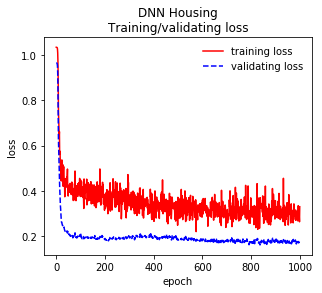

In [17]:
#----------------------------------------
# Summarize history for loss.

plt.figure('DNN Housing loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Housing' + '\n' + 'Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
plt.show()


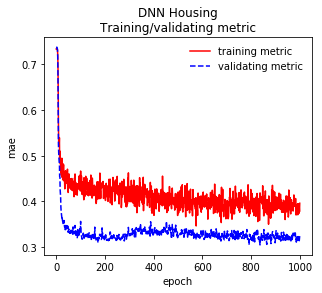

In [18]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Housing metric', figsize = (4.8, 4.0))
plt.plot(history.history['mean_absolute_error'], "r-")
plt.plot(history.history['val_mean_absolute_error'], "b--")
plt.title('DNN Housing' + '\n' + 'Training/validating metric')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
plt.show()


In [19]:
#----------------------------------------
# Make prediction.

fitted = model.predict(X_train)
fitted = fitted[:, 0]

print(fitted.shape)

# Plot

all = np.concatenate((Y_train, fitted))
draw_min = np.floor(np.min(all))
draw_max = np.ceil(np.max(all))


(506,)


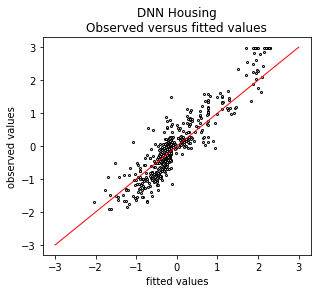

In [21]:
plt.figure('DNN_Housing', figsize = (4.8, 4.0))
plt.plot(fitted, Y_train, 'wo', markersize = 2, markeredgecolor = "black")
plt.plot([draw_min, draw_max], [draw_min, draw_max], '-', linewidth = 1, color = 'red')
plt.title('DNN Housing' + '\n' + 'Observed versus fitted values')
plt.ylabel('observed values')
plt.xlabel('fitted values')
plt.show()
